In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from tqdm import tqdm
import umap
import seaborn as sns
import sklearn
import glob
from typing import List, Dict, Tuple
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import FeatureAgglomeration, KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFwe
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import adjusted_rand_score, silhouette_score, mean_absolute_error, explained_variance_score, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import f1_score

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from yellowbrick.cluster import KElbowVisualizer
from collections import OrderedDict


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path1 = "/Users/SamihaMahin/Desktop/brack_lab/ISR_cellpainting/"
path2 = "/Objects_Population - Nuclei.csv"

cell_painting_data_path_3_22 = path1 + "cell_painting_3_22_24_MuSCs" + path2
cell_painting_data_path_3_24 = path1 + "cell_painting_3_24_24_MuSCs" + path2
cell_painting_data_path_9_11 = path1 + "cell_painting_9_11_24_MuSCs" + path2
cell_painting_data_path_9_12 = path1 + "cell_painting_9_12_24_MuSCs" + path2
cell_painting_data_path_9_18 = path1 + "cell_painting_9_18_24_MuSCs" + path2
cell_painting_data_path_9_19 = path1 + "cell_painting_9_19_24_MuSCs" + path2

# TODO: ADD FILE PATH FOR NEW DATA FILES

data_df_3_22_raw = pd.read_csv(cell_painting_data_path_3_22)
data_df_3_24_raw = pd.read_csv(cell_painting_data_path_3_24)
data_df_9_11_raw = pd.read_csv(cell_painting_data_path_9_11)
data_df_9_12_raw = pd.read_csv(cell_painting_data_path_9_12)
data_df_9_18_raw = pd.read_csv(cell_painting_data_path_9_18)
data_df_9_19_raw = pd.read_csv(cell_painting_data_path_9_19)

# TODO: READ NEW DATA



In [18]:
age_color_map = {
    "Adult": 'maroon',
    "Aged": 'darkgray',
    "Aged Sal": 'skyblue'
}

sample_map = {
    "Adult": 'S1',
    "Aged": 'S2',
    "Aged Sal": 'S3'   
}

batch_norm_map = {
    "S1": 'Adult',
    "S2": 'Aged',
    "S3": 'Aged Sal'
}

age_experiment_map = {
    "All groups": ['Adult', 'Aged', 'Aged Sal']
    #"Adult vs Aged": ['Ad', 'Ag'],
    #"Aged vs Aged+Sal": ['Ag', 'AgS']
}

## Data cleanup and preprocessing

In [4]:
relevant_columns = [
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum',
    'Nuclei - Cell Area [µm²]',
    'Nuclei - Cell Roundness',
    'Nuclei - Cell Width [µm]',
    'Nuclei - Cell Length [µm]',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum',
]
print(len(relevant_columns))

73


In [5]:
#TODO: if we want to add more features, add them/uncomment to the feature_mapping

feature_mapping = {
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean': 'DAPI nucleus intensity mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum': 'DAPI nucleus intensity sum',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean': 'DAPI cyto intensity mean',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum': 'DAPI cyto intensity sum',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean': 'DAPI cell intensity mean',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum': 'DAPI cell intensity sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px': 'Actin texture spot',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px': 'Actin texture hole',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px': 'Actin texture edge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px': 'Actin texture ridge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px': 'Actin texture valley',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px': 'Actin texture saddle',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px': 'Actin texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px': 'Mito texture spot',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px': 'Mito texture hole',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px': 'Mito texture edge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px': 'Mito texture ridge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px': 'Mito texture valley',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px': 'Mito texture saddle',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px': 'Mito texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px': 'Mito texture dark',
    # 'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin nucleus intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cyto intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cyto intensity sum',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cell intensity mean',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cell intensity sum',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean': 'Mito nucleus intensity mean',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum': 'Mito nucleus intensity sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean': 'Mito cyto intensity mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum': 'Mito cyto intensity sum',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean': 'Mito cell intensity mean',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum': 'Mito cell intensity sum',
    'Nuclei - Cell Area [µm²]': 'Cell area',
    'Nuclei - Cell Roundness': 'Cell roundness',
    'Nuclei - Cell Width [µm]': 'Cell width',
    'Nuclei - Cell Length [µm]': 'Cell length',
   
}

relevant_features = [feature_mapping[col] for col in relevant_columns if col in feature_mapping]



In [6]:
def process_data(data_df_raw, well_group, curr_exp, batch_normalize=True):
    data_df_clean = data_df_raw.loc[:, [i for i in relevant_columns if i in feature_mapping]]
    data_df_clean.columns = [feature_mapping[col] for col in data_df_clean.columns]
    data_df_clean.insert(0, 'Exp', [curr_exp]*len(data_df_clean))
    data_df_clean.insert(1, 'Well ID', [i for i in zip(data_df_raw['Row'], data_df_raw['Column'])])
    data_df_clean.insert(2, 'Field', data_df_raw['Field'])
    data_df_clean.insert(3, 'Age', data_df_raw['Group'])

    unique_wells = np.unique(data_df_clean['Well ID'])
    max_cols = {}
    dict_well = {}
    for well in unique_wells:
        group = well_group[well[0]]
        dict_well[well] = group  
        if group in max_cols:
            max_cols[group] = max(max_cols[group], well[1])
        else:
            max_cols[group] = well[1]
    for well in dict_well:
        suffix = 'S1' if well[1] < max_cols[dict_well[well]] else 'S2'
        dict_well[well] = f'{curr_exp} {dict_well[well]} {suffix}'
    print(dict_well)

    data_df_clean.insert(4, 'Sample', data_df_clean['Well ID'].map(dict_well))
    
    data_df_clean.insert(5, 'Type', [curr_exp + " " + sample_map[i] for i in data_df_raw['Group']])
    data_df_clean = data_df_clean.replace([np.inf, -np.inf], np.nan)
    data_df_clean = data_df_clean.dropna(axis=0, how='any', subset=None, inplace=False)
    print(f"Dropped {len(data_df_raw)-len(data_df_clean)} rows")

    if batch_normalize:
        data_df_normalized = pd.DataFrame()
        for sample in np.unique(data_df_clean.Type):
            normalizer = RobustScaler()
            normalized_group = data_df_clean.loc[data_df_clean.Type==sample]
            train_set = normalized_group.loc[normalized_group.Age==batch_norm_map[sample.split()[-1]]]
            normalizer.fit(train_set.loc[:, relevant_features])
            normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
            data_df_normalized = pd.concat([data_df_normalized, normalized_group])
        return data_df_normalized

    return data_df_clean


In [7]:
data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged ISRIB'].index)
data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged ISRIB'].index)

In [9]:
# data_df_3_22_raw = data_df_3_22_raw.drop(data_df_3_22_raw[data_df_3_22_raw['Group'] == 'Aged Sal'].index)
# data_df_3_24_raw = data_df_3_24_raw.drop(data_df_3_24_raw[data_df_3_24_raw['Group'] == 'Aged Sal'].index)
# data_df_9_11_raw = data_df_9_11_raw.drop(data_df_9_11_raw[data_df_9_11_raw['Group'] == 'Aged Sal'].index)
# data_df_9_12_raw = data_df_9_12_raw.drop(data_df_9_12_raw[data_df_9_12_raw['Group'] == 'Aged Sal'].index)
# data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged Sal'].index)
# data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged Sal'].index)

In [8]:
data_df_3_22_f = process_data(data_df_raw=data_df_3_22_raw, well_group = {2:"Adult", 3:"Aged", 4: "Aged Sal"}, curr_exp="3_22", batch_normalize=False)
data_df_3_24_f = process_data(data_df_raw=data_df_3_24_raw, well_group = {2:"Adult", 3:"Aged", 4: "Aged Sal"}, curr_exp="3_24", batch_normalize=False)
data_df_9_11_f = process_data(data_df_raw=data_df_9_11_raw, well_group = {3:"Adult", 4:"Aged", 5: "Aged Sal"}, curr_exp="9_11", batch_normalize=False)
data_df_9_12_f = process_data(data_df_raw=data_df_9_12_raw, well_group = {3:"Adult", 4:"Aged", 5: "Aged Sal"}, curr_exp="9_12", batch_normalize=False)
data_df_9_18_f = process_data(data_df_raw=data_df_9_18_raw, well_group = {3:"Adult", 4:"Aged", 5: "Aged Sal"}, curr_exp="9_18", batch_normalize=False)
data_df_9_19_f = process_data(data_df_raw=data_df_9_19_raw, well_group = {3:"Adult", 4:"Aged", 5: "Aged Sal"}, curr_exp="9_19", batch_normalize=False)

data_df_combined_f = pd.concat([data_df_3_22_f, data_df_3_24_f, data_df_9_11_f, data_df_9_12_f,
                              data_df_9_18_f, data_df_9_19_f], ignore_index=True)

{(2, 2): '3_22 Adult S1', (2, 3): '3_22 Adult S2', (3, 2): '3_22 Aged S1', (3, 3): '3_22 Aged S2', (4, 2): '3_22 Aged Sal S1', (4, 3): '3_22 Aged Sal S2'}
Dropped 13 rows
{(2, 2): '3_24 Adult S1', (2, 3): '3_24 Adult S2', (3, 2): '3_24 Aged S1', (3, 3): '3_24 Aged S2', (4, 2): '3_24 Aged Sal S1', (4, 3): '3_24 Aged Sal S2'}
Dropped 24 rows
{(3, 3): '9_11 Adult S1', (3, 4): '9_11 Adult S2', (4, 3): '9_11 Aged S1', (4, 4): '9_11 Aged S2', (5, 3): '9_11 Aged Sal S1', (5, 4): '9_11 Aged Sal S2'}
Dropped 250 rows
{(3, 3): '9_12 Adult S1', (3, 4): '9_12 Adult S2', (4, 3): '9_12 Aged S1', (4, 4): '9_12 Aged S2', (5, 3): '9_12 Aged Sal S1', (5, 4): '9_12 Aged Sal S2'}
Dropped 1068 rows
{(3, 3): '9_18 Adult S1', (3, 4): '9_18 Adult S2', (4, 3): '9_18 Aged S1', (4, 4): '9_18 Aged S2', (5, 3): '9_18 Aged Sal S1', (5, 4): '9_18 Aged Sal S2'}
Dropped 292 rows
{(3, 3): '9_19 Adult S1', (3, 4): '9_19 Adult S2', (4, 3): '9_19 Aged S1', (4, 4): '9_19 Aged S2', (5, 3): '9_19 Aged Sal S1', (5, 4): '9_19 

## Similarity Matrix

In [9]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

def sim_matrix(data_df, exclude):
    if len(exclude) != 0:
        data_df = data_df[~data_df['Exp'].isin(exclude)]
    
    grouped_df = data_df.groupby(['Exp', 'Well ID', 'Age', 'Sample', 'Type']).mean().reset_index()
    
    relevant_df = grouped_df.drop(['Field', 'Exp', 'Well ID', 'Type', 'Age'], axis=1)
    relevant_df.set_index('Sample', inplace=True)
    
    distance_matrix = squareform(pdist(relevant_df, metric='euclidean'))
    distance_df = pd.DataFrame(distance_matrix, index=relevant_df.index, columns=relevant_df.index)
    
    plt.figure(figsize=(8, 5)) 
    ax = sns.heatmap(distance_df)
    plt.xticks(rotation=90)  
    plt.yticks(rotation=0)  

    plt.show()

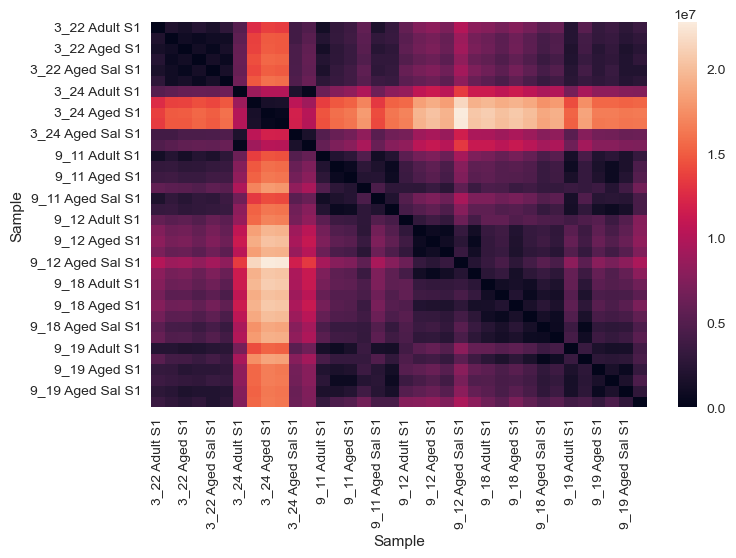

In [10]:
sim_matrix(data_df_combined_f, exclude=[])

In [13]:
from pycytominer import normalize, feature_select, consensus

data_df = data_df_combined_f
_df = data_df[data_df['Exp'] == '3_22']
_df_norm = normalize(_df, features = relevant_features, 
                         meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
                         method='standardize')

_df_feature_select = feature_select(_df_norm, features= relevant_features,
                                    samples="all",
                                    operation=["variance_threshold","correlation_threshold", "drop_outliers"],
                                    freq_cut=0.05,
                                    outlier_cutoff=500)

_df_feature_select = _df_feature_select.drop(['Well ID', 'Field', 'Sample', 'Type'], axis=1)

features_select_features = list(_df_feature_select.columns[2:])

_df_consensus = consensus(_df_feature_select, replicate_columns=["Exp", "Age"], features=features_select_features)
_df_consensus

Exp    Age  DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0  3_22  Adult                    -0.097177                   -0.098421   
1  3_22   Aged                    -0.244352                    0.001677   

   Actin texture spot  Actin texture hole  Actin texture edge  \
0           -0.117733           -0.082065           -0.086252   
1            0.010840           -0.025434           -0.327099   

   Actin texture ridge  Actin texture saddle  Mito texture spot  \
0            -0.224135             -0.198723          -0.079561   
1            -0.299262             -0.294170          -0.119697   

   Mito texture hole  Mito texture edge  Actin cyto intensity mean  \
0          -0.102448           0.054532                  -0.143830   
1          -0.088290          -0.052591                  -0.200486   

   Actin cyto intensity sum  Mito cyto intensity mean  \
0                 -0.220122                 -0.191351   
1                 -0.255402                 -0.238746   

   Mito cyto intensity sum  Cell area  Cell roundness  Cell width  Cell length  
0                -0.285104  -0.286090       -0.079947   -0.270799    -0.220052  
1                -0.299840  -0.269561       -0.063794   -0.087115    -0.237371

## Normalize using pycytominer

In [11]:
from pycytominer import normalize


def pycyto_norm(data_df, list_exp):
  all_normalized_data = pd.DataFrame()
  for exp in list_exp:
    _df = data_df[data_df['Exp'] == exp]
    _df_norm = normalize(_df, features = relevant_features, 
                         meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
                         method='standardize',spherize_center=True)
    
    all_normalized_data = pd.concat([all_normalized_data, _df_norm], ignore_index=True)

  return all_normalized_data

In [12]:
data_combined_norm = pycyto_norm(data_df_combined_f, ['3_22', '9_11','9_18', '9_19'])
data_combined_norm

Exp Well ID  Field       Age            Sample     Type  \
0      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
...     ...     ...    ...       ...               ...      ...   
30397  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30398  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30399  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30400  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30401  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.752735                    2.499605   
1                        -0.882185                   -0.530725   
2                        -1.068765                   -0.094207   
3                        -0.134694                    0.051729   
4                         0.474889                    0.032507   
...                            ...                         ...   
30397                    -1.454963                   -0.152479   
30398                     0.055890                   -0.027493   
30399                    -1.456213                   -0.147333   
30400                    -1.452086                   -0.153116   
30401                    -1.455903                   -0.143728   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.858850           -0.591850  ...            -0.362513   
1                1.812221            1.121009  ...             1.471722   
2                0.598405            0.580899  ...             0.187152   
3               -0.215467           -0.048021  ...             1.630623   
4               -0.874665           -0.806601  ...             0.093929   
...                   ...                 ...  ...                  ...   
30397            2.509389            1.234180  ...             2.096203   
30398           -0.161613            0.388430  ...            -1.385292   
30399            1.640905            2.334048  ...            -1.318944   
30400            1.635371            2.030255  ...            -1.005980   
30401            1.355606            2.001324  ...            -0.805438   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.332713                   0.779970                  1.355900   
1               1.382034                  -0.380731                 -0.442269   
2               0.193575                   0.462667                  0.200734   
3               0.789627                   0.078896                 -0.356392   
4               0.216487                   0.396752                 -0.219858   
...                  ...                        ...                       ...   
30397           2.030321                  -0.972936                 -0.409021   
30398          -1.263342                  -1.041107                 -0.371924   
30399          -1.164616                  -1.236785                 -0.304733   
30400          -0.770692                  -1.228088                 -0.417291   
30401          -0.551450                  -1.196449                 -0.392077   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.635001                 2.321151   1.113629   
1                     -0.973069                -0.720079  -0.487470   
2                      0.452950                 0.157485  -0.032480   
3                      0.086194                -0.500335  -0.585705   
4                     -0.097788                -0.498561  -0.599703   
...                         ...                      ...        ...   
30397                 -0.613087        

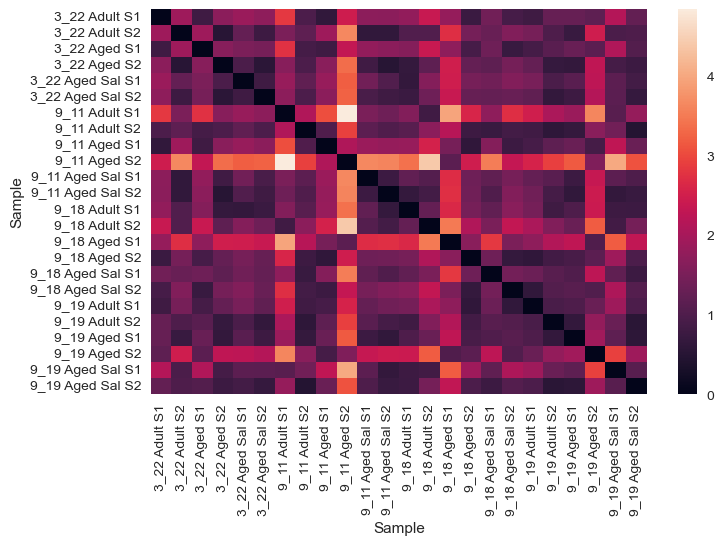

In [13]:
sim_matrix(data_combined_norm, [])

## Feature Analysis 

### Pie plot age count distribution

Text(0.5, 1.0, 'cell_painting_combined cell distribution pie plot')

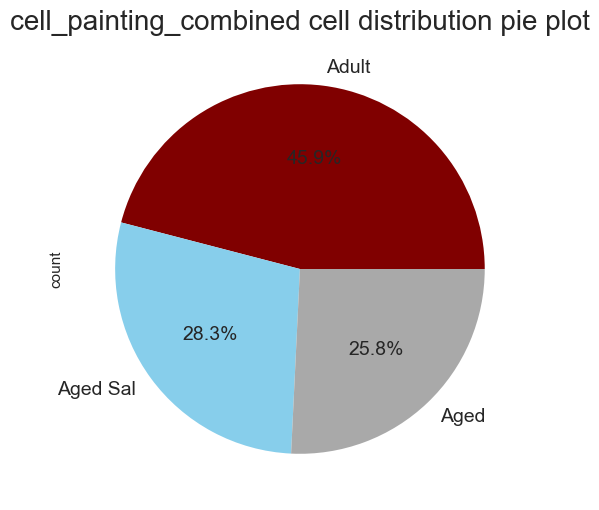

In [17]:
"""
Plots the fraction of number of cells for each Age group
"""
#TODO: change the pie into a histogram, make for loop for each experiment or add dictionary color mapping

# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_22 cell distribution pie plot"
# data_df_3_22.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','lightskyblue','darkgray'])
# plt.title(plot_title, fontsize=20)


# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_24 cell distribution pie plot"
# data_df_3_24.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['lightskyblue', 'maroon', 'darkgray'])
# plt.title(plot_title, fontsize=20)

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_combined cell distribution pie plot"
data_combined_norm.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','skyblue', 'darkgrey'])
plt.title(plot_title, fontsize=20)

### PCA visualization

In [134]:
def PCA_calc(data_df):
    
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop('Field', axis=1)
    # if curr_exp == "cell painting combination":
    #     style_type = 'Exp'
    # else:
    # # relevant_data_df = data_df.groupby(['Well ID','Age']).mean().reset_index()
    #     style_type = None
    age_label = relevant_data_df['Age']

    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])

    pca = PCA(n_components=2)
    pca_np = pca.fit_transform(relevant_np)

    relevant_data_df["pca_dim1"] = pca_np[:, 0]
    relevant_data_df["pca_dim2"] = pca_np[:, 1]
    relevant_data_df["Age"] = age_label

    return relevant_data_df

def PCA_viz(relevant_data_df, plot_title):

    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="pca_dim1", y ="pca_dim2", 
        hue="Age",
        style='Exp',
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,

        s = 75)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    plt.legend(fontsize=15)
    plt.xlabel("PC1", weight='bold', fontsize=20)
    plt.ylabel("PC2", weight='bold', fontsize=20)
    plt.xticks(fontsize=15, rotation=360)
    plt.yticks(fontsize=15)
    plt.title("")
    plt.grid(False)
    plt.tick_params(direction='out',length=3, width=1, colors='black')
    legend = ax.legend(fontsize=20, bbox_to_anchor=(1.3, 0.6))
    legend.set_title(None)
    plt.show()


def TSNE_calc(data_df):
    #NO AGE EXP MAP

    #relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index()
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type', 'Field']).mean().reset_index()
    age_label = relevant_data_df['Age']
    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])
    tsne = TSNE(n_components=2)
    tsne_np = tsne.fit_transform(relevant_np)
    relevant_data_df["tsne_dim1"] = tsne_np[:, 0]
    relevant_data_df["tsne_dim2"] = tsne_np[:, 1]
    relevant_data_df["Age"] = age_label
    return relevant_data_df

def TSNE_viz(relevant_data_df, plot_title):
    style_type = "Exp"
    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="tsne_dim1", y="tsne_dim2",
        hue="Age",
        style=style_type,
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,
        s = 50,
        marker='o')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.tick_params(direction='out',length=3, width=1, colors='black')
    legend = ax.legend(fontsize=15, bbox_to_anchor=(1, 0.6))
    legend.set_title(None)
    plt.show()
        

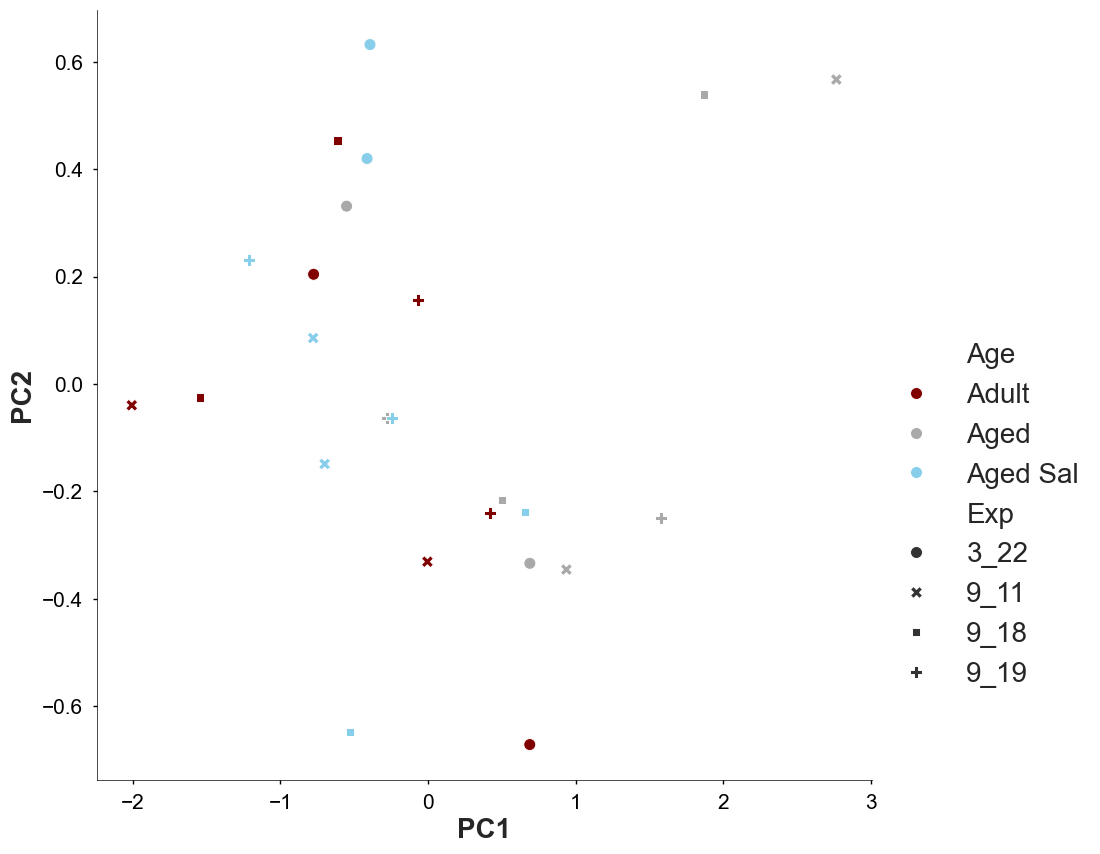

In [135]:
pca_df = PCA_calc(data_combined_norm)
PCA_viz(pca_df, "PCA of Samples")

In [21]:
tsne_df = TSNE_calc(data_combined_norm)

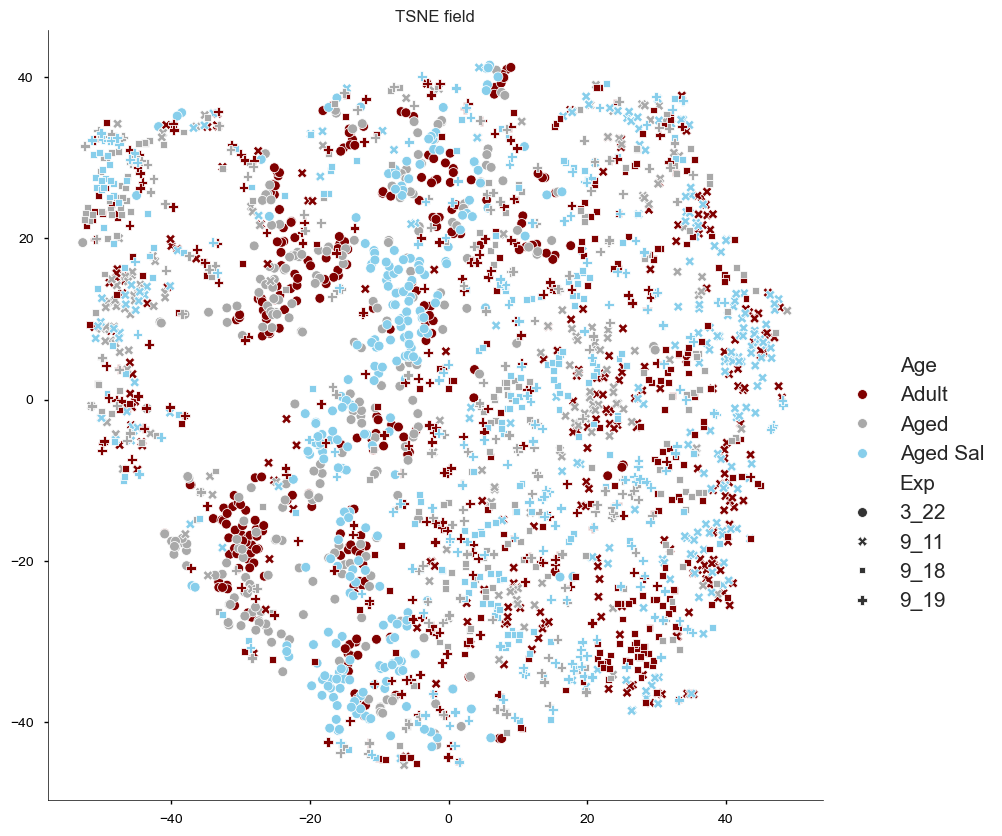

In [22]:
TSNE_viz(tsne_df, "TSNE field")

In [22]:
# age_experiment_map = {
    
#     "Adult vs Aged": ['Ad', 'Ag']
    
# }

### Anova feature importance

In [167]:
def ANOVA_feat_ranking(data_df, num_features=5):
    relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
    age_label = list(data_df['Age'])
    y = age_label
    X = deepcopy(relevant_data_df)
    X = RobustScaler().fit_transform(X)
    univariate_selector = SelectKBest().fit(X,y)
    idx = univariate_selector.get_support(True)
    selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                     index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
    selected_features = selected_features[: num_features]
    print(f"Number of features selected: {len(selected_features)}")
    # Modify relevant_columbus_visualization
    relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
    # scaled_features = StandardScaler().fit_transform(relevant_data_df)
    vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
    vis_df['Age'] = y
    return vis_df, selected_features 

def viz_ANOVA_feat_ranking_group(vis_df, selected_features, plot_title):
    selected_features = selected_features
    
    plt.rcParams["figure.figsize"] = (30,10)
    plt.figure()
    # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
    
    # Move the legend outside the plot
    plt.legend(fontsize=30, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_ylabel('Feature Value Means', fontsize=35, fontweight="bold")
    plt.xticks(fontsize=30, rotation=75)
    plt.yticks(fontsize=30)
    
    plot_title = "Cell Painting Feature Ranking and F-Values"
    plt.title(plot_title, fontsize=50, fontweight="bold")
    
    ax = ax.twinx()
    selected_features.plot(ax=ax, style='k*', markersize=30, alpha=1, c='red')
    ax.set_ylabel('Scores', fontsize=35, fontweight="bold")
    
    plt.yticks(fontsize=30)
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.grid(False)
    plt.show()

    
    
def viz_ANOVA_feat_ranking_exp(data_df, vis_df, selected_features, plot_title):
    
    vis_df['Exp'] = list(data_df['Exp'])
    plt.rcParams["figure.figsize"] = (50,20)
    plt.figure()
    # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
    plt.legend(fontsize=30)
    ax.set_ylabel('Feature Value Means')
    plt.xticks(fontsize=30, rotation=90)
    plt.title(plot_title, fontsize=50)
    ax = ax.twinx()
    selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
    ax.set_ylabel('Scores')
    plt.legend(fontsize=10,loc=(1,.99))
    plt.show()


F_values
Cell roundness                    513
Actin texture hole                459
Actin texture spot                316
Actin cyto intensity mean         298
DAPI nucleus intensity mean       282

Number of features selected: 5


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Figure size 3000x1000 with 0 Axes>

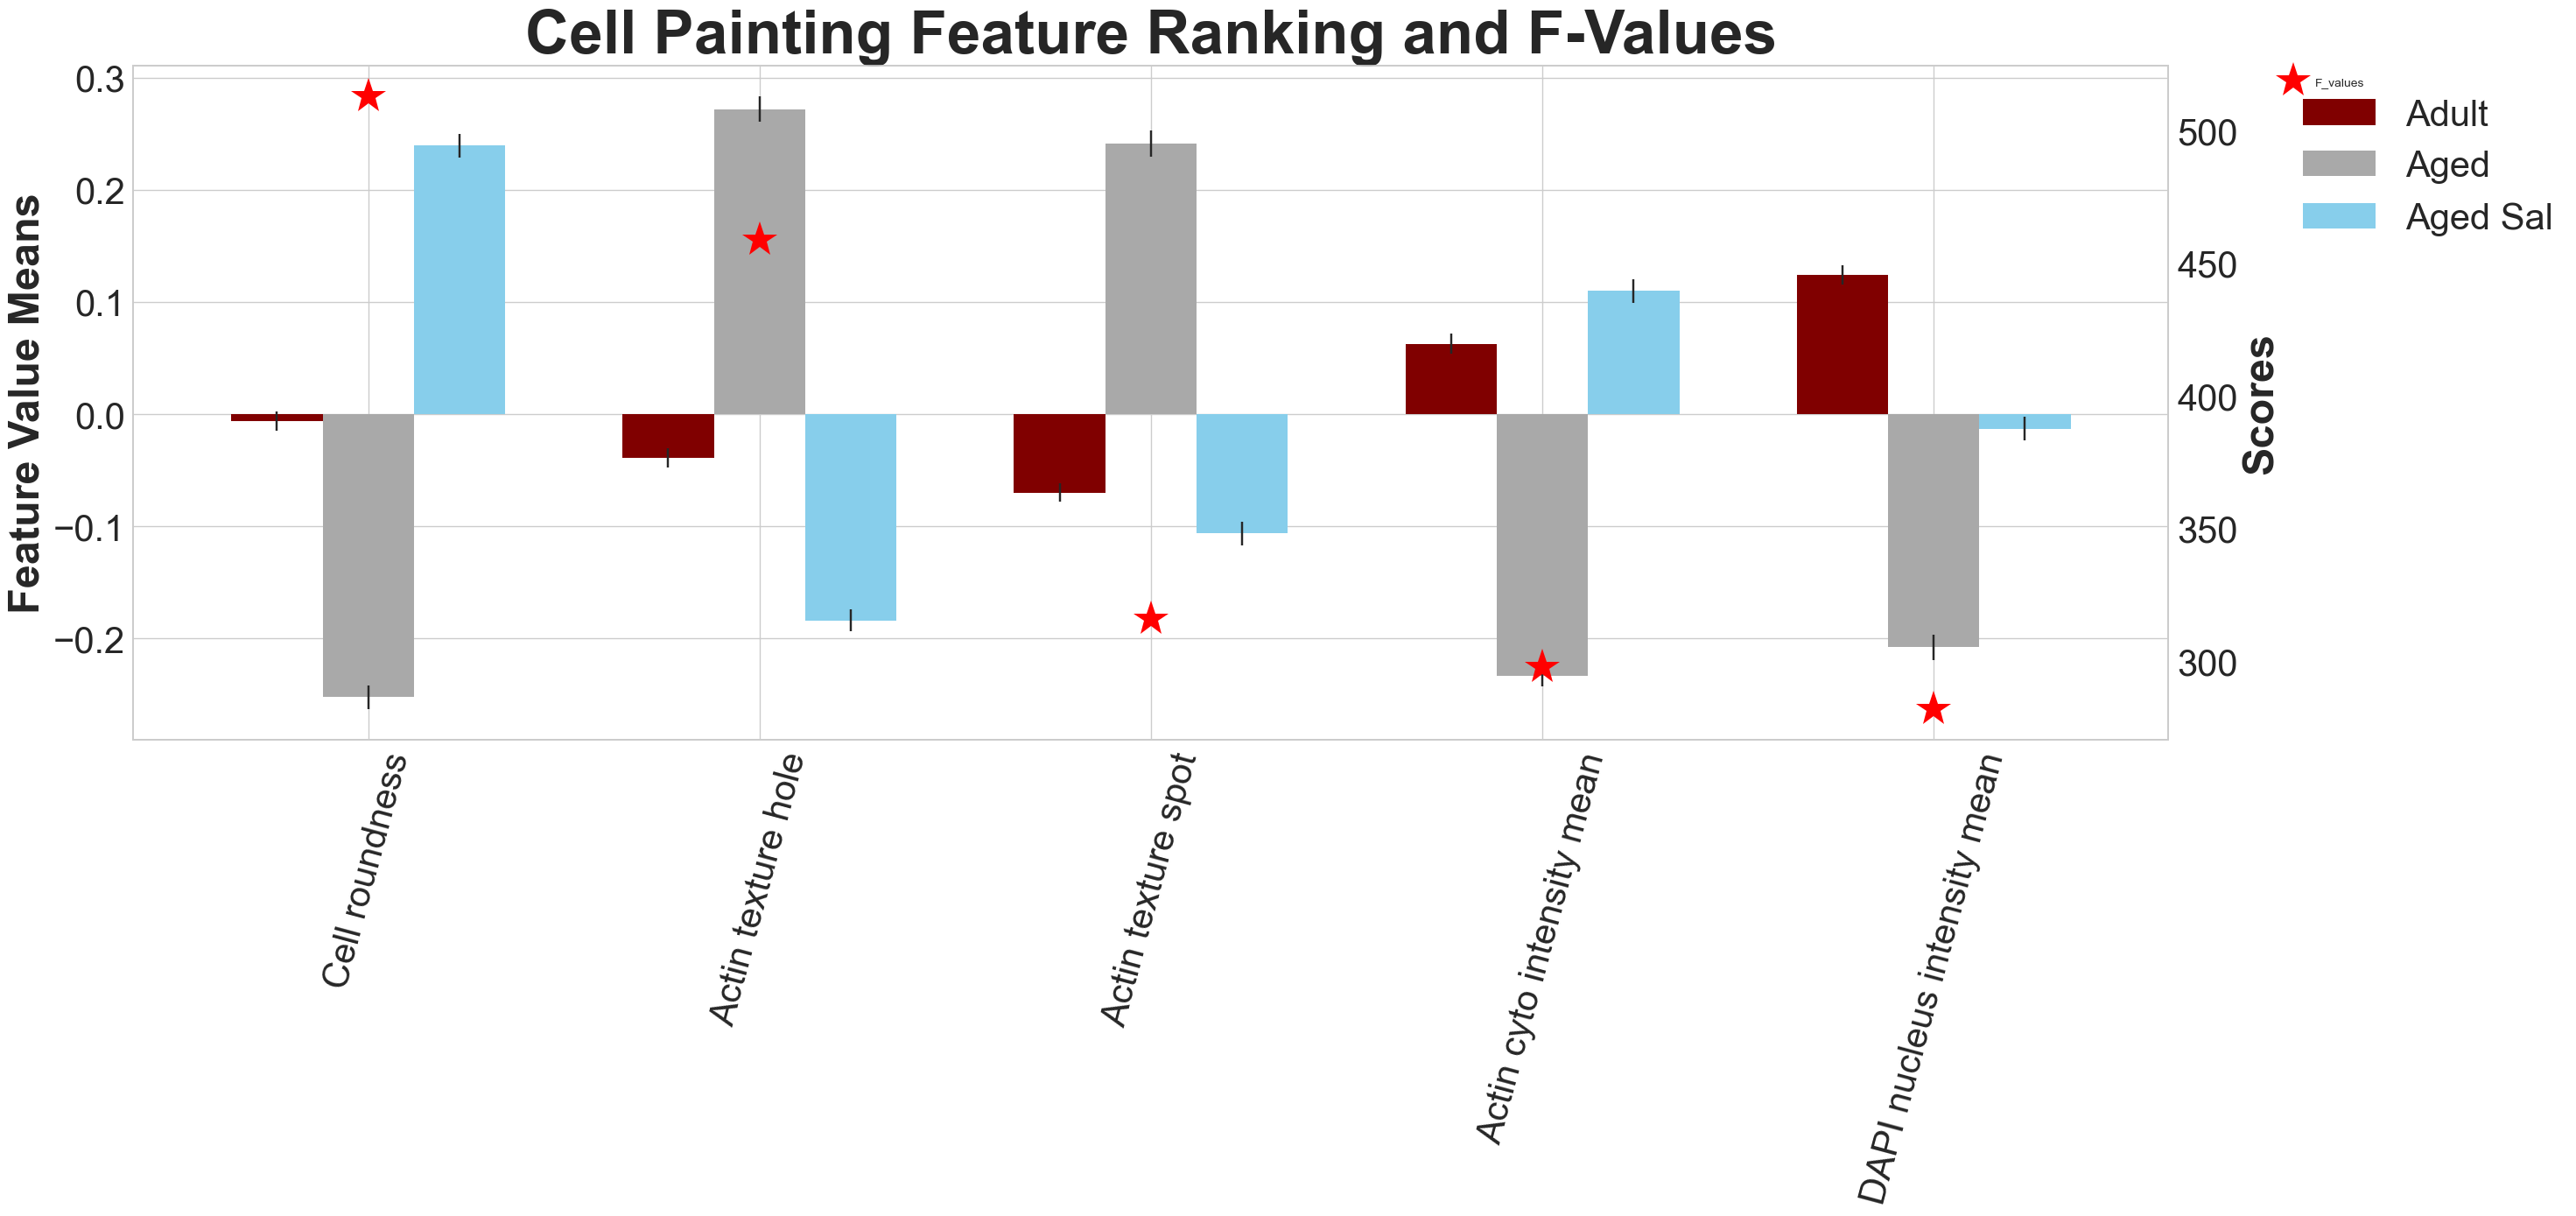

<Figure size 5000x2000 with 0 Axes>

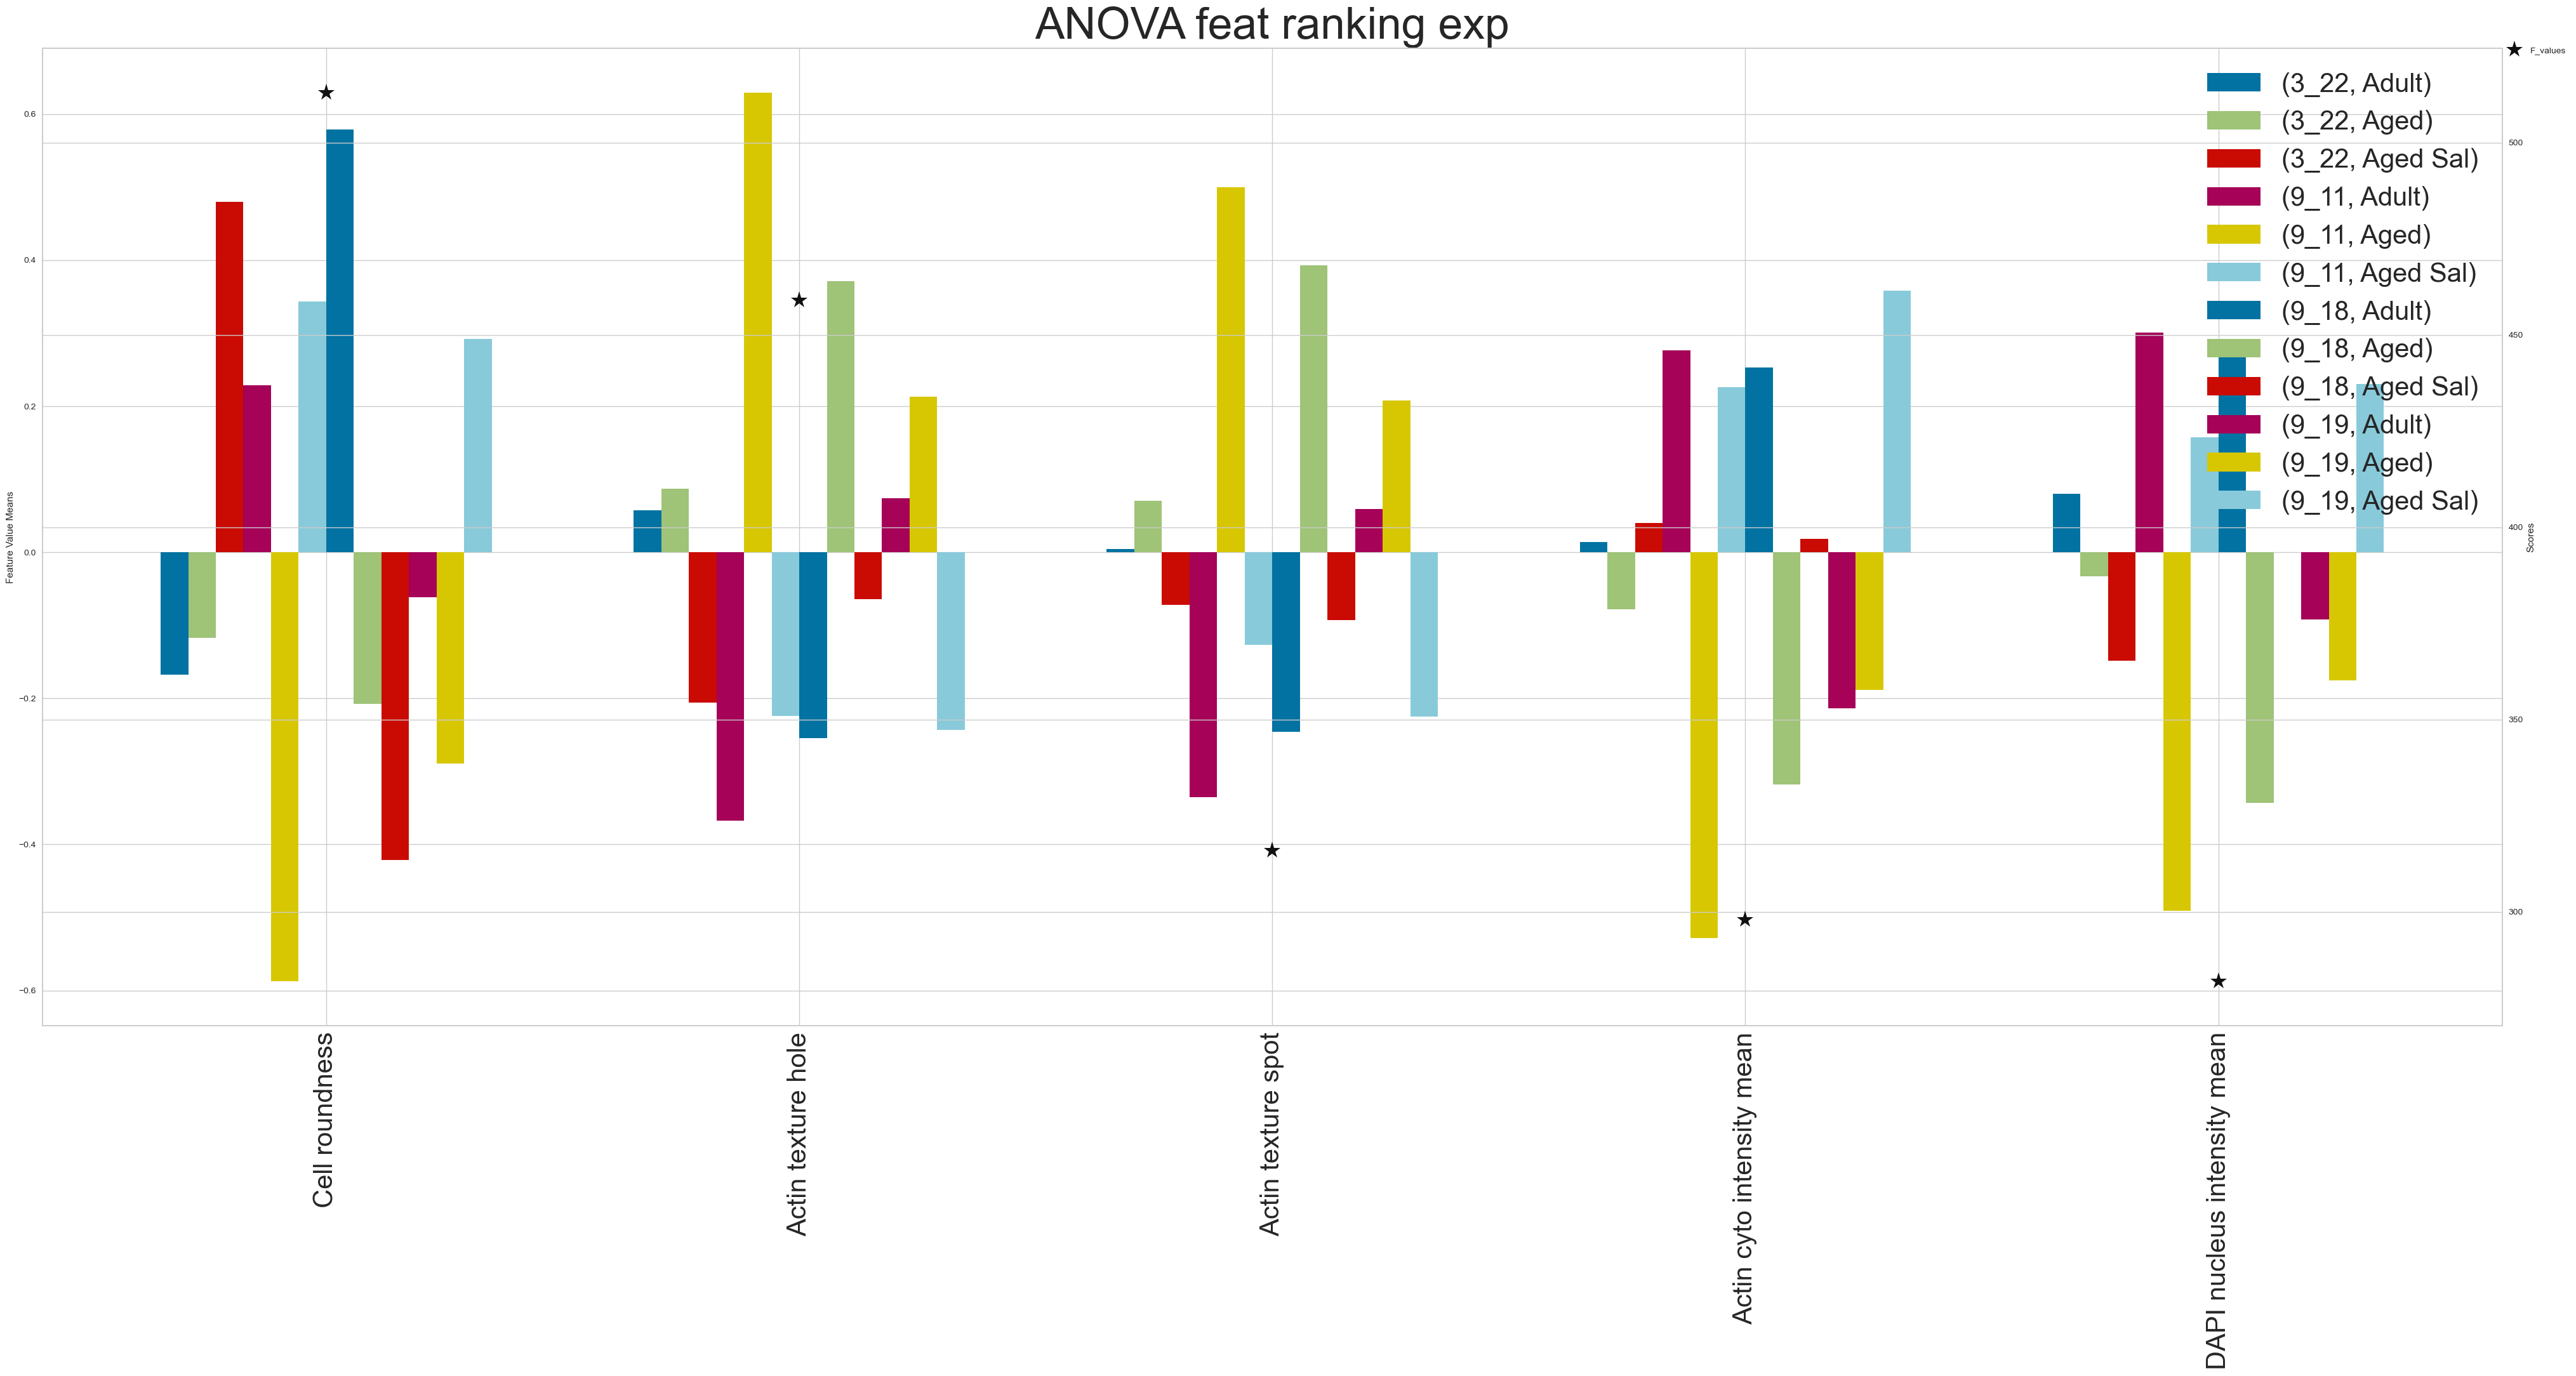

In [168]:
viz_df, selected_features = ANOVA_feat_ranking(data_combined_norm)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "ANOVA feat ranking group")
viz_ANOVA_feat_ranking_exp(data_combined_norm, viz_df, selected_features, "ANOVA feat ranking exp")

In [25]:
data_combined_norm

Exp Well ID  Field       Age            Sample     Type  \
0      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1     Adult     3_22 Adult S1  3_22 S1   
...     ...     ...    ...       ...               ...      ...   
30397  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30398  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30399  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30400  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   
30401  9_19  (5, 4)    132  Aged Sal  9_19 Aged Sal S2  9_19 S3   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.752735                    2.499605   
1                        -0.882185                   -0.530725   
2                        -1.068765                   -0.094207   
3                        -0.134694                    0.051729   
4                         0.474889                    0.032507   
...                            ...                         ...   
30397                    -1.454963                   -0.152479   
30398                     0.055890                   -0.027493   
30399                    -1.456213                   -0.147333   
30400                    -1.452086                   -0.153116   
30401                    -1.455903                   -0.143728   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.858850           -0.591850  ...            -0.362513   
1                1.812221            1.121009  ...             1.471722   
2                0.598405            0.580899  ...             0.187152   
3               -0.215467           -0.048021  ...             1.630623   
4               -0.874665           -0.806601  ...             0.093929   
...                   ...                 ...  ...                  ...   
30397            2.509389            1.234180  ...             2.096203   
30398           -0.161613            0.388430  ...            -1.385292   
30399            1.640905            2.334048  ...            -1.318944   
30400            1.635371            2.030255  ...            -1.005980   
30401            1.355606            2.001324  ...            -0.805438   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.332713                   0.779970                  1.355900   
1               1.382034                  -0.380731                 -0.442269   
2               0.193575                   0.462667                  0.200734   
3               0.789627                   0.078896                 -0.356392   
4               0.216487                   0.396752                 -0.219858   
...                  ...                        ...                       ...   
30397           2.030321                  -0.972936                 -0.409021   
30398          -1.263342                  -1.041107                 -0.371924   
30399          -1.164616                  -1.236785                 -0.304733   
30400          -0.770692                  -1.228088                 -0.417291   
30401          -0.551450                  -1.196449                 -0.392077   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.635001                 2.321151   1.113629   
1                     -0.973069                -0.720079  -0.487470   
2                      0.452950                 0.157485  -0.032480   
3                      0.086194                -0.500335  -0.585705   
4                     -0.097788                -0.498561  -0.599703   
...                         ...                      ...        ...   
30397                 -0.613087        

## Clustering Analysis

### GMM (Gaussian Mixture Modeling)

### Hiearchical clustering

In [71]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hc = AgglomerativeClustering(metric="euclidean" , n_clusters=None, distance_threshold=0, linkage='ward')

In [75]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, figsize=(15, 10), **kwargs):
    """
    Plots a dendrogram for a given clustering model.

    Parameters:
    - model: The clustering model with hierarchical information.
    - figsize: Tuple specifying the figure size (width, height).
    - kwargs: Additional keyword arguments for dendrogram.
    """

    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Set the figure size
    plt.figure(figsize=figsize)
    
    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

# Example usage:
# plot_dendrogram(clustering_model, figsize=(20, 10), leaf_rotation=90)


In [57]:
UL_data_norm = data_combined_norm.drop(columns=['Exp', 'Well ID', 'Field', 'Age', 'Sample', 'Type'])
UL_data_norm

DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.752735                    2.499605   
1                        -0.882185                   -0.530725   
2                        -1.068765                   -0.094207   
3                        -0.134694                    0.051729   
4                         0.474889                    0.032507   
...                            ...                         ...   
30397                    -1.454963                   -0.152479   
30398                     0.055890                   -0.027493   
30399                    -1.456213                   -0.147333   
30400                    -1.452086                   -0.153116   
30401                    -1.455903                   -0.143728   

       Actin texture spot  Actin texture hole  Actin texture edge  \
0               -0.858850           -0.591850           -0.139382   
1                1.812221            1.121009           -0.313890   
2                0.598405            0.580899            1.207204   
3               -0.215467           -0.048021           -0.317018   
4               -0.874665           -0.806601            0.342798   
...                   ...                 ...                 ...   
30397            2.509389            1.234180            1.704360   
30398           -0.161613            0.388430            0.225662   
30399            1.640905            2.334048           -1.363097   
30400            1.635371            2.030255           -1.479854   
30401            1.355606            2.001324           -1.428608   

       Actin texture ridge  Actin texture valley  Actin texture saddle  \
0                -0.298921             -0.457690             -0.246375   
1                 1.039709              0.894286              1.128992   
2                 1.375337              1.239834              1.419850   
3                 0.068750             -0.037129             -0.064115   
4                 0.255554             -0.282433             -0.140944   
...                    ...                   ...                   ...   
30397             2.370212              2.495113              2.888641   
30398            -0.410284             -0.366530             -0.443340   
30399             1.333455              1.072245              0.710847   
30400             1.217798              0.979699              0.584324   
30401             1.139988              0.940610              0.570185   

       Actin texture bright  Mito texture spot  ...  Mito texture bright  \
0                 -0.490903          -0.298845  ...            -0.362513   
1                  1.322533           1.413497  ...             1.471722   
2                  1.205504           0.653956  ...             0.187152   
3                 -0.016473           1.769627  ...             1.630623   
4                 -0.074888          -0.335096  ...             0.093929   
...                     ...                ...  ...                  ...   
30397              2.453413           2.023744  ...             2.096203   
30398             -0.311530          -1.089467  ...            -1.385292   
30399              1.535015          -0.818376  ...            -1.318944   
30400              1.446569          -0.548485  ...            -1.005980   
30401              1.270531          -0.304767  ...            -0.805438   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.332713                   0.779970                  1.355900   
1               1.382034                  -0.380731                 -0.442269   
2               0.193575                   0.462667                  0.200734   
3               0.789627                   0.078896                 -0.356392   
4               0.216487                   0.396752                 -0.219858   
...                  ...                        ...                       ...   
30397           

In [73]:
hc = hc.fit(UL_data_norm)
#UL_data_norm['Cluster'] = hc

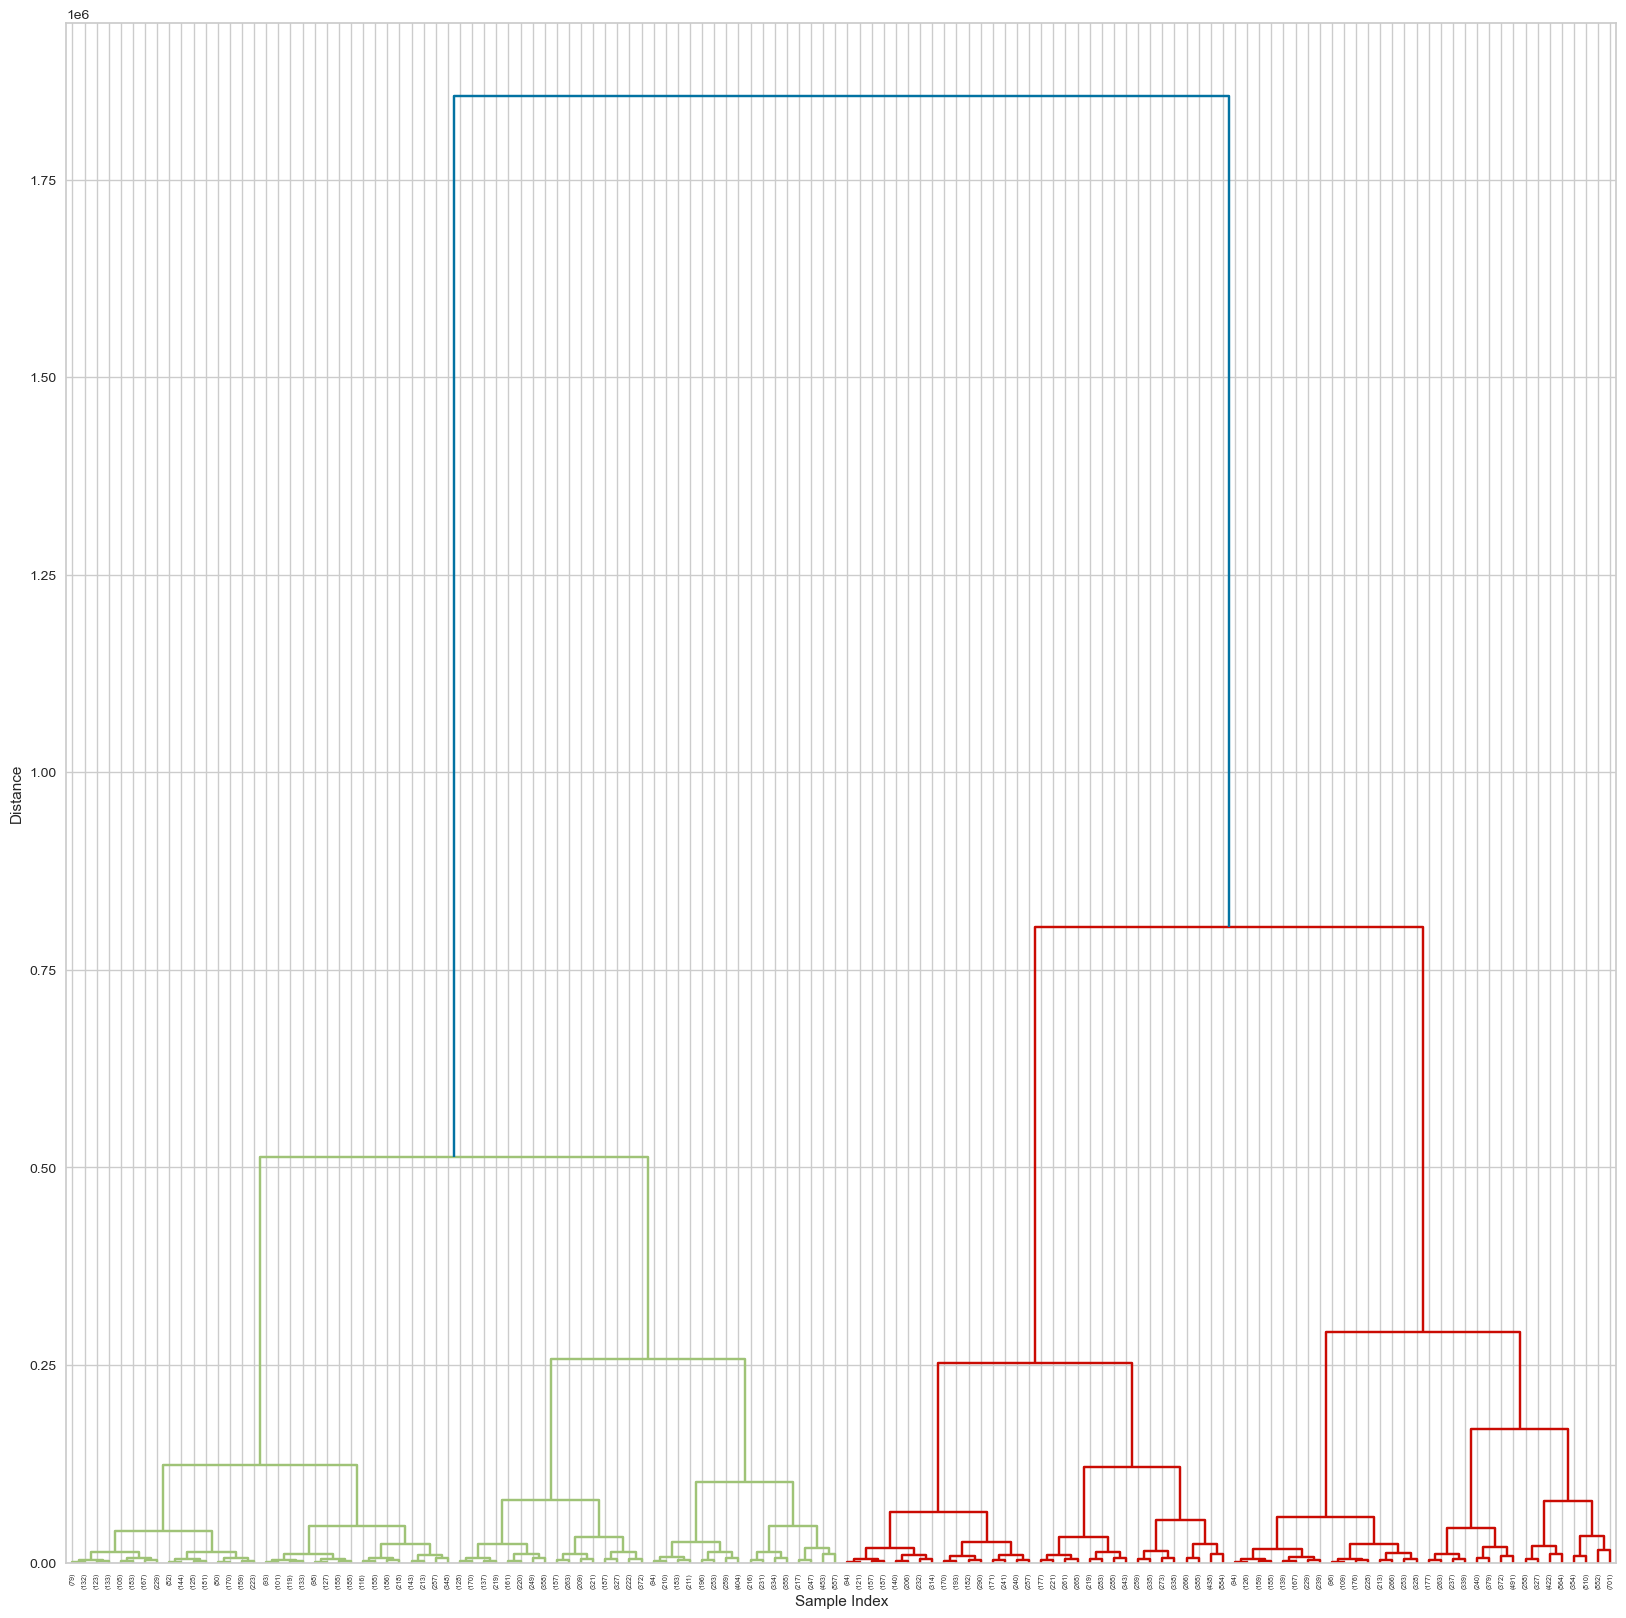

In [77]:
plot_dendrogram(hc, truncate_mode="level", figsize=(20,20), p=6)

In [87]:
hc_clust = AgglomerativeClustering(metric="euclidean" ,n_clusters=None, distance_threshold=0.5, linkage='ward')

In [88]:
clust = hc_clust.fit_predict(UL_data_norm)
UL_data_norm['cluster'] = clust

In [89]:
UL_data_norm['cluster'] = clust

In [90]:
UL_data_norm

DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.752735                    2.499605   
1                        -0.882185                   -0.530725   
2                        -1.068765                   -0.094207   
3                        -0.134694                    0.051729   
4                         0.474889                    0.032507   
...                            ...                         ...   
30397                    -1.454963                   -0.152479   
30398                     0.055890                   -0.027493   
30399                    -1.456213                   -0.147333   
30400                    -1.452086                   -0.153116   
30401                    -1.455903                   -0.143728   

       Actin texture spot  Actin texture hole  Actin texture edge  \
0               -0.858850           -0.591850           -0.139382   
1                1.812221            1.121009           -0.313890   
2                0.598405            0.580899            1.207204   
3               -0.215467           -0.048021           -0.317018   
4               -0.874665           -0.806601            0.342798   
...                   ...                 ...                 ...   
30397            2.509389            1.234180            1.704360   
30398           -0.161613            0.388430            0.225662   
30399            1.640905            2.334048           -1.363097   
30400            1.635371            2.030255           -1.479854   
30401            1.355606            2.001324           -1.428608   

       Actin texture ridge  Actin texture valley  Actin texture saddle  \
0                -0.298921             -0.457690             -0.246375   
1                 1.039709              0.894286              1.128992   
2                 1.375337              1.239834              1.419850   
3                 0.068750             -0.037129             -0.064115   
4                 0.255554             -0.282433             -0.140944   
...                    ...                   ...                   ...   
30397             2.370212              2.495113              2.888641   
30398            -0.410284             -0.366530             -0.443340   
30399             1.333455              1.072245              0.710847   
30400             1.217798              0.979699              0.584324   
30401             1.139988              0.940610              0.570185   

       Actin texture bright  Mito texture spot  ...  \
0                 -0.490903          -0.298845  ...   
1                  1.322533           1.413497  ...   
2                  1.205504           0.653956  ...   
3                 -0.016473           1.769627  ...   
4                 -0.074888          -0.335096  ...   
...                     ...                ...  ...   
30397              2.453413           2.023744  ...   
30398             -0.311530          -1.089467  ...   
30399              1.535015          -0.818376  ...   
30400              1.446569          -0.548485  ...   
30401              1.270531          -0.304767  ...   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       0.779970                  1.355900   
1                      -0.380731                 -0.442269   
2                       0.462667                  0.200734   
3                       0.078896                 -0.356392   
4                       0.396752                 -0.219858   
...                          ...                       ...   
30397                  -0.972936                 -0.409021   
30398                  -1.041107                 -0.371924   
30399                  -1.236785                 -0.304733   
30400                  -1.228088                 -0.417291   
30401                  -1.196449                 -0.392077   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                  

### Kmeans clustering and percentage

In [169]:
def viz_clustering_analysis(data_df_all, curr_exp):

    ## NO AGE EXP MAP
    for age_exp in age_experiment_map:
        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        clustering_data_df = deepcopy(data_df_all)
        relevant_data_df = deepcopy(data_df_all.loc[:, relevant_features])

        plot_title = f"{age_exp} KMeans clustering elbow for {curr_exp}"
        plt.rcParams["figure.figsize"] = (6,4)
        plt.figure()
        X = deepcopy(relevant_data_df)
        X = StandardScaler().fit_transform(X)

        """
        Viz 1: Elbow plot
        """
        elbow_vis = KElbowVisualizer(KMeans(), title=plot_title).fit(X)
        plt.title(plot_title)
        elbow_vis.show()

        
        """
        Viz 2: KMeans count pie plot
        """
        num_clusters = elbow_vis.elbow_value_  #min(elbow_vis.elbow_value_, 3)
        kmeans = KMeans(num_clusters, random_state=23).fit(X)
            
        plt.rcParams["figure.figsize"] = (5,5)
        plot_title = f'{age_exp} Distribution of Cluster categories for {curr_exp}'
        clustering_data_df['kmeans_clustering'] = kmeans.labels_
        clustering_data_df['kmeans_clustering'] = ["Cluster "+str(int(item)+1) for item in clustering_data_df['kmeans_clustering']]
        clustering_data_df.kmeans_clustering.value_counts().plot.pie(fontsize=14, autopct='%.1f%%')
        plt.title(plot_title, fontsize=20)


        """
        Viz 3: Cluster distribution plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by age per cluster'
        ax = clustering_data_df.groupby('Age').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50, color=age_color_map)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))



        """
        Viz 4: Cluster distribution per Well ID plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by Well per cluster'
        if curr_exp == 'cell painting combination':
            ax = clustering_data_df.groupby(['Exp', 'Age']).kmeans_clustering.value_counts().unstack(2).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        else:
            ax = clustering_data_df.groupby('Well ID').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))


    return clustering_data_df 

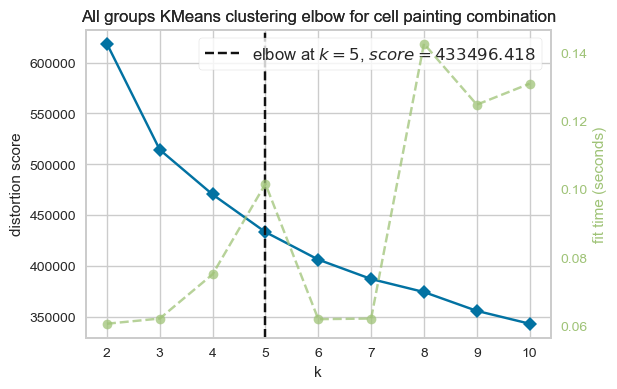

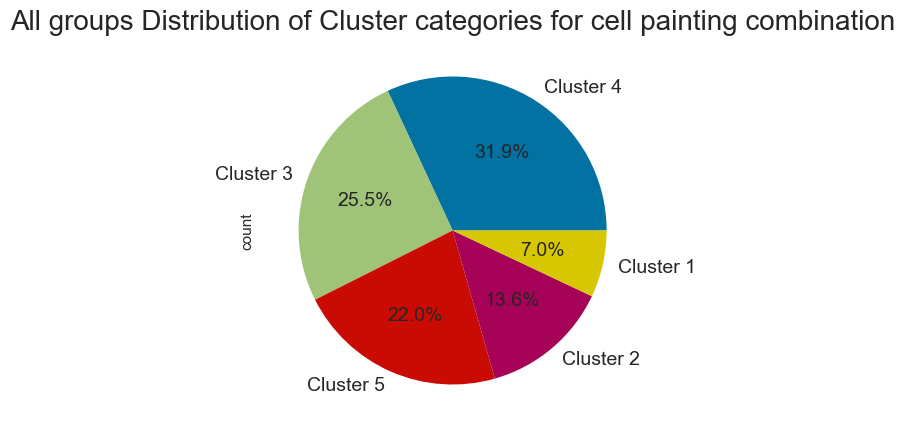

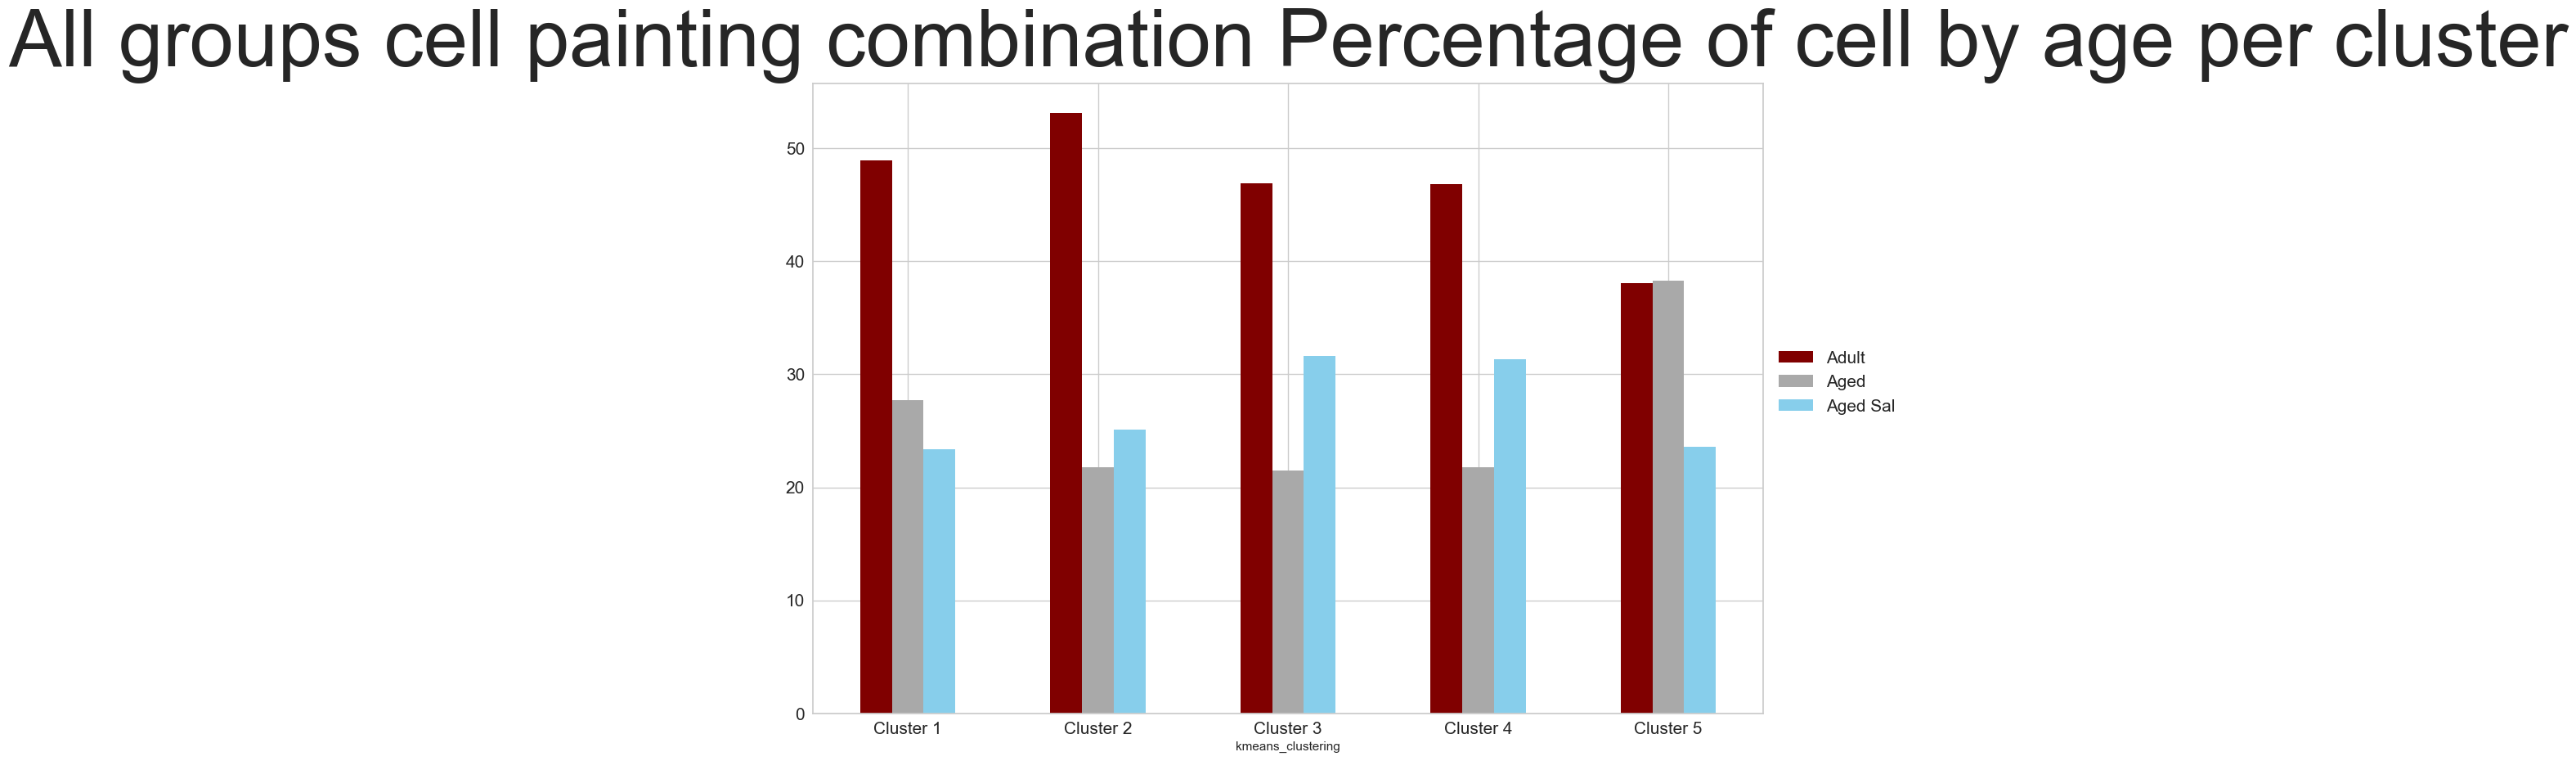

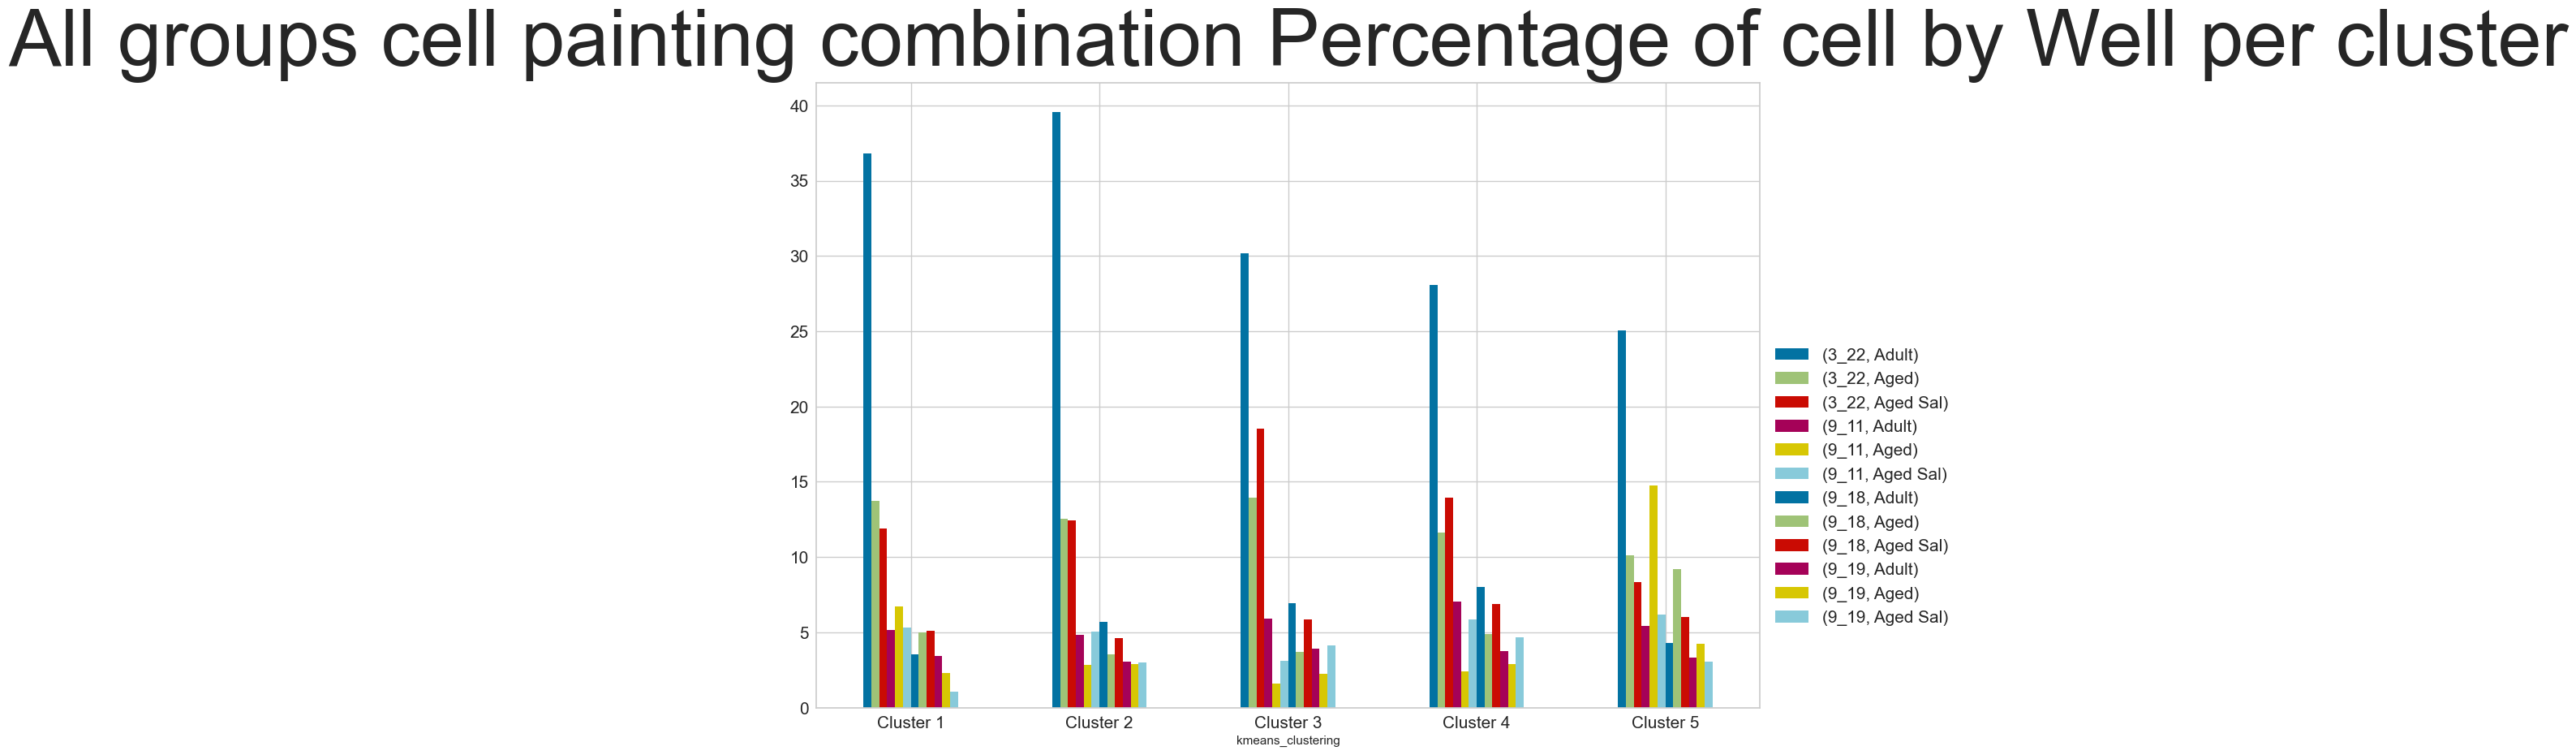

In [170]:
#clustering_data_df_3_22 = viz_clustering_analysis(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#clustering_data_df_3_24 = viz_clustering_analysis(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
clustering_data_df_combined = viz_clustering_analysis(data_df_all=data_combined_norm, curr_exp="cell painting combination")

### Cluster feature importance

In [180]:
def cluster_feat_importance_data(clustering_data_df):

    dict_data = {}
    
    num_features=3

    for cluster in sorted(list(np.unique(clustering_data_df['kmeans_clustering']))):
        y = np.where(clustering_data_df.kmeans_clustering==cluster, 1, 0)

        clf = RandomForestClassifier(random_state=1)
        clf.fit(clustering_data_df.loc[:, relevant_features], y)

        base_imp = pd.DataFrame(clf.feature_importances_,index=relevant_features)#relevant_data_df.columns)
        base_imp = base_imp.reset_index()
        base_imp.columns=["Features", "MDI"]
        base_imp = base_imp.sort_values("MDI", ascending=False)
        list_of_cluster_features = list(base_imp['Features'][:num_features])

        relevant_data_df = clustering_data_df[clustering_data_df['kmeans_clustering']==cluster]
        age_labels = list(relevant_data_df['Age'])
        sample_labels = list(relevant_data_df['Sample'])
        exp_labels = list(relevant_data_df['Exp'])
        relevant_data_df = relevant_data_df.loc[:, list_of_cluster_features]
        scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(scaled_features, columns=relevant_data_df.columns)
        vis_df['Age'] = age_labels
        vis_df['Sample'] = sample_labels

        dict_data[cluster] = vis_df
        
    return dict_data


In [181]:
dict_data_cluster_feat = cluster_feat_importance_data(clustering_data_df_combined)

In [173]:
dict_data_cluster_feat.keys()

dict_keys(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [182]:
clust1_data = dict_data_cluster_feat['Cluster 1']
clust2_data = dict_data_cluster_feat['Cluster 2']
clust3_data = dict_data_cluster_feat['Cluster 3']
clust4_data = dict_data_cluster_feat['Cluster 4']
clust5_data = dict_data_cluster_feat['Cluster 5']
#clust6_data = dict_data_cluster_feat['Cluster 6']

In [32]:
clust1_data

Cell area  Cell width  Mito cyto intensity sum  \
0     -0.741275   -0.347272                 0.010394   
1     -0.293467   -0.123612                -0.304144   
2     -0.437505   -0.296555                -0.113592   
3     -0.316551   -0.613202                -0.191351   
4      0.396747   -0.616375                -0.030439   
...         ...         ...                      ...   
1557  -0.650785    0.488127                -0.372007   
1558  -0.899986   -1.434020                 0.432307   
1559  -0.770323   -0.265820                 2.137086   
1560  -0.894103   -0.984481                -0.657354   
1561  -0.417536    0.050961                -0.994998   

      Actin cyto intensity sum  Cell length       Age            Sample  
0                    -0.263771    -1.096280     Adult     3_22 Adult S1  
1                    -0.537341    -0.622360     Adult     3_22 Adult S1  
2                    -0.500359    -0.450402     Adult     3_22 Adult S1  
3                    -0.392052    -0.747479     Adult     3_22 Adult S1  
4                    -0.049215    -0.171674     Adult     3_22 Adult S1  
...                        ...          ...       ...               ...  
1557                 -0.295739    -1.211002  Aged Sal  9_19 Aged Sal S2  
1558                 -0.400110     0.546451  Aged Sal  9_19 Aged Sal S2  
1559                 -0.089488    -1.102890  Aged Sal  9_19 Aged Sal S2  
1560                 -0.391995     0.710906  Aged Sal  9_19 Aged Sal S2  
1561                 -0.122674    -0.481743  Aged Sal  9_19 Aged Sal S2  

[1562 rows x 7 columns]

In [174]:
def viz_cluster_feat(df,title, save_name):

    indiv_data = df.groupby(by=['Age', 'Sample']).mean()

    yerr = df.drop('Sample', axis=1).groupby('Age').sem().T

    bar_val = df.drop('Sample', axis=1).groupby('Age').mean().T

    x = np.arange(len(indiv_data.columns))  

    width = 0.25  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    error_bar_settings = dict(
            ecolor='black',         # Edge color of the error bars
            elinewidth=2,         # Line width of the error bars
            capsize=5,           # Width of the caps on the error bars
            capthick=2            # Thickness of the cap lines
        )

    for attribute in bar_val.columns:
        measurement = bar_val[attribute]
        offset = width * multiplier
        # Get the color for the current attribute
        color = age_color_map.get(attribute, 'black')
        rects = ax.bar(
            x + offset, measurement, width, label=attribute,
            yerr=yerr[attribute], capsize=20, color=color, error_kw=error_bar_settings, alpha=0.6
        )
        multiplier += 1

    # # Now plot the scatter points (individual data)
    # multiplier = 0
    # jitter_factor = 0.4
    # for attribute in bar_val.columns:
    #     offset = width * multiplier
    #     color = age_color_map.get(attribute, 'black')

        
    #     for i, variable in enumerate(bar_val.index):
    #         # Check if the attribute exists in the data
    #         if attribute in indiv_data.index.get_level_values('Age').unique():
    #             # Get individual data points
    #             data_points = indiv_data.loc[attribute][variable].values
    #             x_positions = x[i] + offset + (np.random.rand(len(data_points)) - 0.5) * width * jitter_factor
    #             ax.scatter(x_positions, data_points, color='black', zorder=10)
    #     multiplier += 1

    ax.set_xticks(x + width, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
    
    file_name = os.getcwd() + '/figures/' + save_name

    fig.savefig(file_name, dpi=600, bbox_inches='tight')


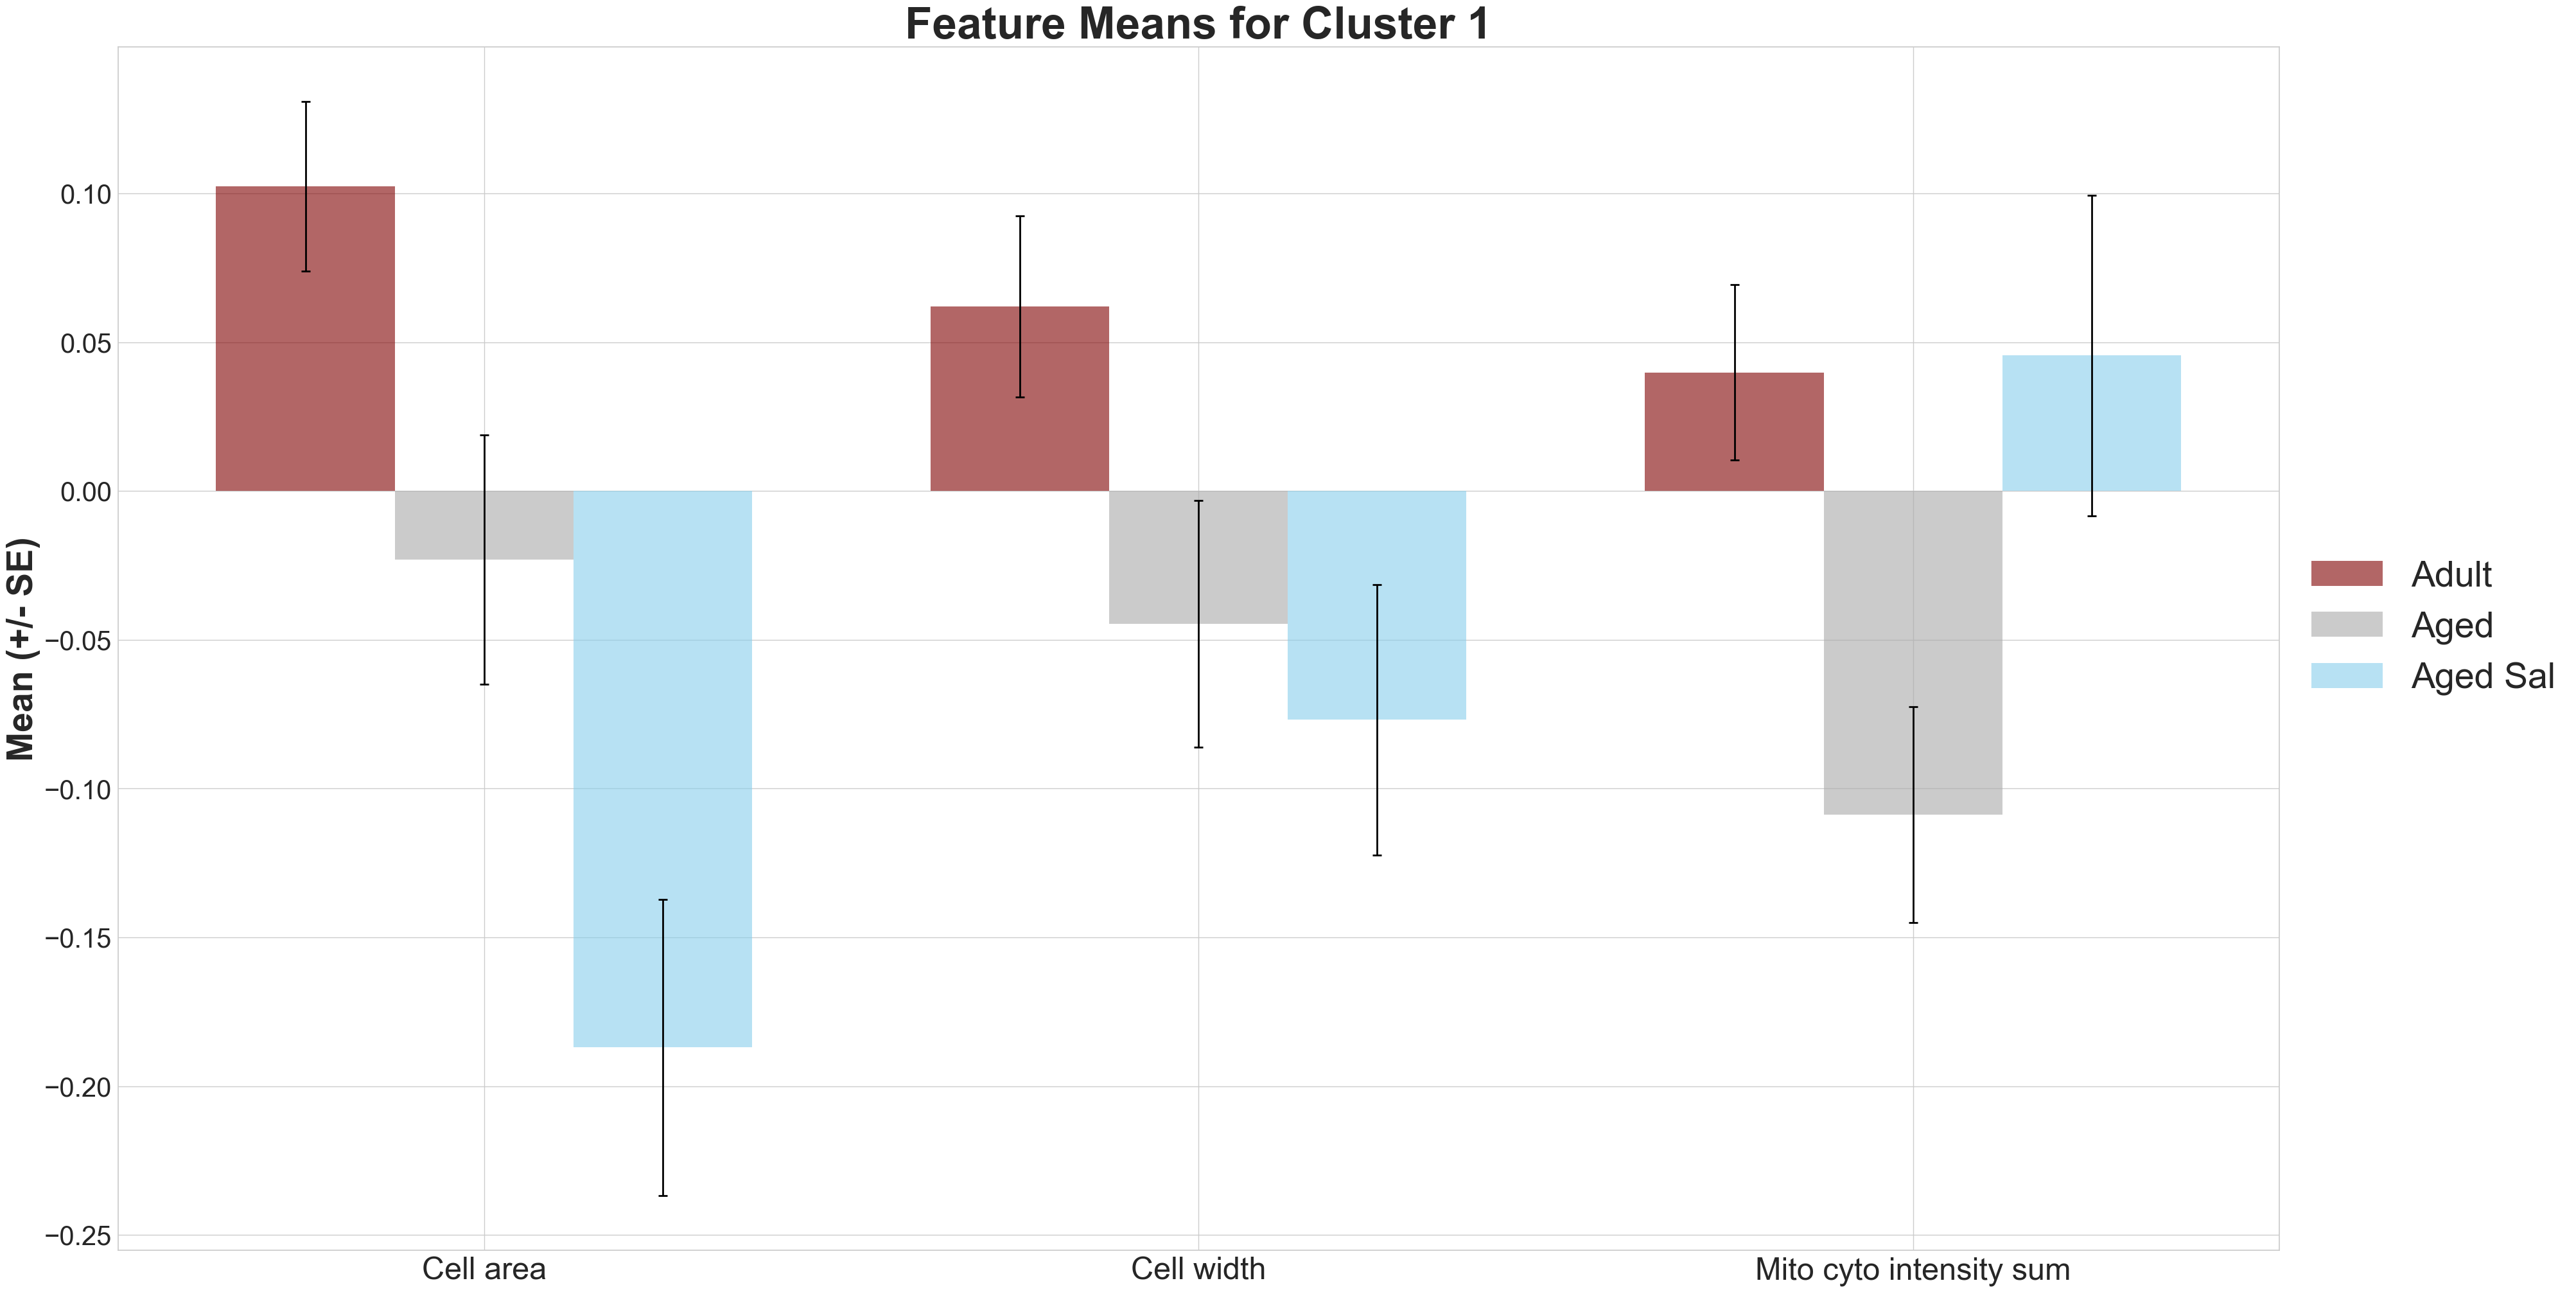

In [183]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

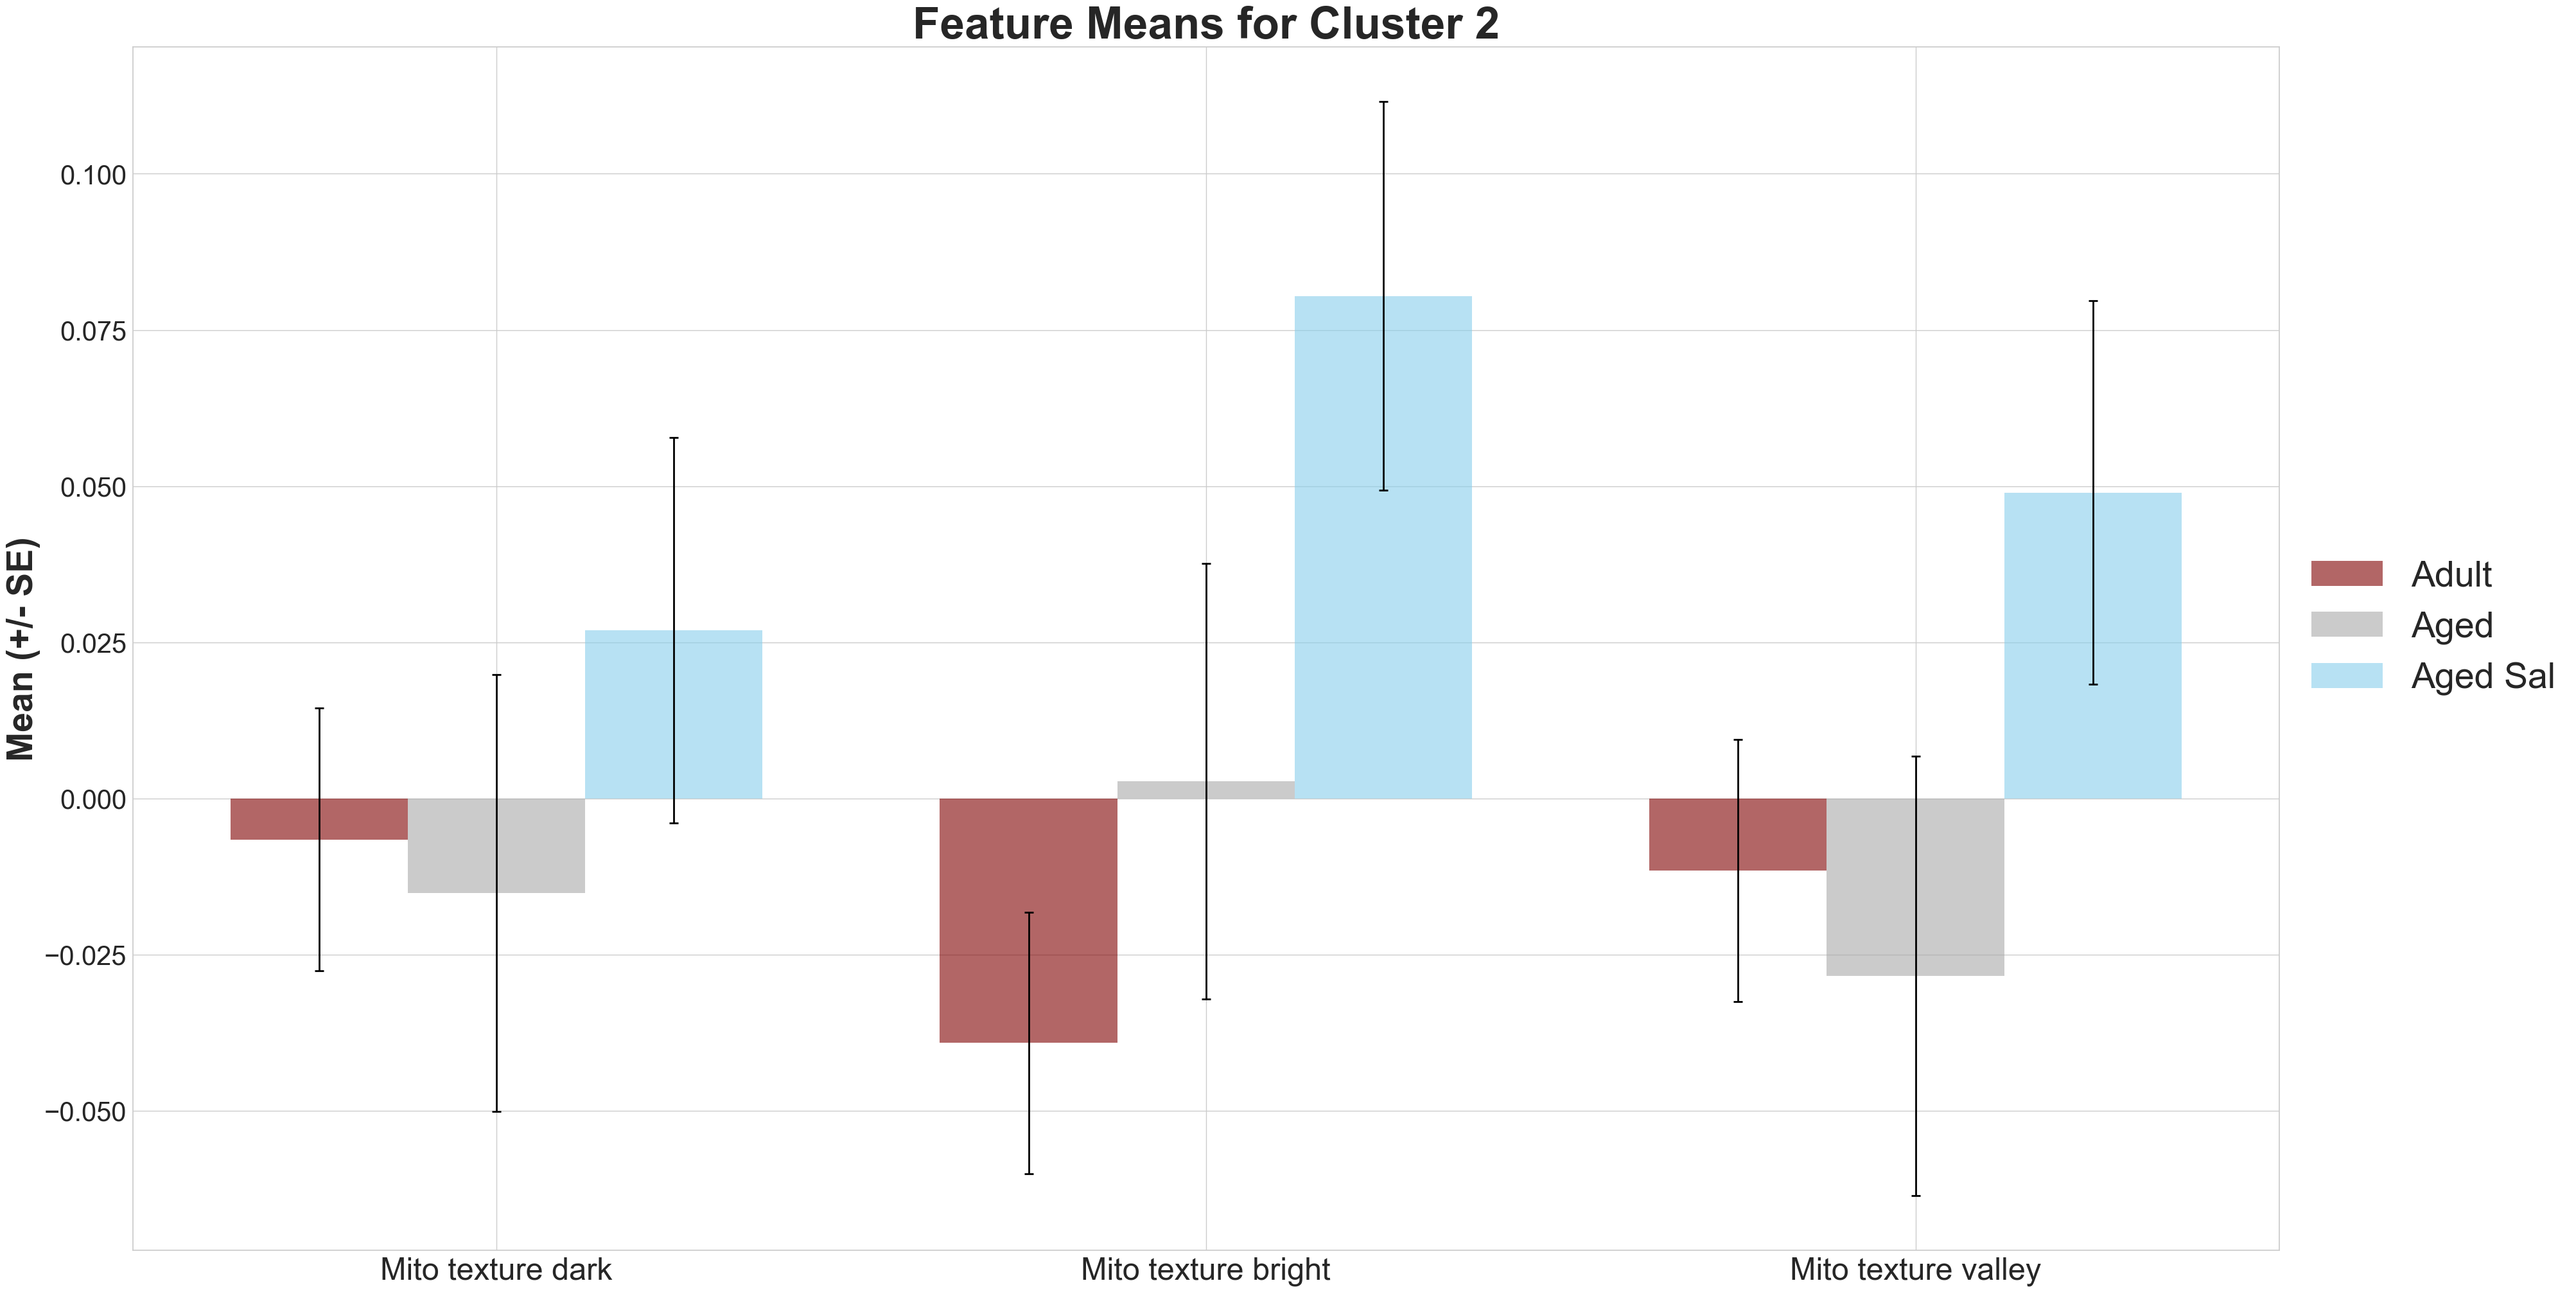

In [184]:
viz_cluster_feat(clust2_data,"Feature Means for Cluster 2","clust2.png")

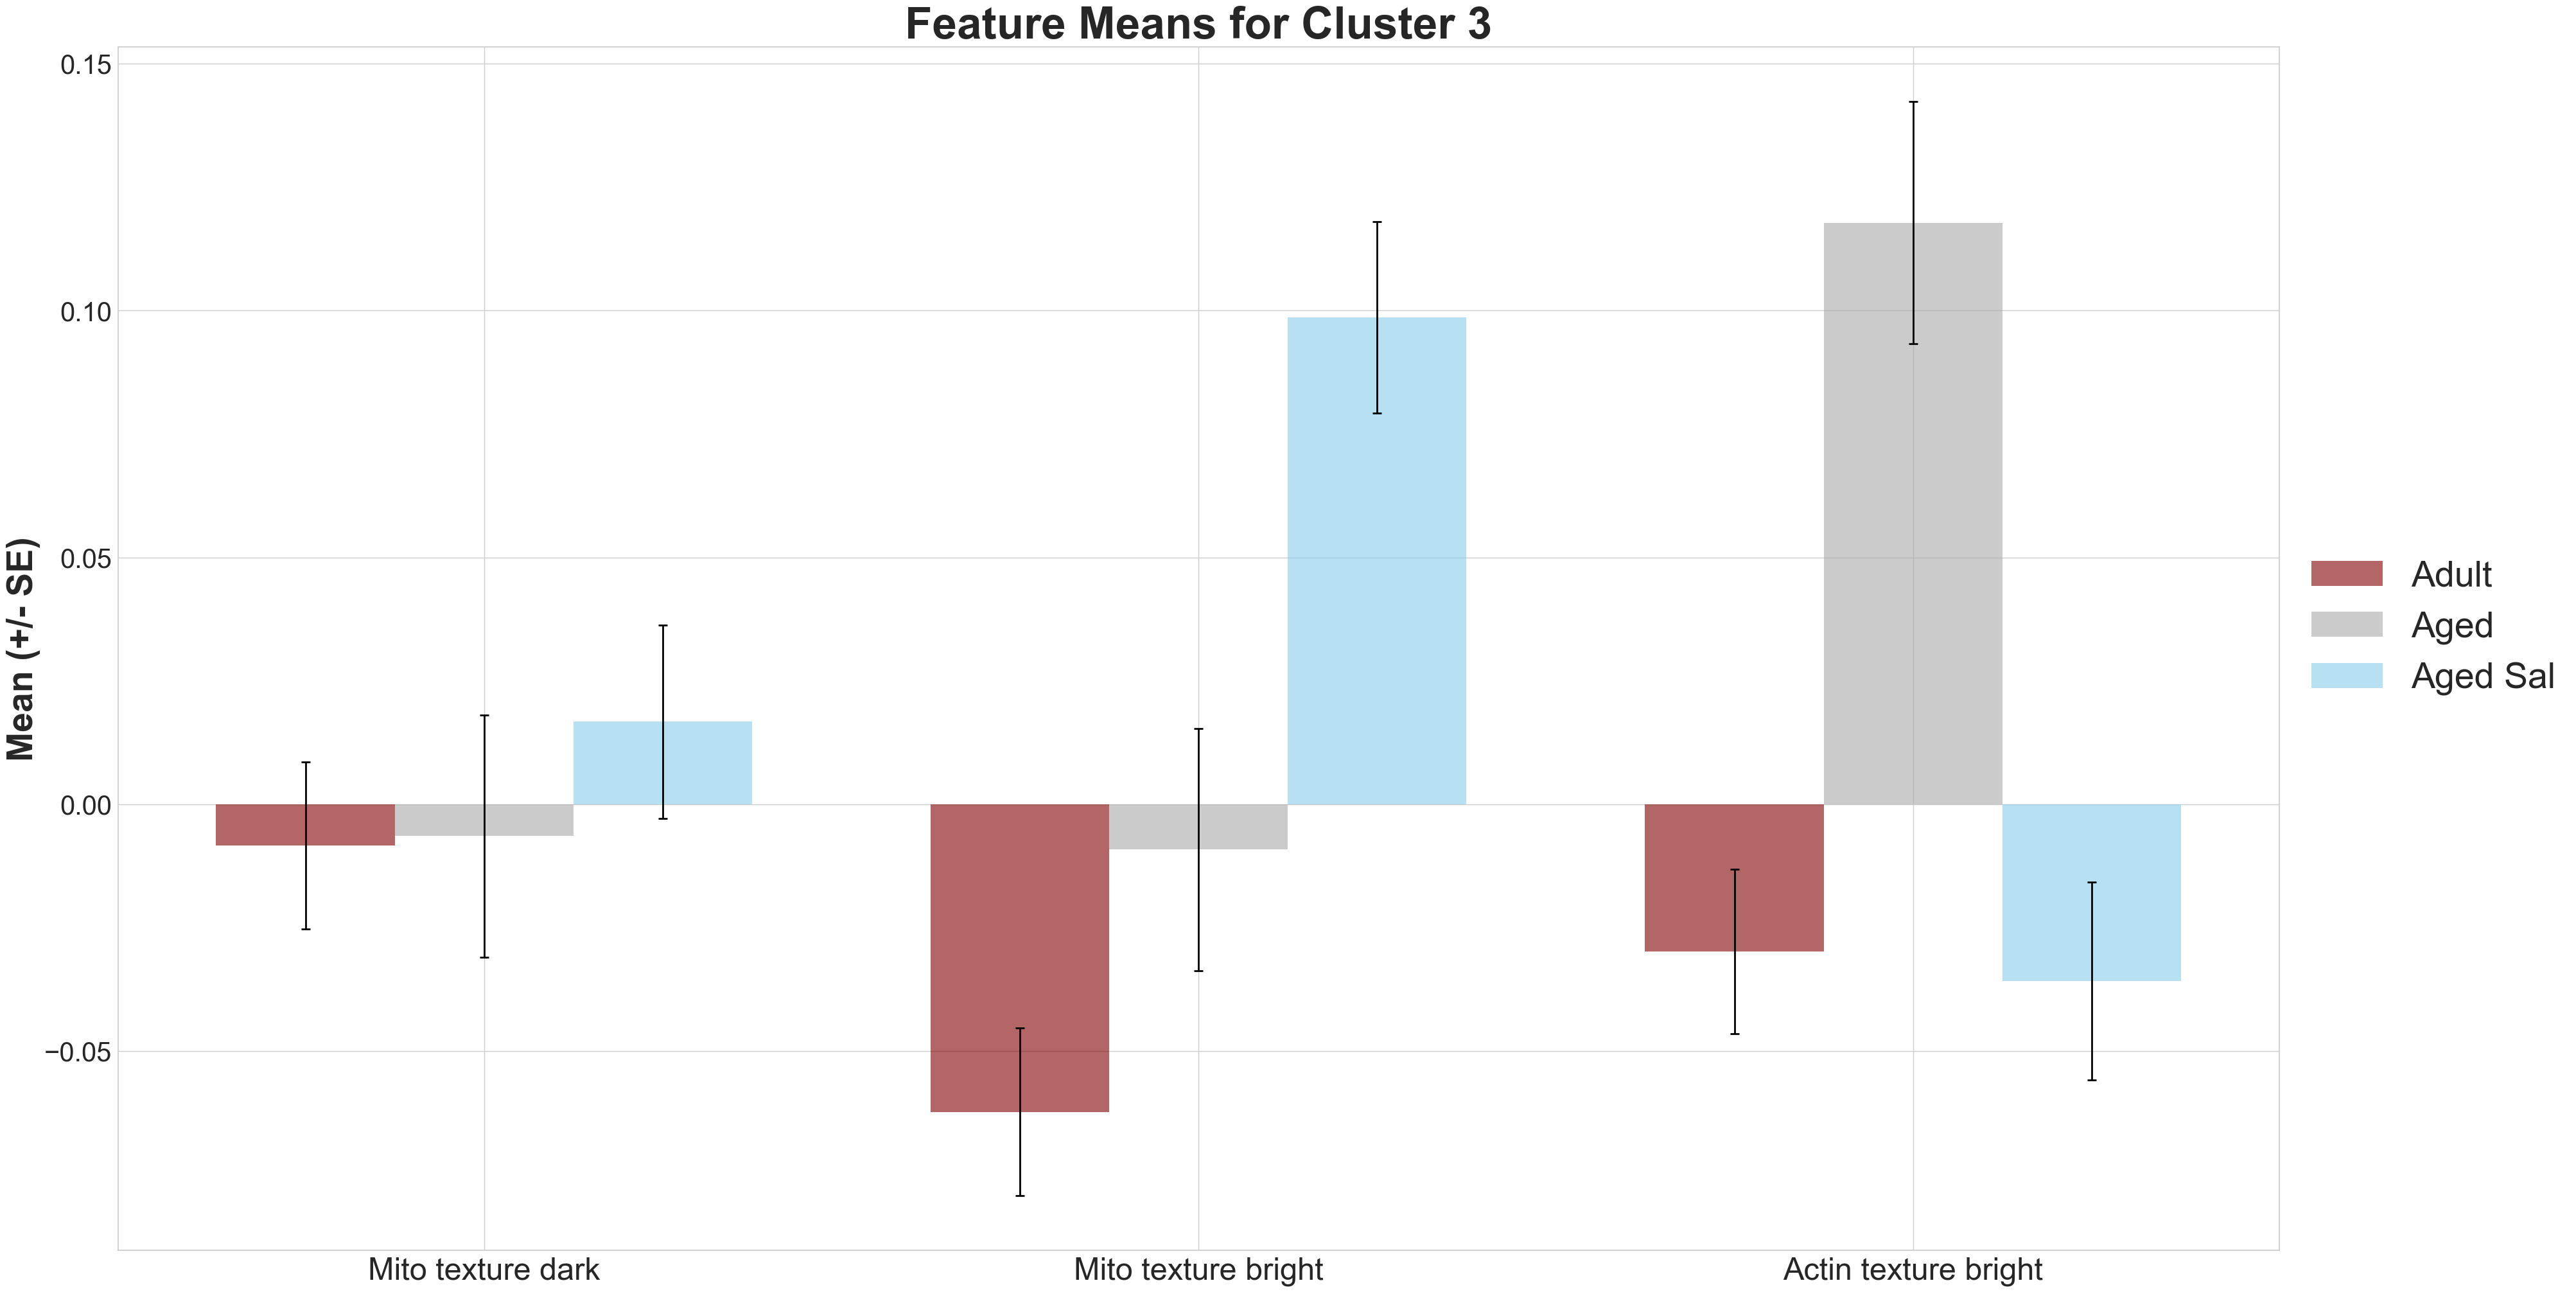

In [185]:
viz_cluster_feat(clust3_data,"Feature Means for Cluster 3","clust3.png")

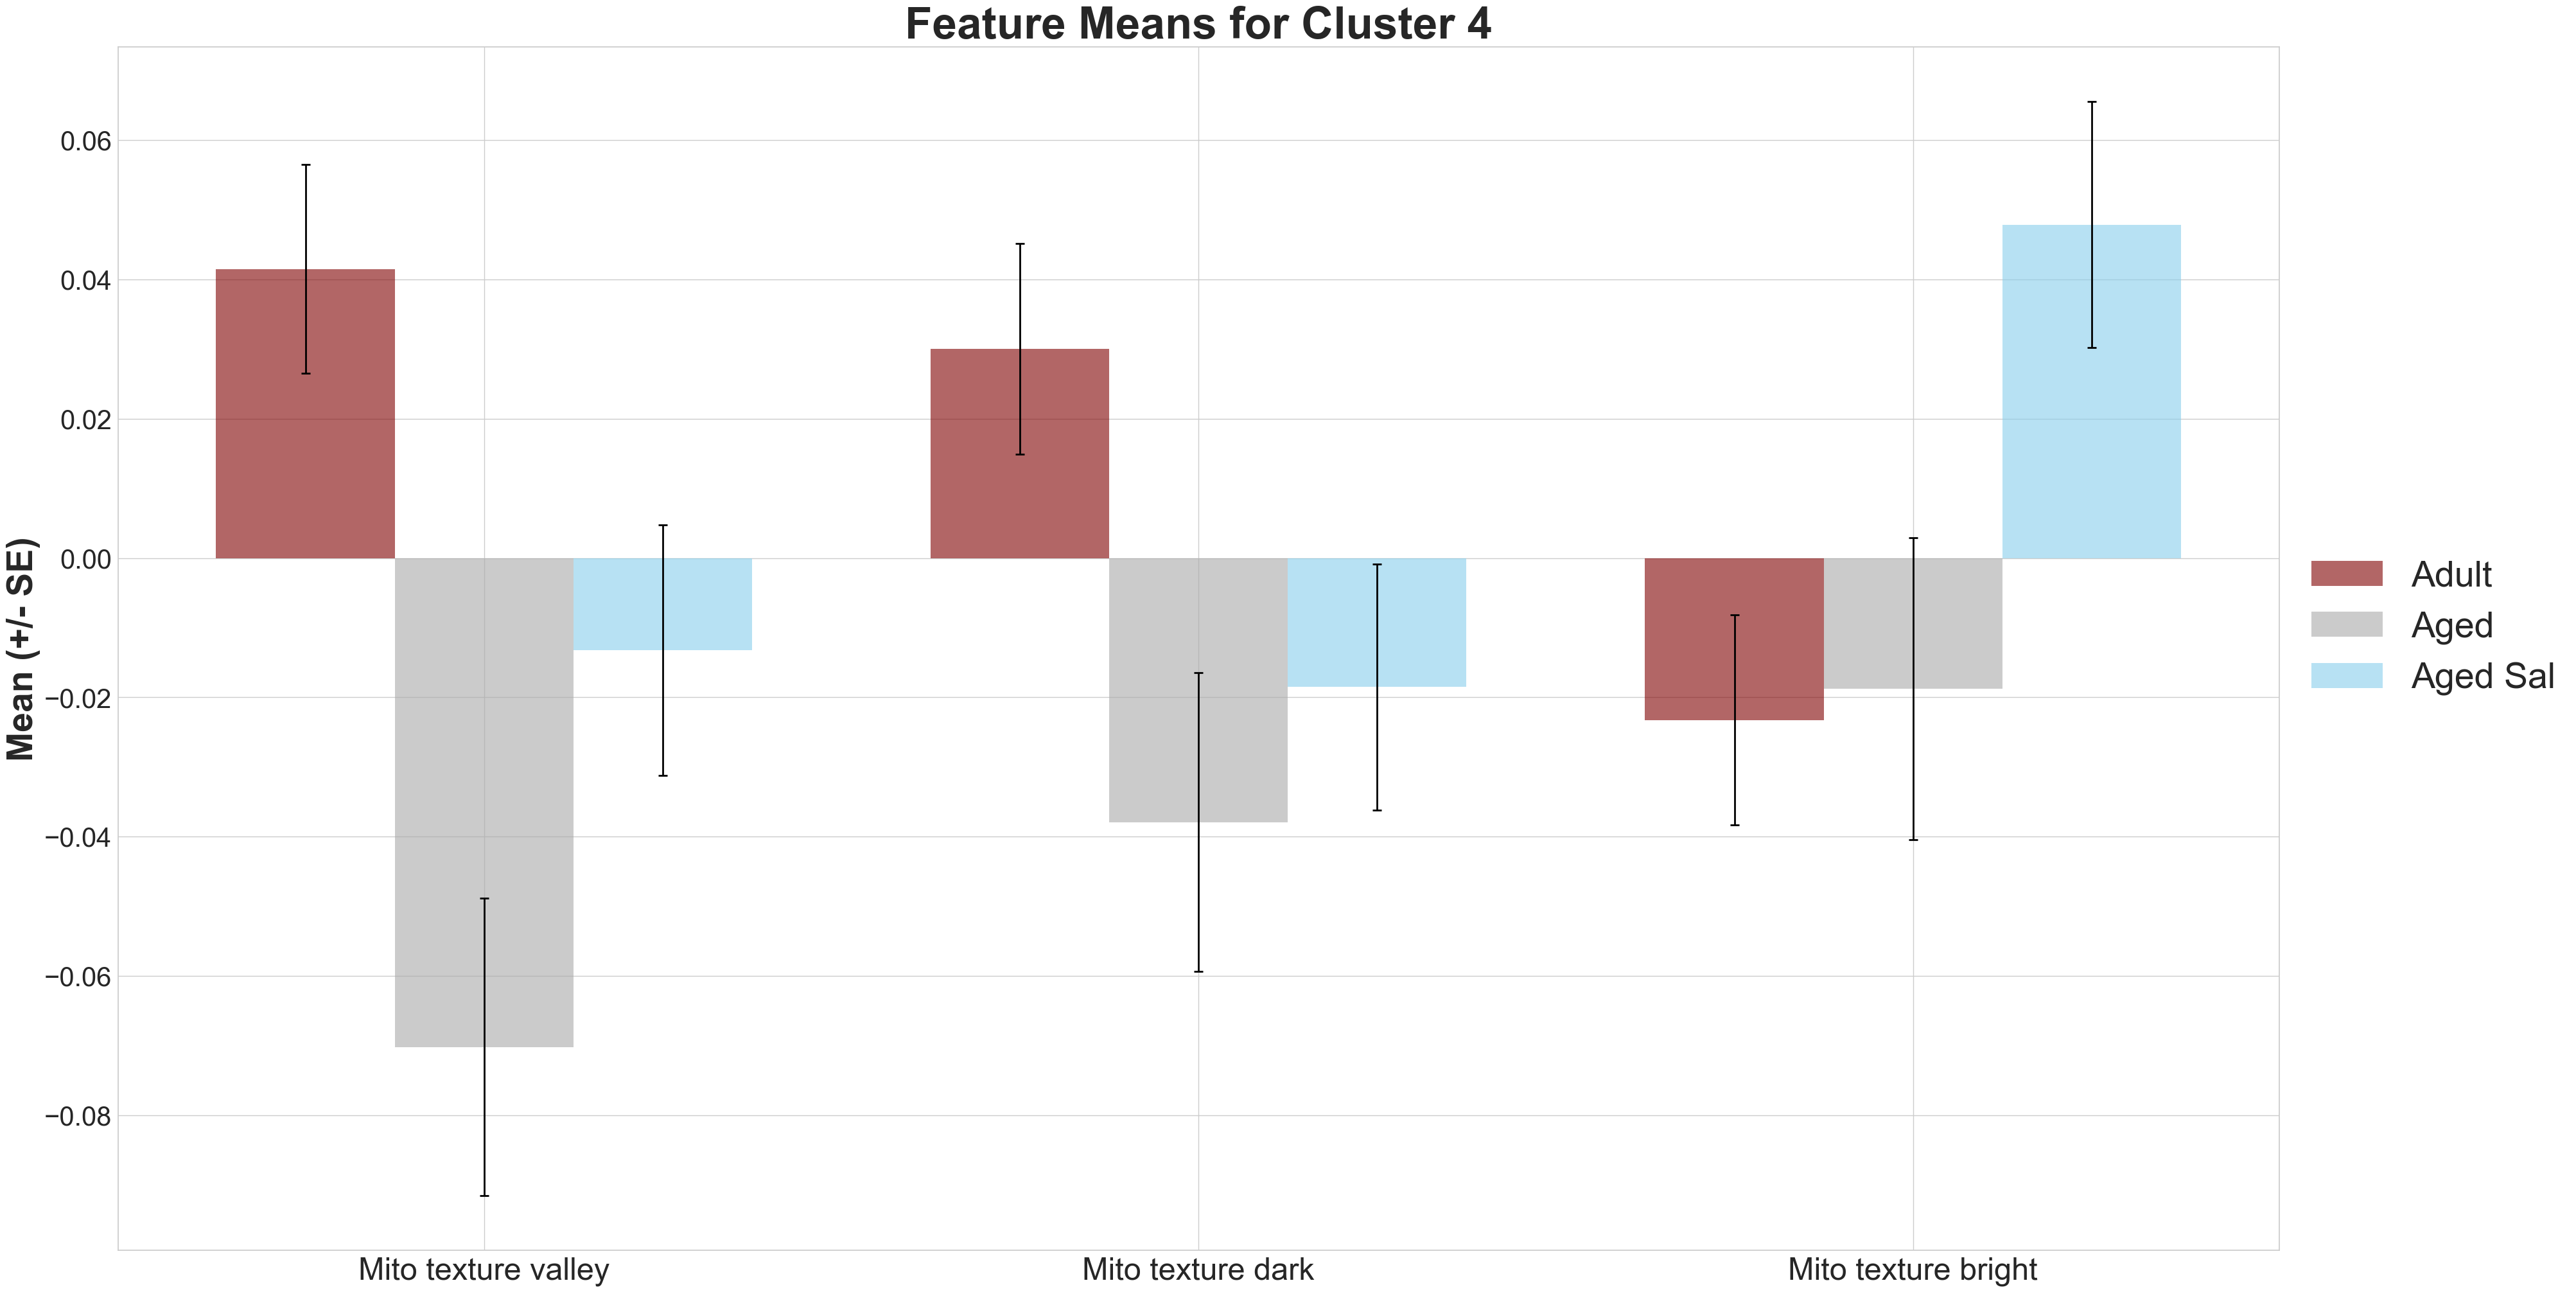

In [186]:
viz_cluster_feat(clust4_data,"Feature Means for Cluster 4","clust4.png")

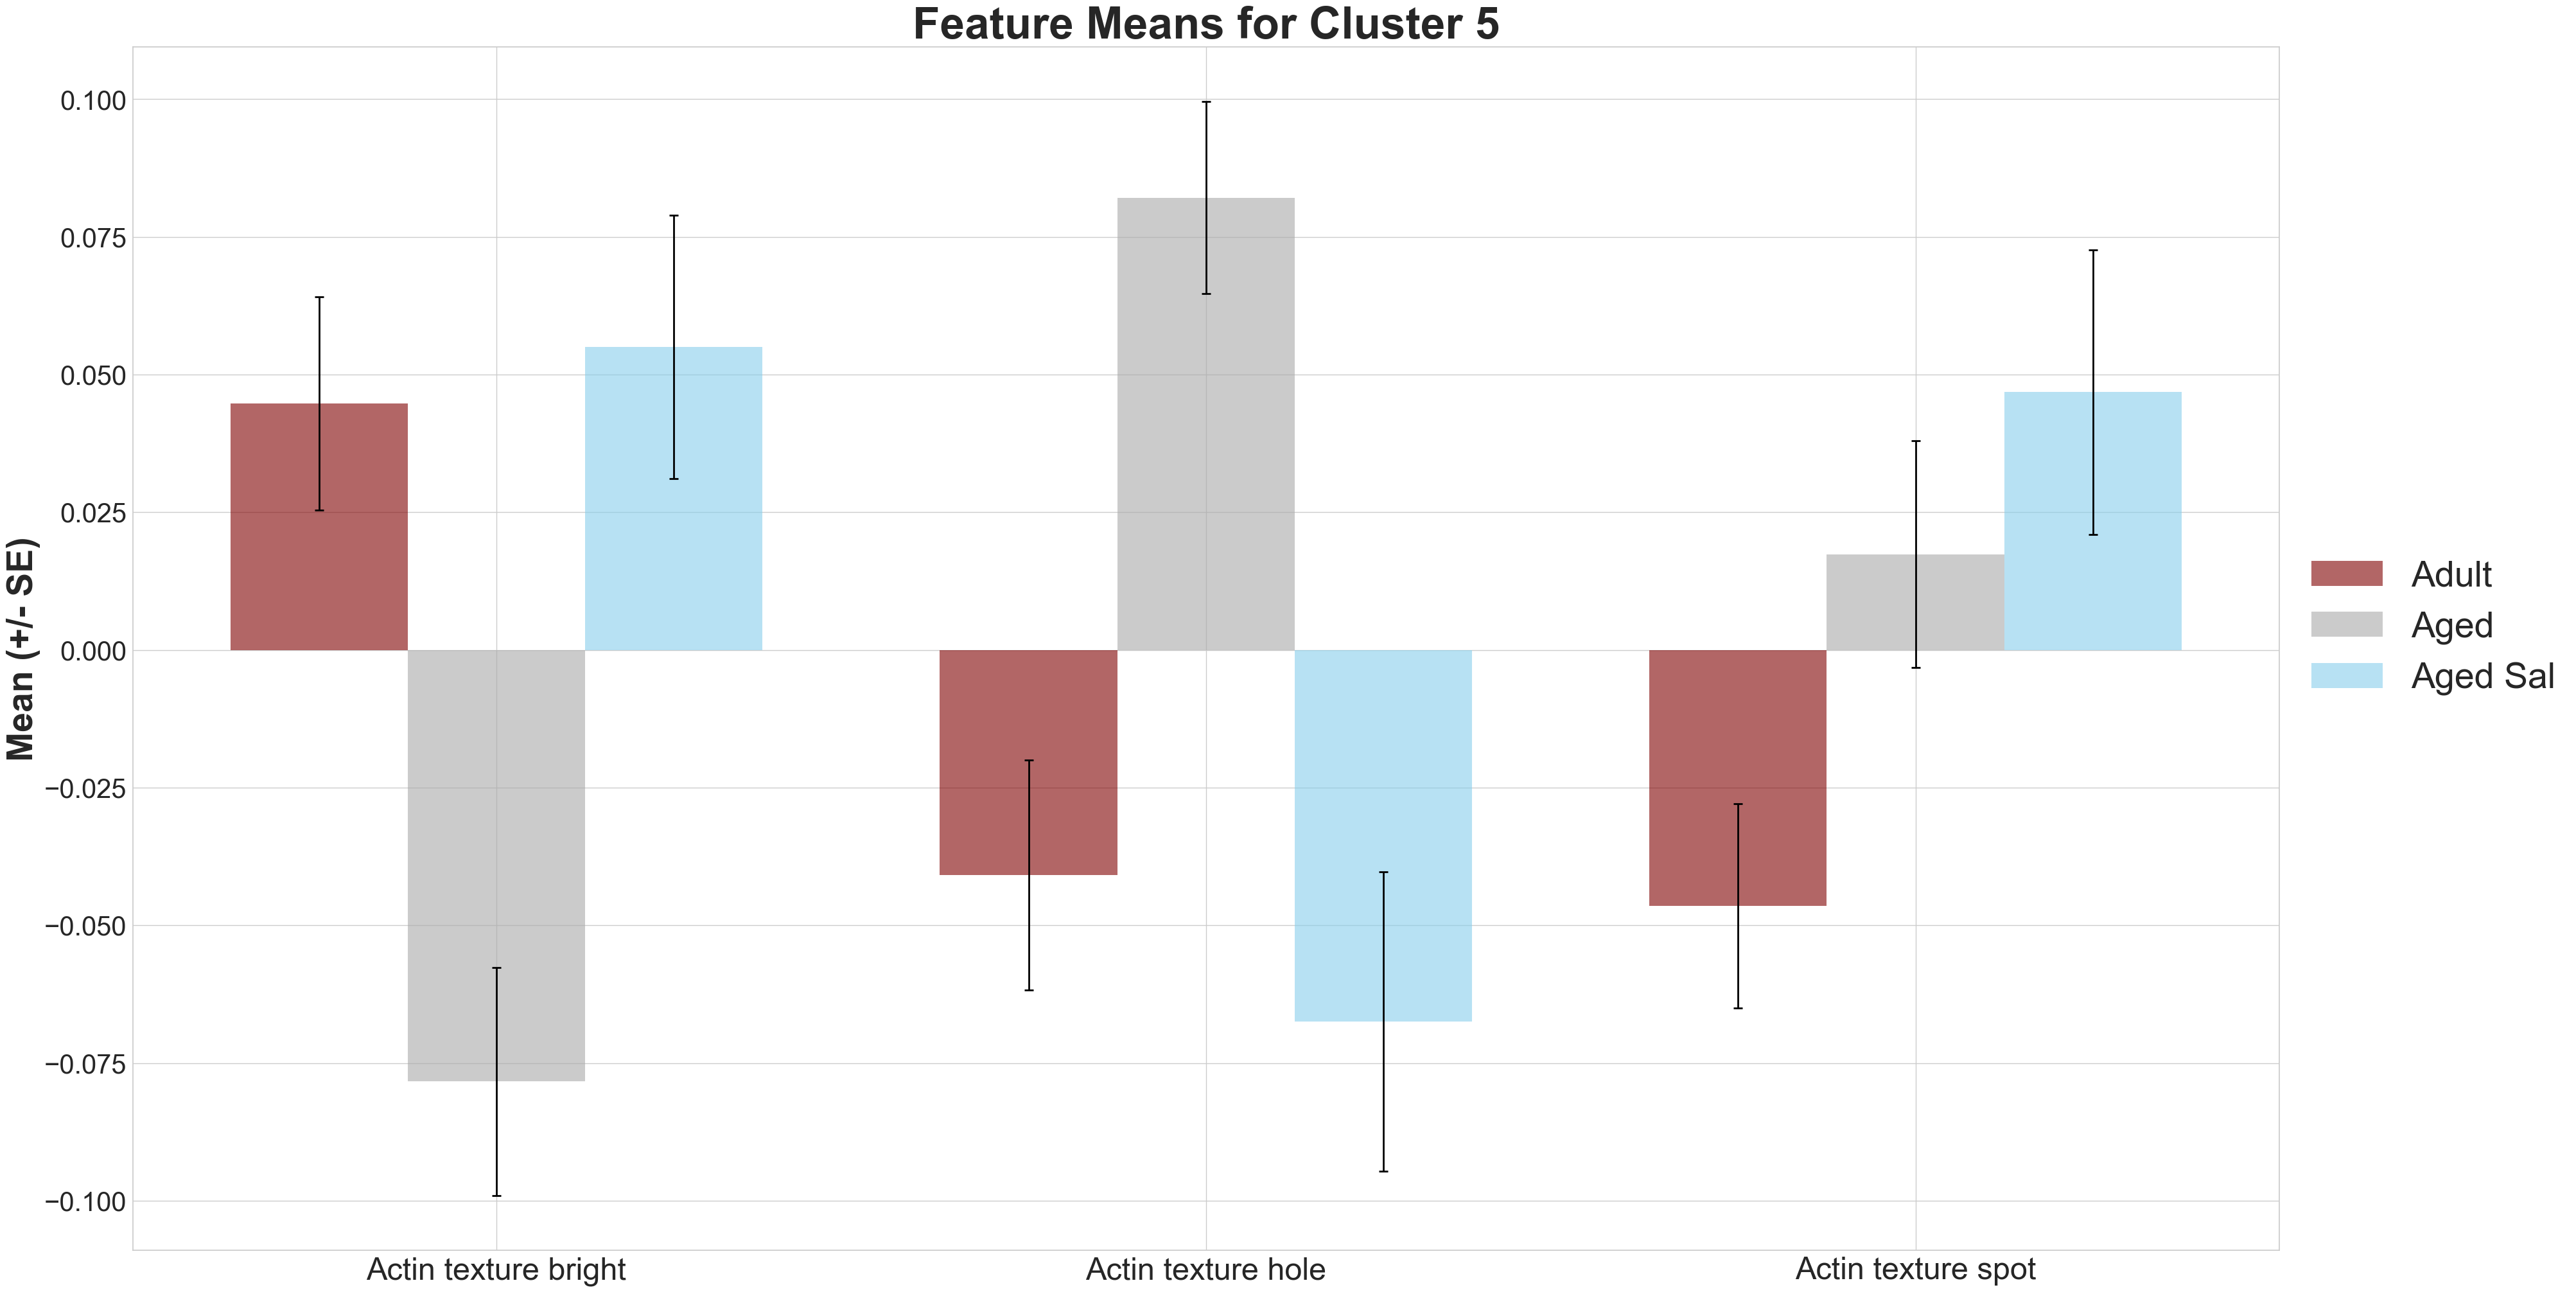

In [187]:
viz_cluster_feat(clust5_data,"Feature Means for Cluster 5","clust5.png")

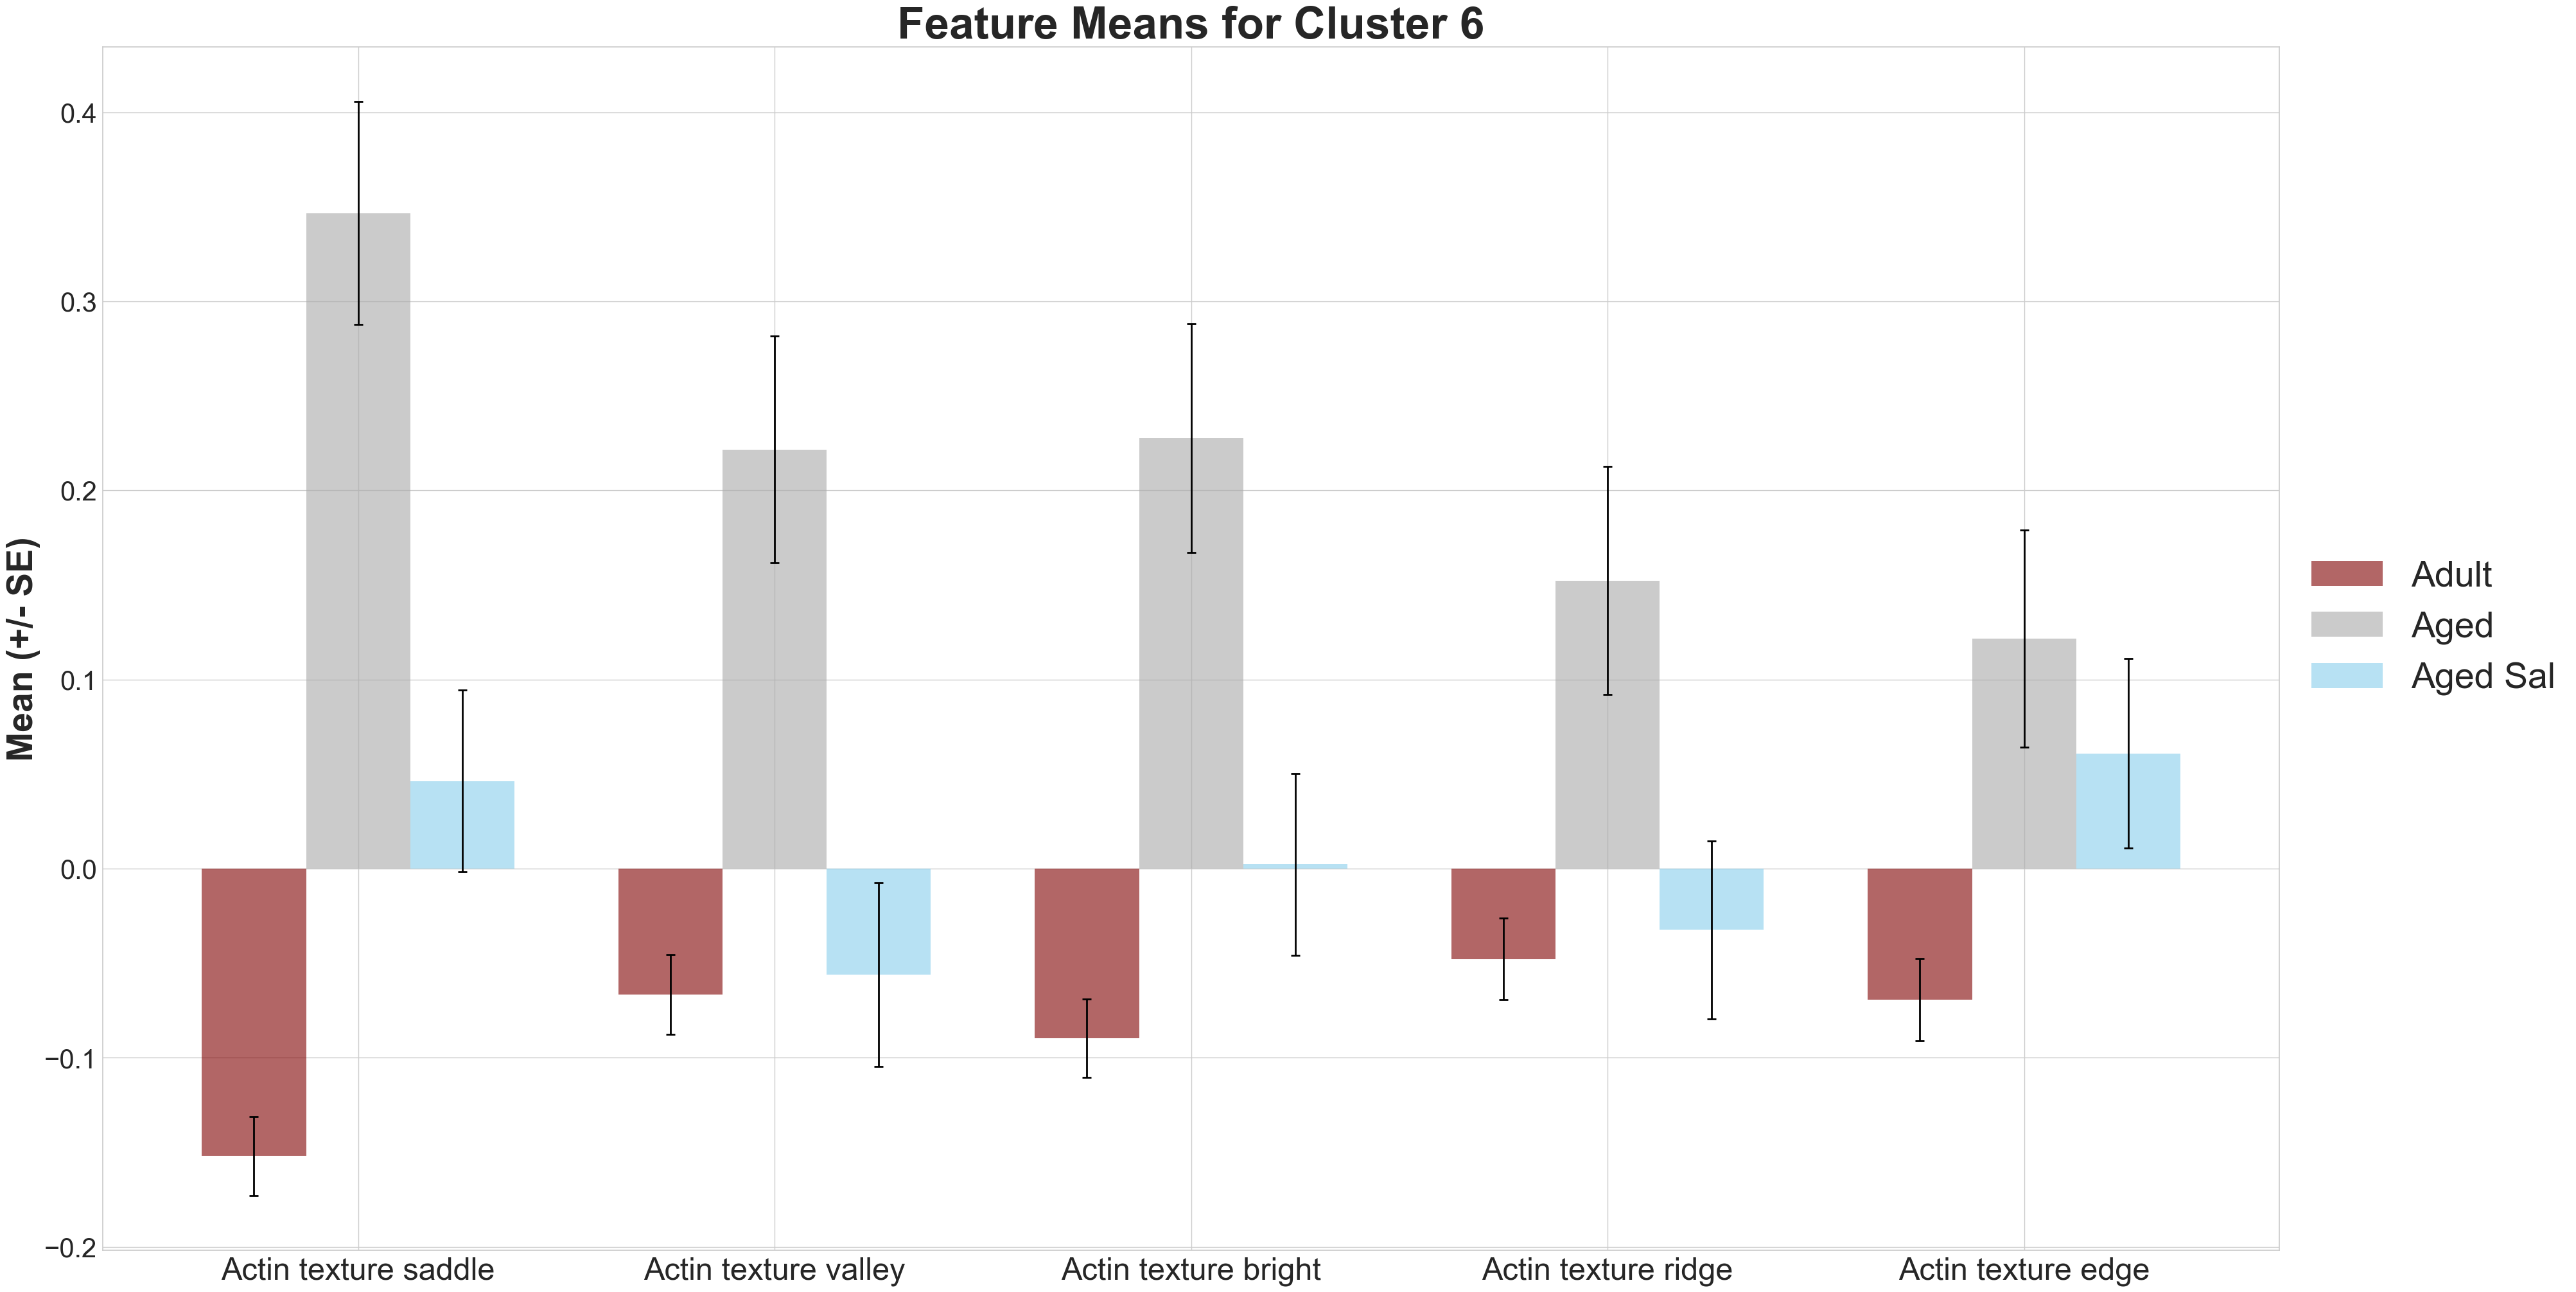

In [52]:
viz_cluster_feat(clust6_data,"Feature Means for Cluster 6","clust6.png")

In [56]:
clust1_data.columns[:-2]

Index(['Mito texture valley', 'Mito texture bright', 'Mito texture saddle',
       'Mito texture dark', 'Mito texture ridge'],
      dtype='object')

In [44]:
def hist_plot_ad_ag_ags(clust_list):
    clust_num = 1  # Initialize clust_num outside the loop over clust_list
    for clust in clust_list:
        for feature in clust.columns[:-2]:
            plt.figure(figsize=(10, 6))
            
            # Adult data
            adult_data = clust[clust['Age'] == 'Adult'][feature]
            plt.hist(adult_data, bins=50, alpha=0.5, label='Adult')
            plt.axvline(adult_data.mean(), color='maroon', linestyle='dashed', linewidth=2, label='Adult Mean')
            plt.axvline(adult_data.median(), color='maroon', linestyle='solid', linewidth=2, label='Adult Median')
            
            # Aged data
            aged_data = clust[clust['Age'] == 'Aged'][feature]
            plt.hist(aged_data, bins=50, alpha=0.5, label='Aged')
            plt.axvline(aged_data.mean(), color='darkgrey', linestyle='dashed', linewidth=2, label='Aged Mean')
            plt.axvline(aged_data.median(), color='darkgrey', linestyle='solid', linewidth=2, label='Aged Median')

            # Aged Sal data
            aged_sal = clust[clust['Age'] == 'Aged Sal'][feature]
            plt.hist(aged_sal, bins=50, alpha=0.5, label='Aged Sal')
            plt.axvline(aged_sal.mean(), color='skyblue', linestyle='dashed', linewidth=2, label='Aged Sal Mean')
            plt.axvline(aged_sal.median(), color='skyblue', linestyle='solid', linewidth=2, label='Aged Sal Median')
            
            # Labels and title
            plt.xlabel(feature)
            plt.ylabel("Frequency")
            plt.legend()
            plt.title(f"Cluster {clust_num}: Overlay Histogram of {feature}")
            plt.show()
        
        # Increment clust_num after processing each cluster
        clust_num += 1


In [86]:
clust1_data

Mito texture valley  Mito texture bright  Mito texture saddle  \
0               -0.570673             0.605221             0.575175   
1                2.121316             1.519572             2.465689   
2                1.334266             0.952517             0.799295   
3                0.091616             0.310689            -0.428007   
4               -1.016989             0.408380            -1.068451   
...                   ...                  ...                  ...   
5601             0.058175            -0.037819             0.697950   
5602            -0.489031             0.221559            -0.531367   
5603             2.404762             1.941339             3.040433   
5604            -1.064061            -0.798706            -0.930554   
5605            -1.044543            -1.045955            -0.791068   

      Mito texture dark  Mito texture ridge    Age         Sample  
0             -0.452218            0.361534  Adult  3_22 Adult S1  
1              2.243070            0.905703  Adult  3_22 Adult S1  
2              1.161974            1.170250  Adult  3_22 Adult S1  
3              0.524738            0.834651  Adult  3_22 Adult S1  
4             -0.992278            0.710679  Adult  3_22 Adult S1  
...                 ...                 ...    ...            ...  
5601           0.106504           -0.757631   Aged   9_19 Aged S2  
5602           0.160363            0.070487   Aged   9_19 Aged S2  
5603           1.985979            1.307584   Aged   9_19 Aged S2  
5604          -0.837517           -0.739402   Aged   9_19 Aged S2  
5605          -0.926896           -0.817230   Aged   9_19 Aged S2  

[5606 rows x 7 columns]

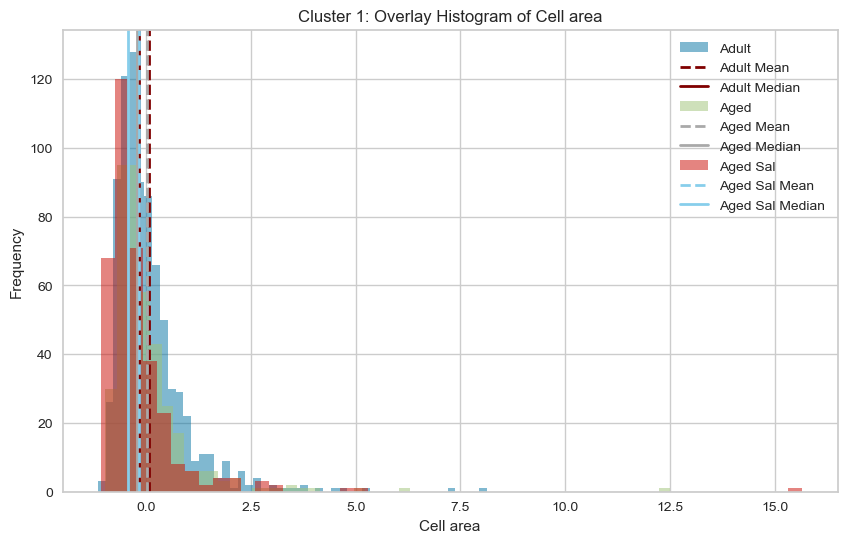

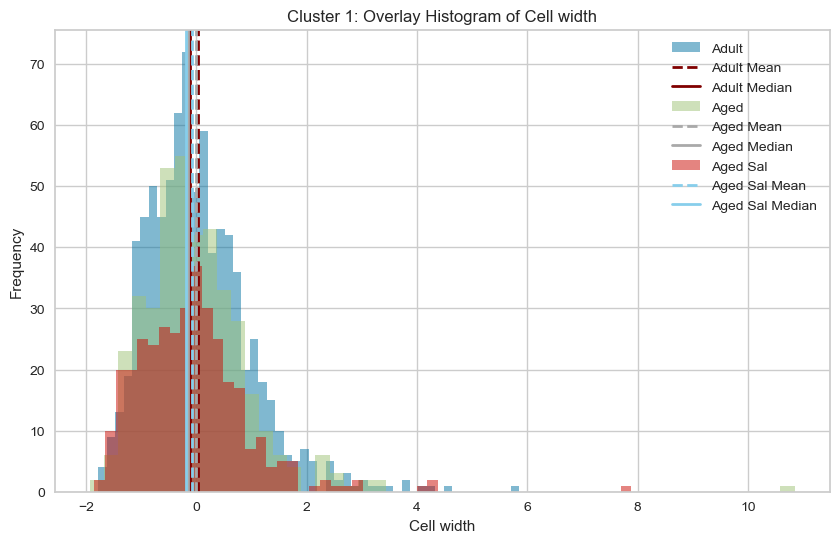

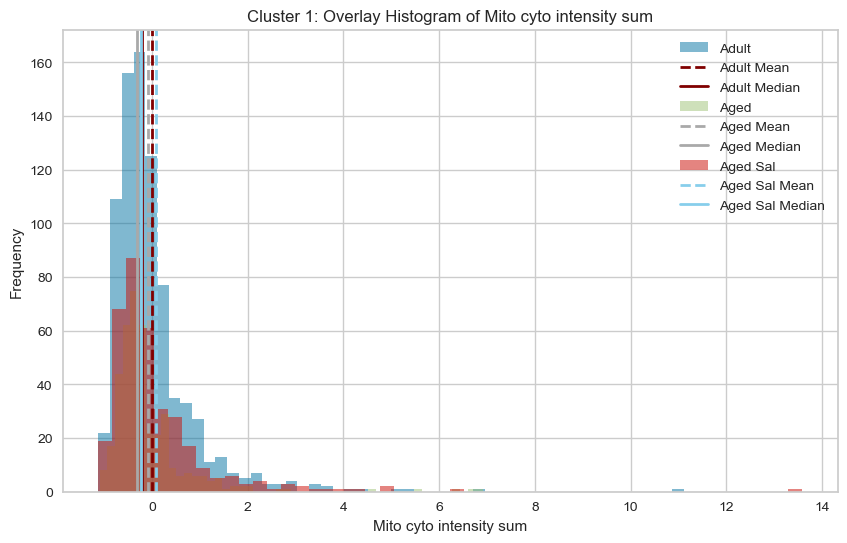

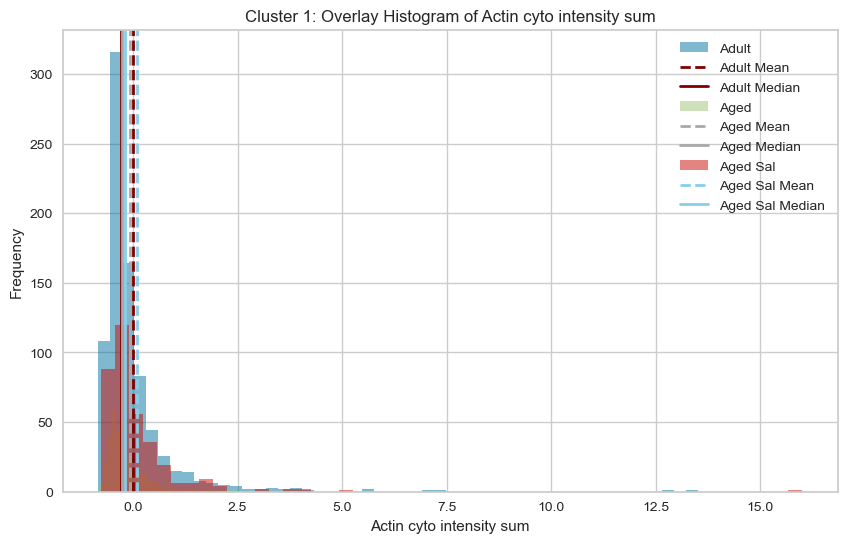

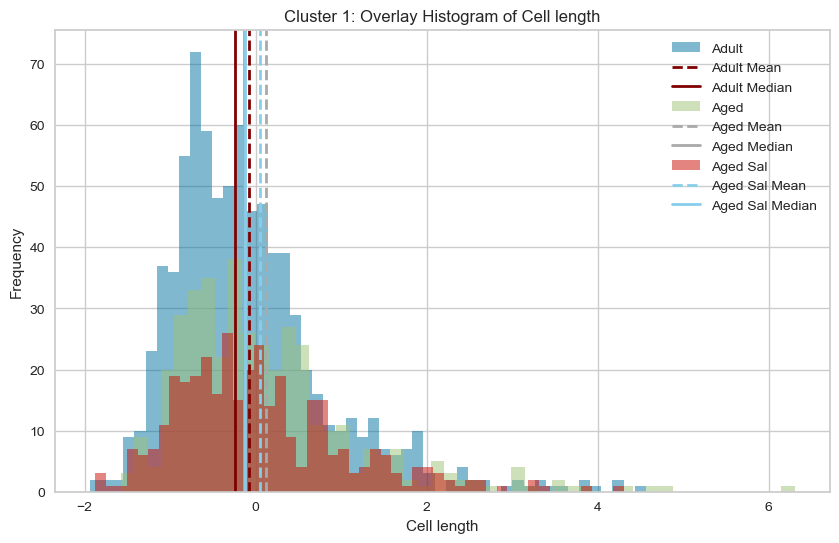

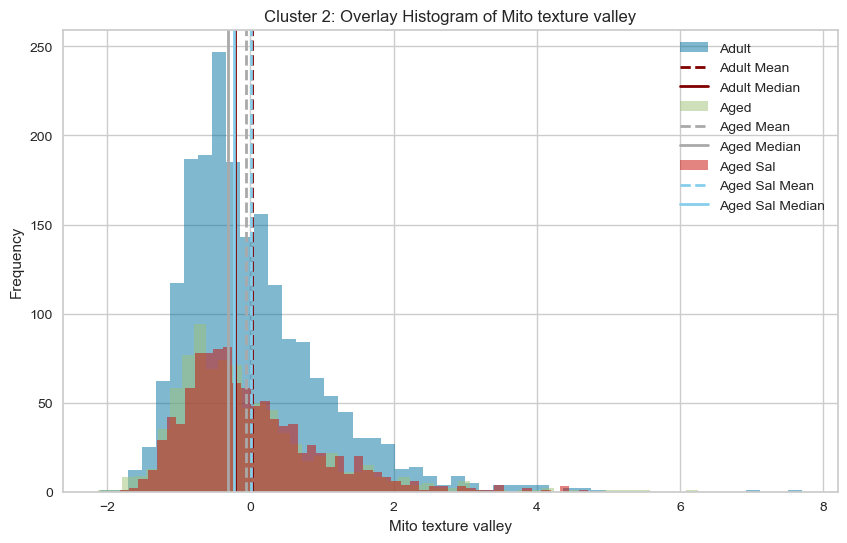

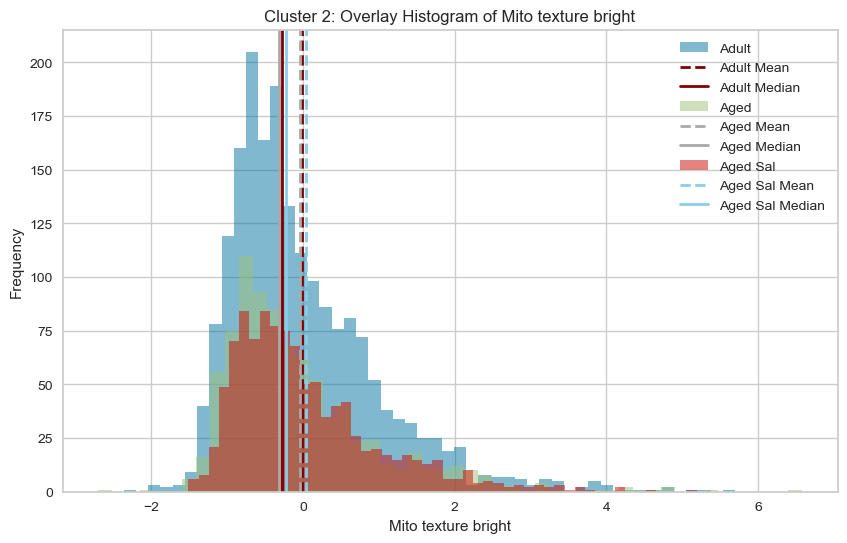

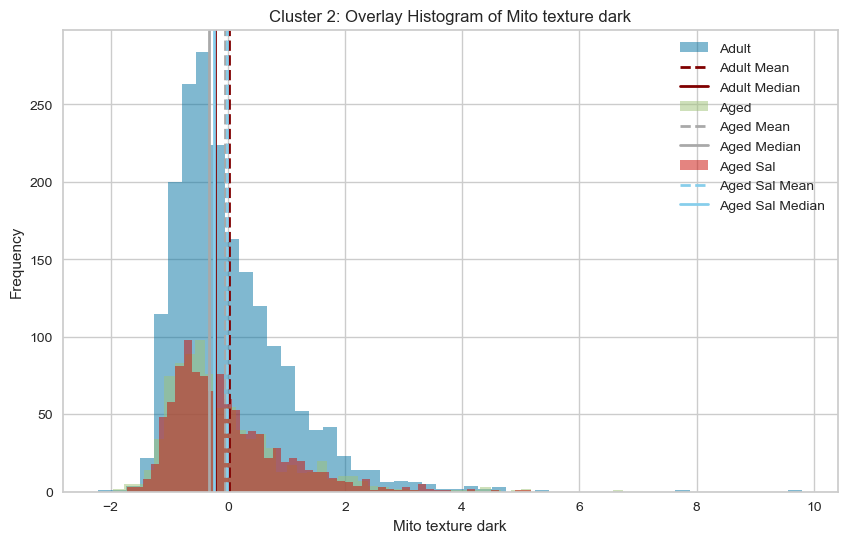

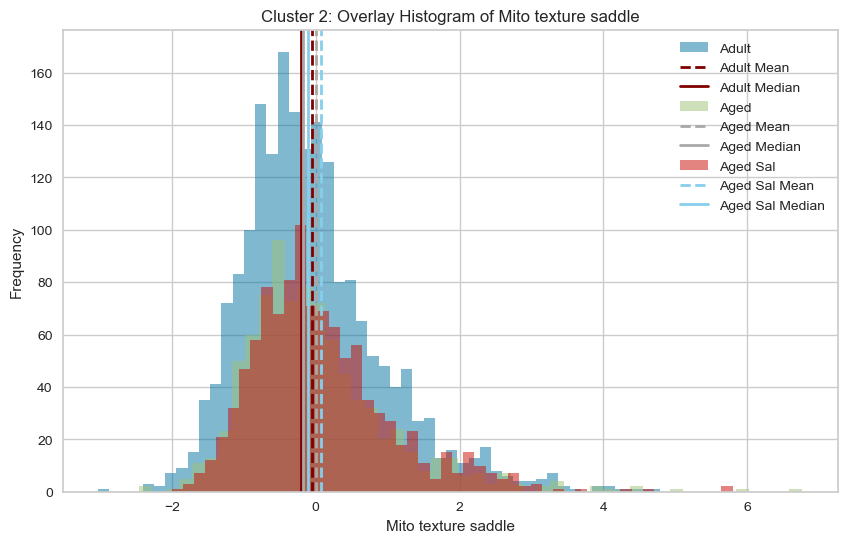

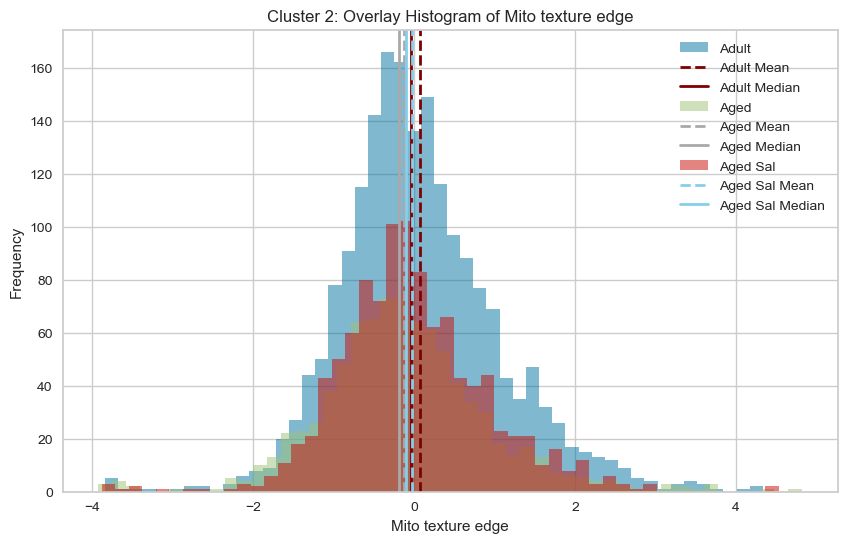

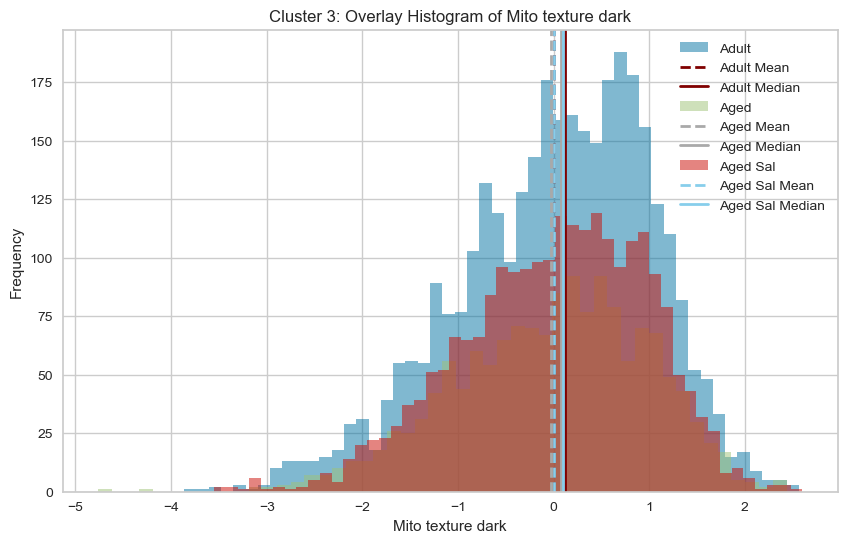

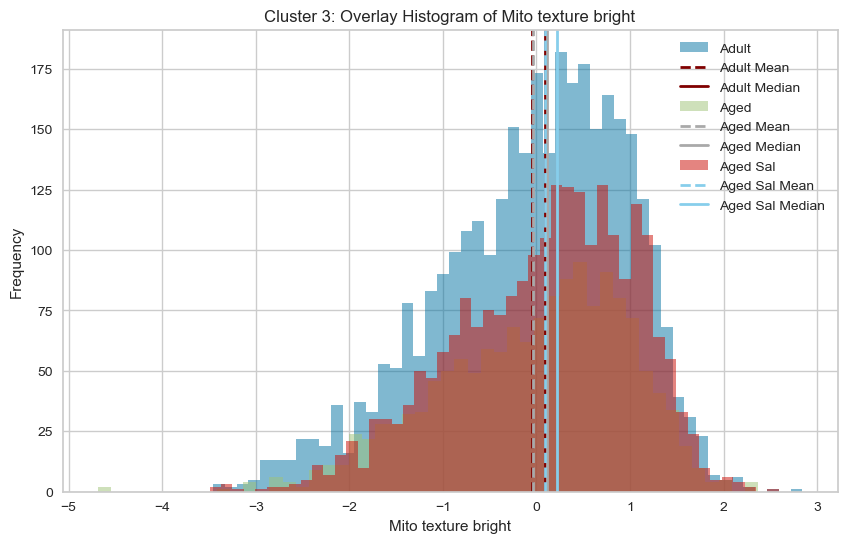

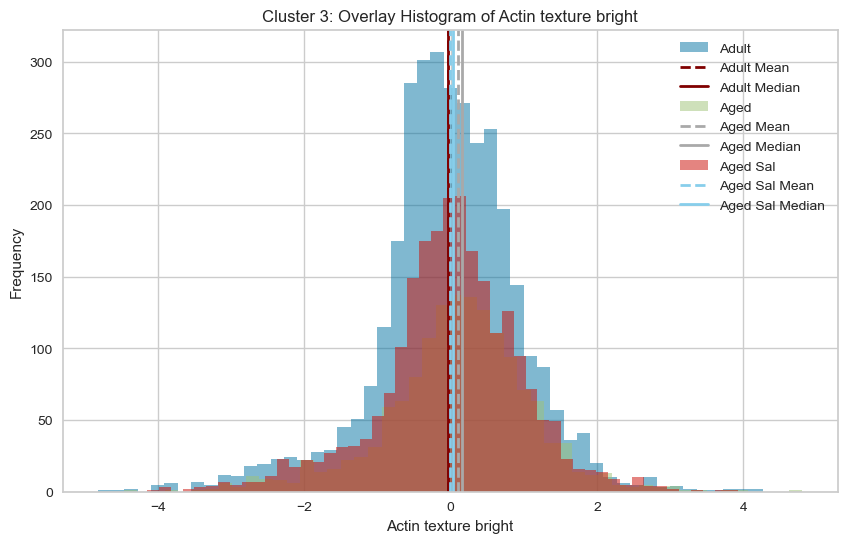

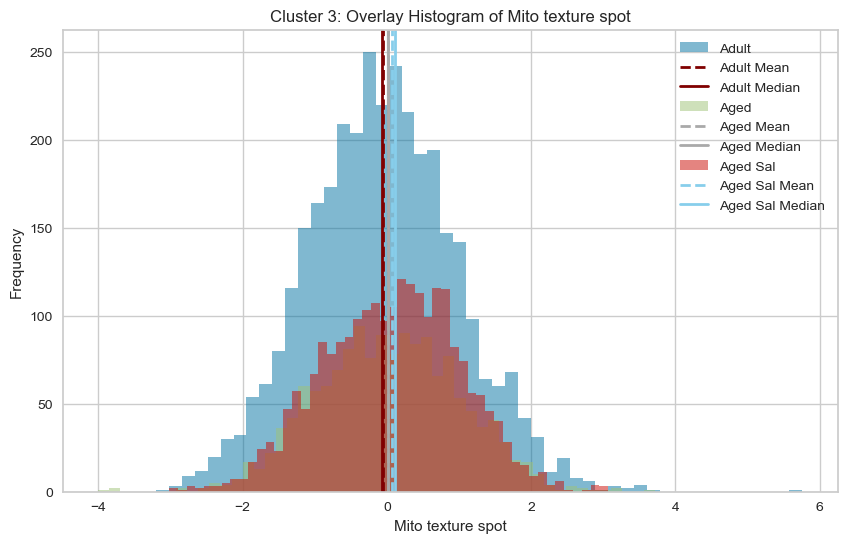

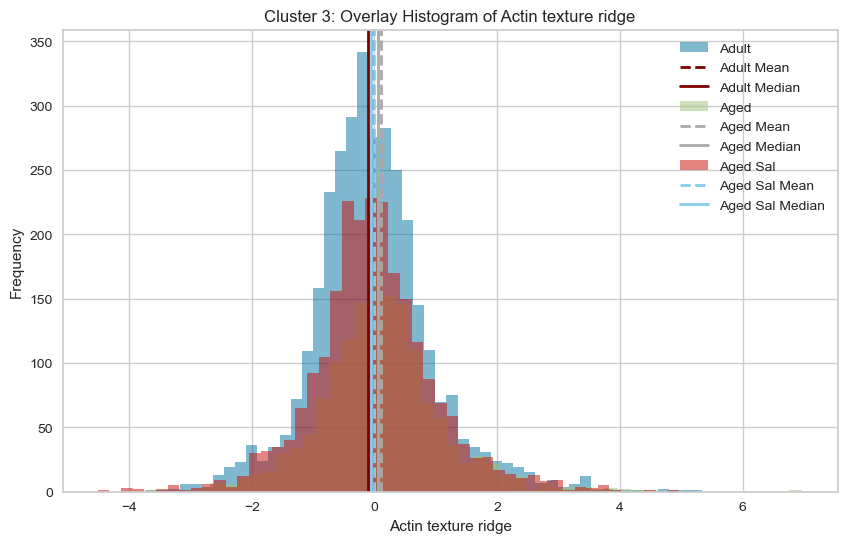

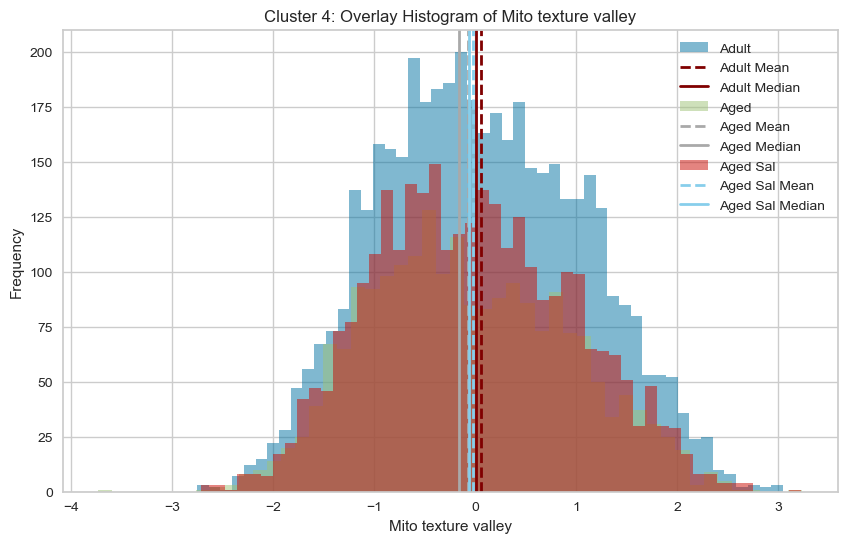

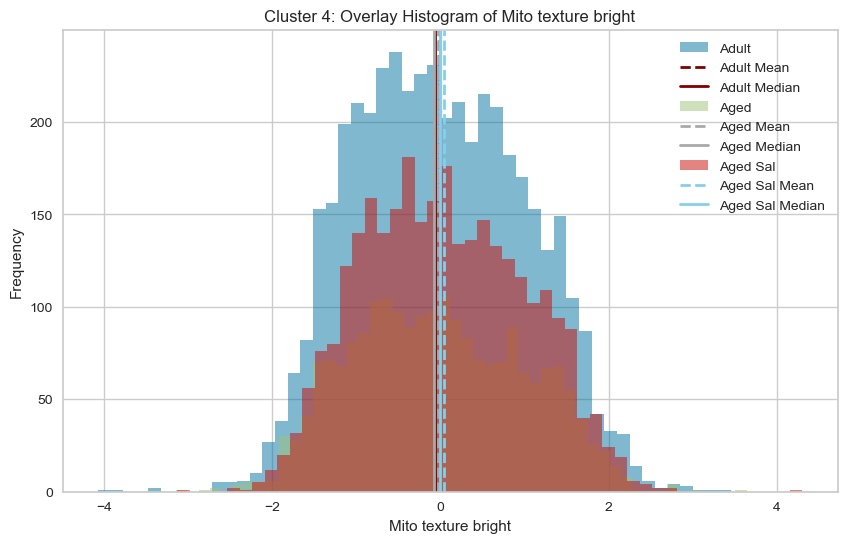

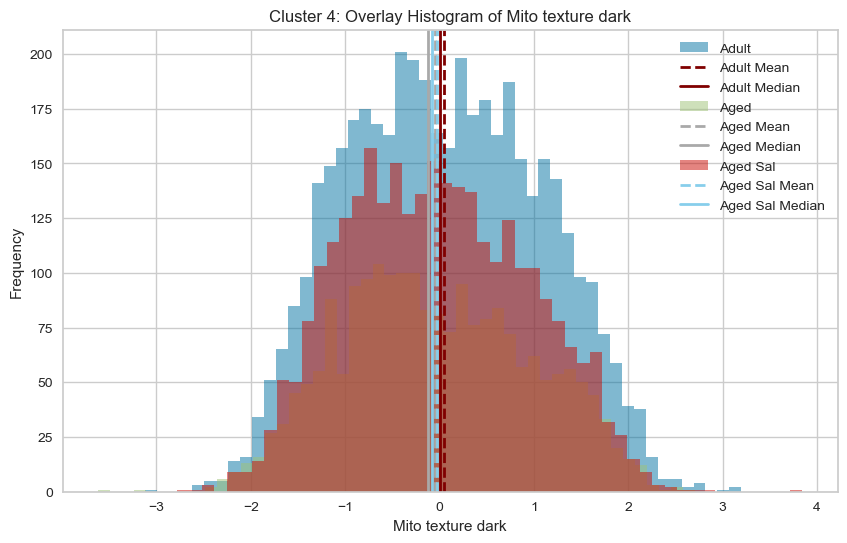

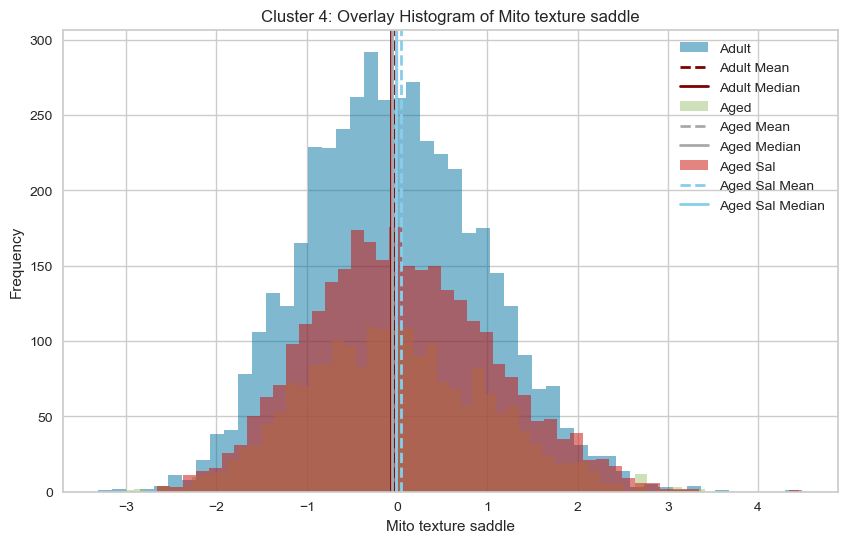

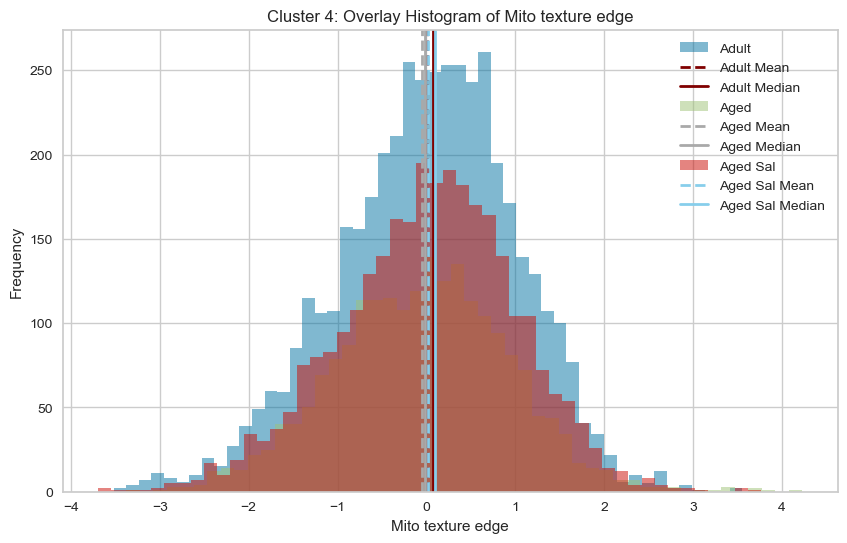

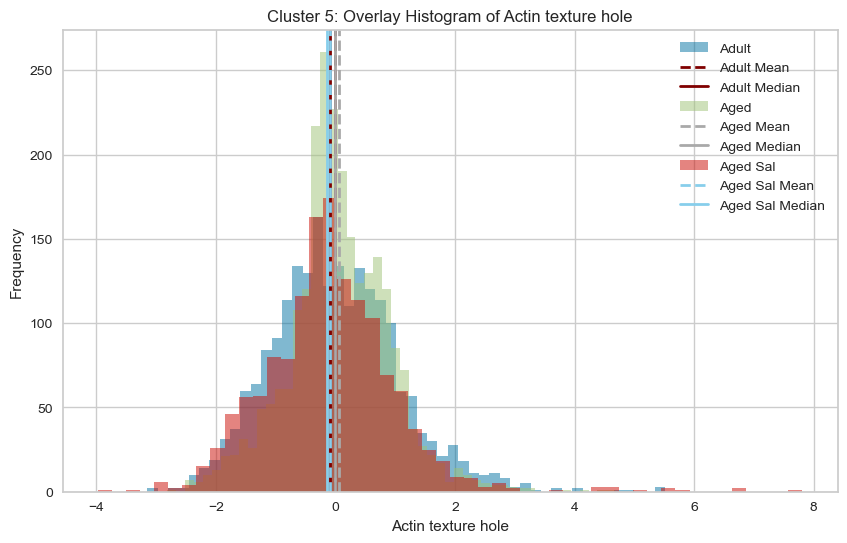

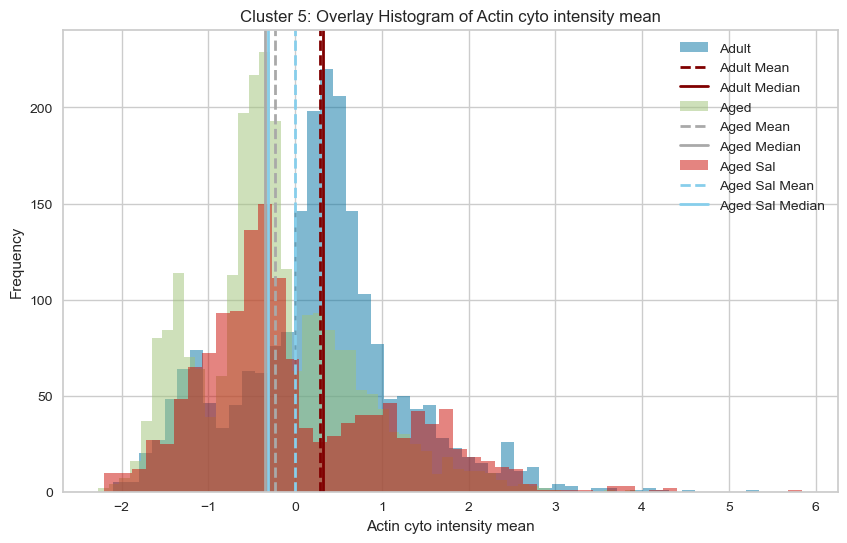

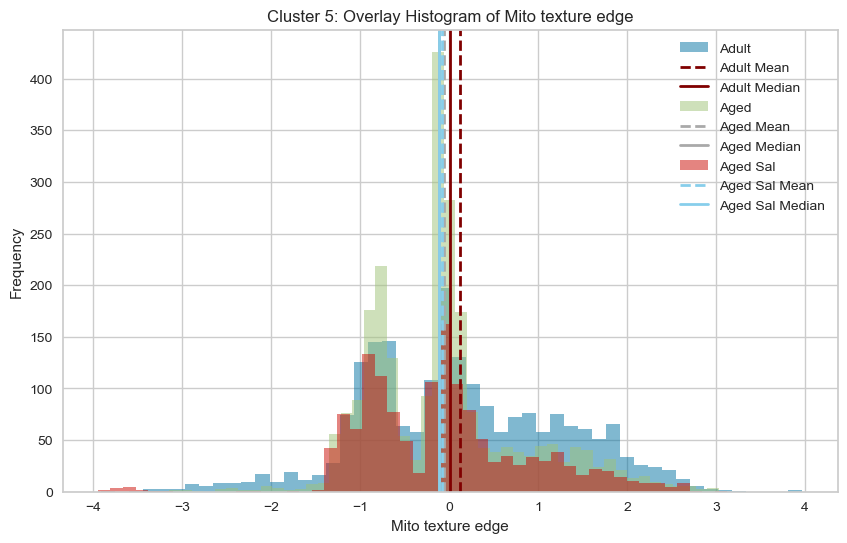

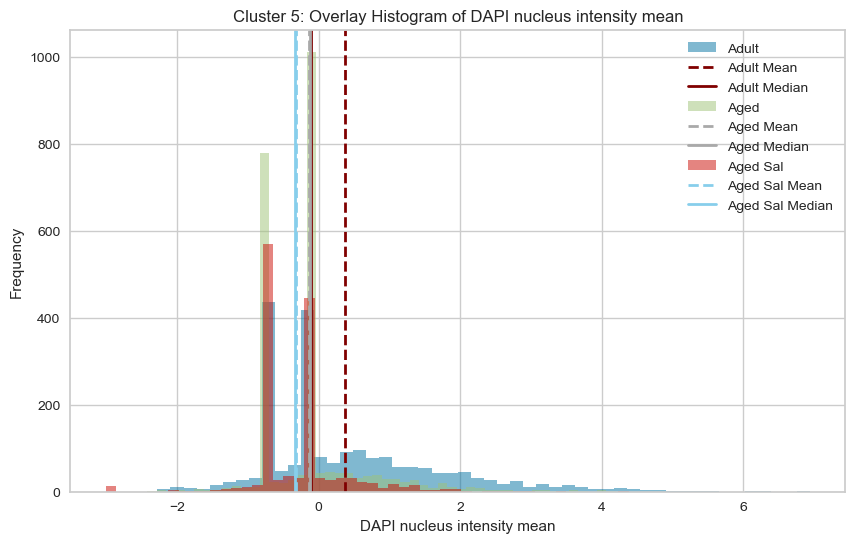

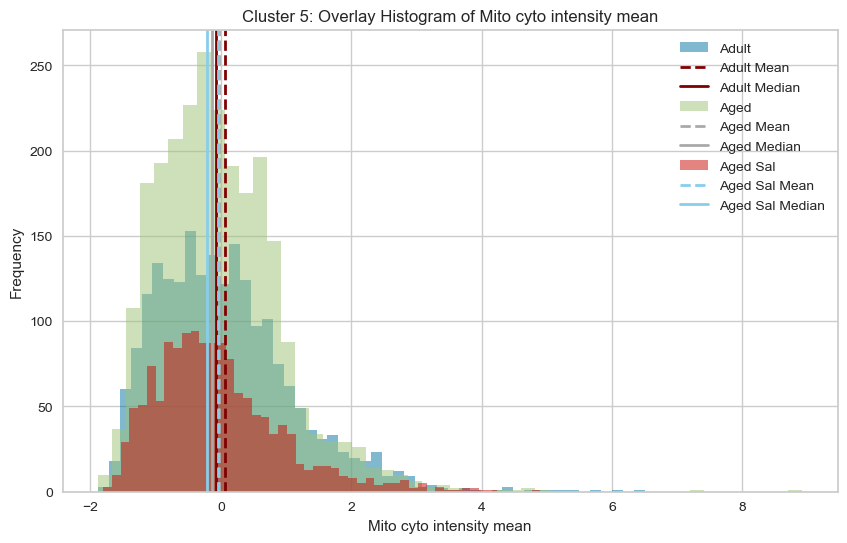

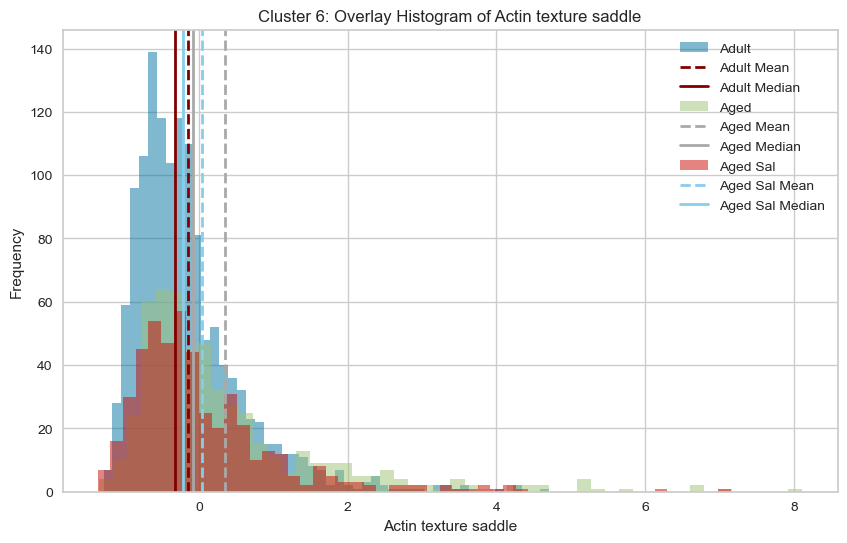

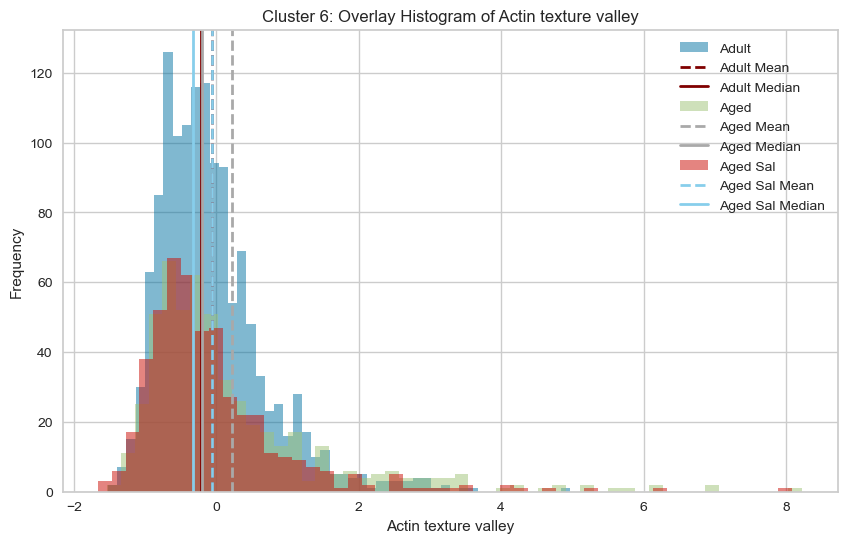

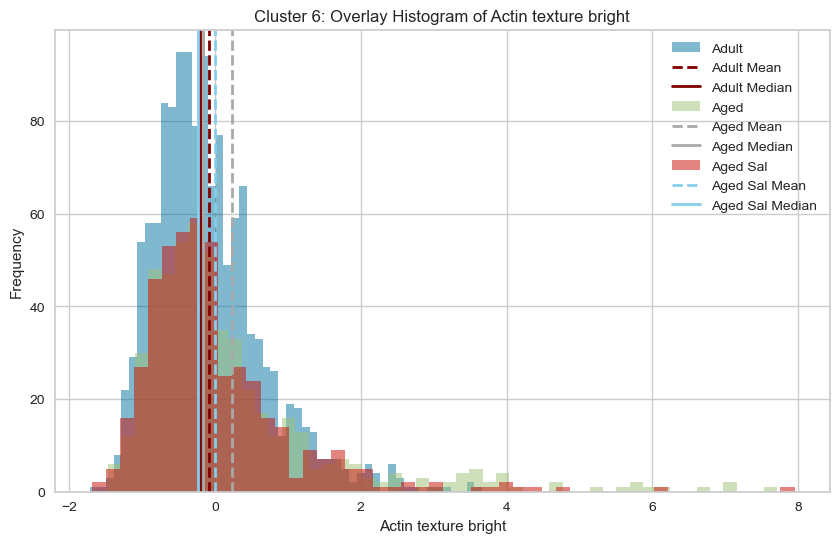

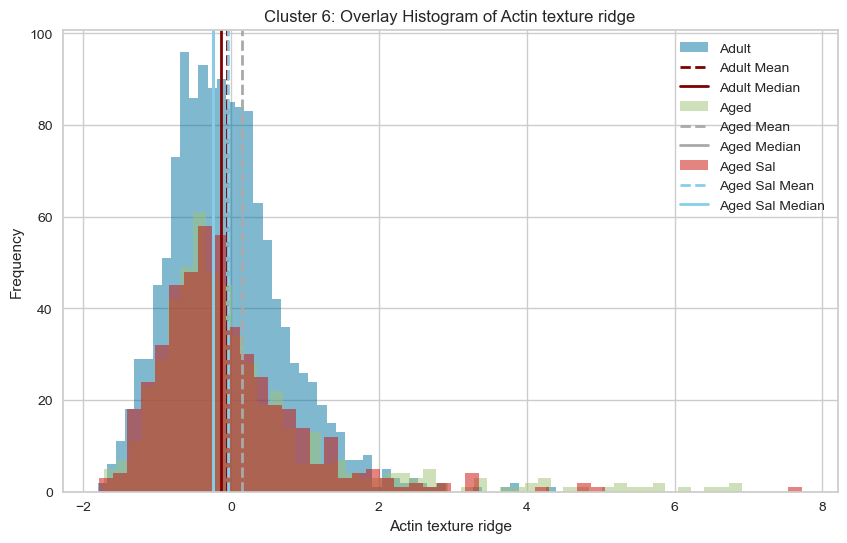

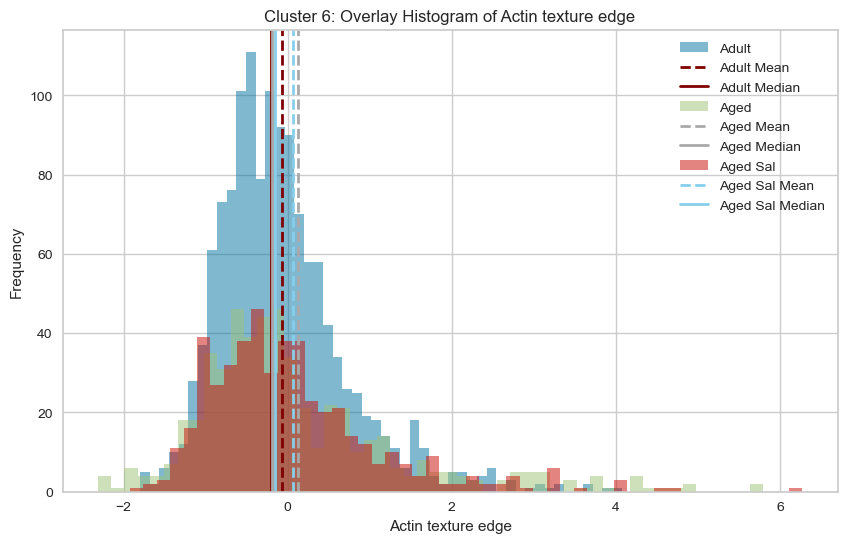

In [45]:
hist_plot_ad_ag_ags([clust1_data, clust2_data, clust3_data,
           clust4_data, clust5_data, clust6_data])

In [102]:
import matplotlib.pyplot as plt
import numpy as np

def hist_plot(clust_list):
    clust_num = 1  # Initialize clust_num outside the loop over clust_list
    
    for clust in clust_list:
        features = clust.columns[:-2]
        fig, axes = plt.subplots(1, len(features) * 2, figsize=(15 * len(features), 6), sharey=True)
        
        for i, feature in enumerate(features):
            # Prepare unique colors for each sample in "Adult" and "Aged"
            adult_samples = clust[clust['Age'] == 'Adult']['Sample'].unique()
            aged_samples = clust[clust['Age'] == 'Aged']['Sample'].unique()
            total_samples = len(adult_samples) + len(aged_samples)
            colors = plt.cm.tab20(np.linspace(0, 1, total_samples))  # Generate unique colors
            
            # Access the subplot axes for "Adult" and "Aged" for the current feature
            ax1 = axes[i * 2]       # Adult plot
            ax2 = axes[i * 2 + 1]   # Aged plot
            
            # Plot stacked histogram for "Adult" samples with unique colors
            adult_data = clust[clust['Age'] == 'Adult']
            for idx, sample in enumerate(adult_samples):
                sample_data = adult_data[adult_data['Sample'] == sample][feature].values
                ax1.hist(sample_data, bins=50, stacked=True, color=[colors[idx]], label=f'Adult {sample}', alpha=0.5)
            
            ax1.set_xlabel(feature)
            ax1.set_ylabel("Frequency")
            ax1.legend()
            ax1.set_title(f"Cluster {clust_num}: {feature} (Adult)")
            
            # Plot stacked histogram for "Aged" samples with unique colors
            aged_data = clust[clust['Age'] == 'Aged']
            for idx, sample in enumerate(aged_samples, start=len(adult_samples)):
                sample_data = aged_data[aged_data['Sample'] == sample][feature].values
                ax2.hist(sample_data, bins=50, stacked=True, color=[colors[idx]], label=f'Aged {sample}', alpha=0.5)
            
            ax2.set_xlabel(feature)
            ax2.legend()
            ax2.set_title(f"Cluster {clust_num}: {feature} (Aged)")
        
        # Adjust layout and show all plots for the current cluster in a single row
        plt.tight_layout()
        plt.show()
        
        # Increment clust_num after processing each cluster
        clust_num += 1




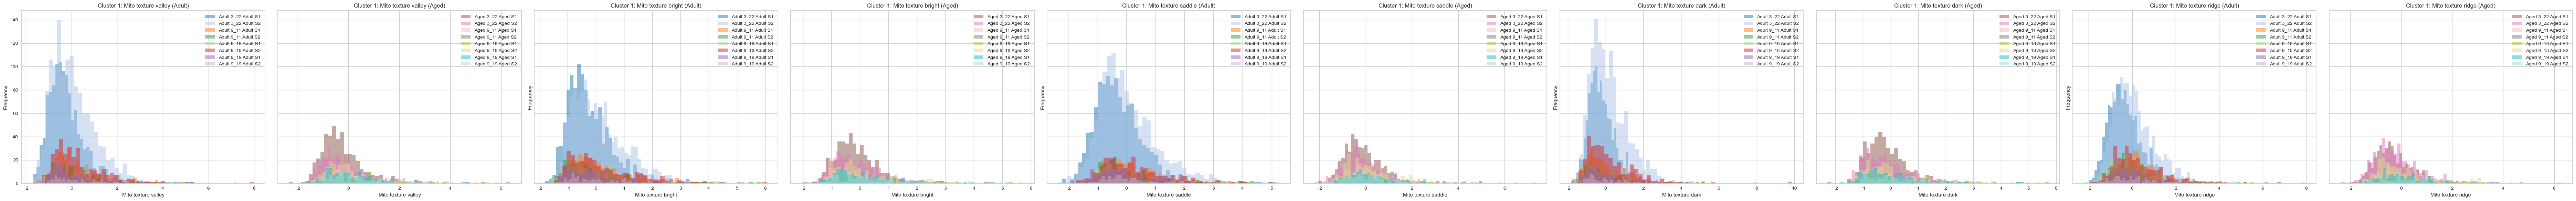

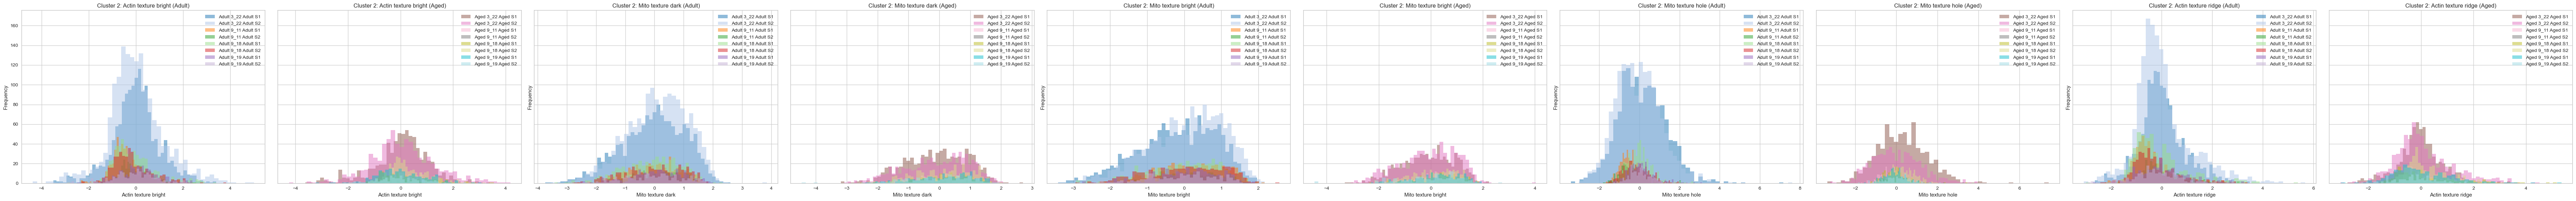

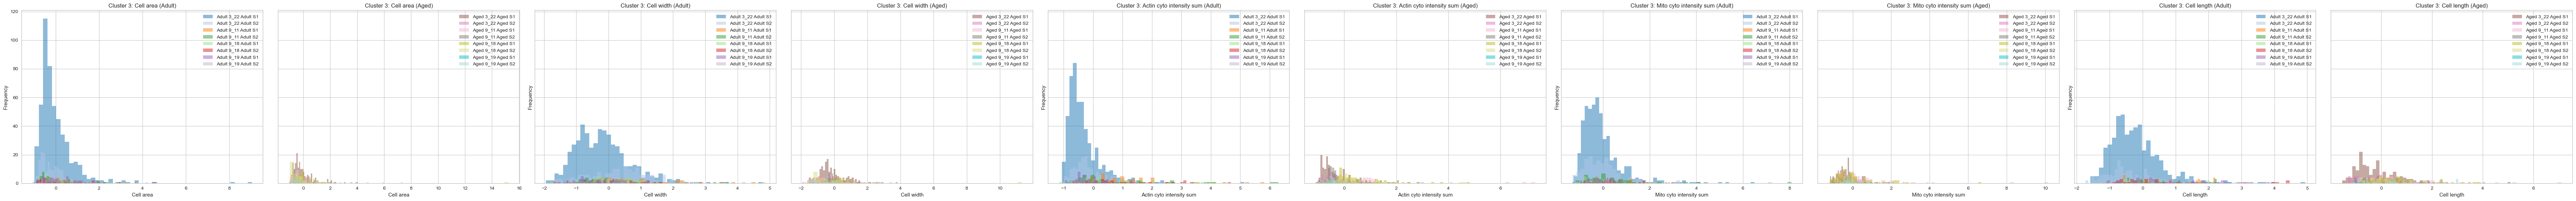

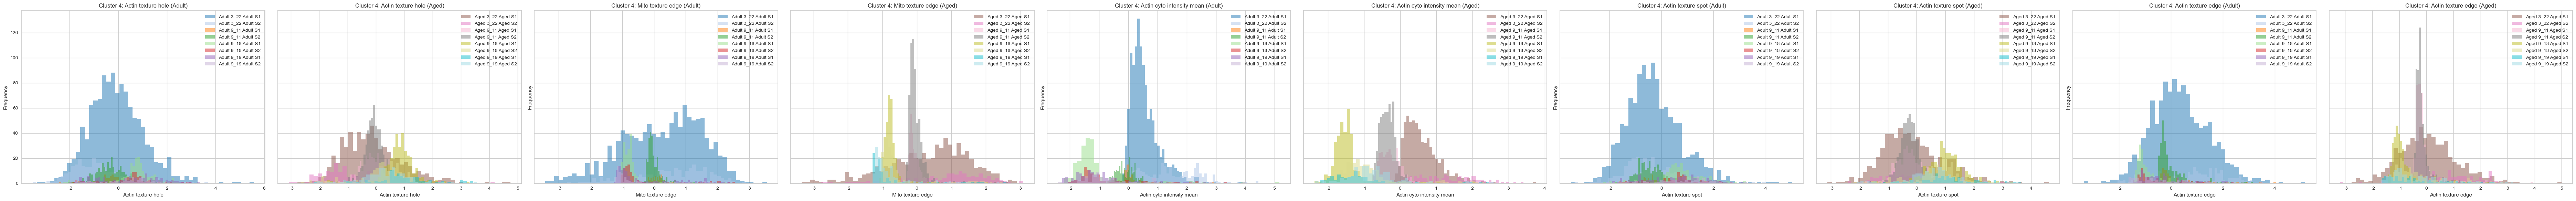

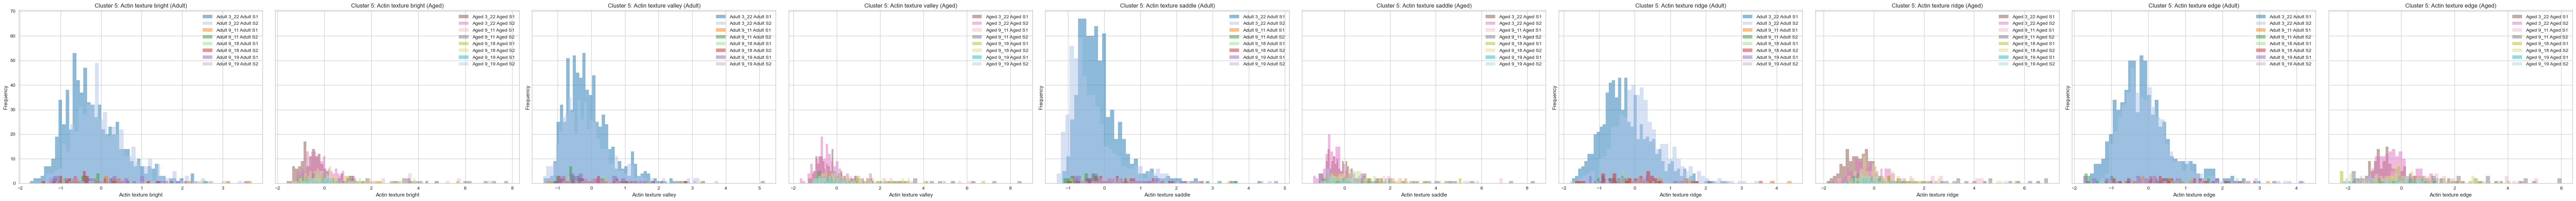

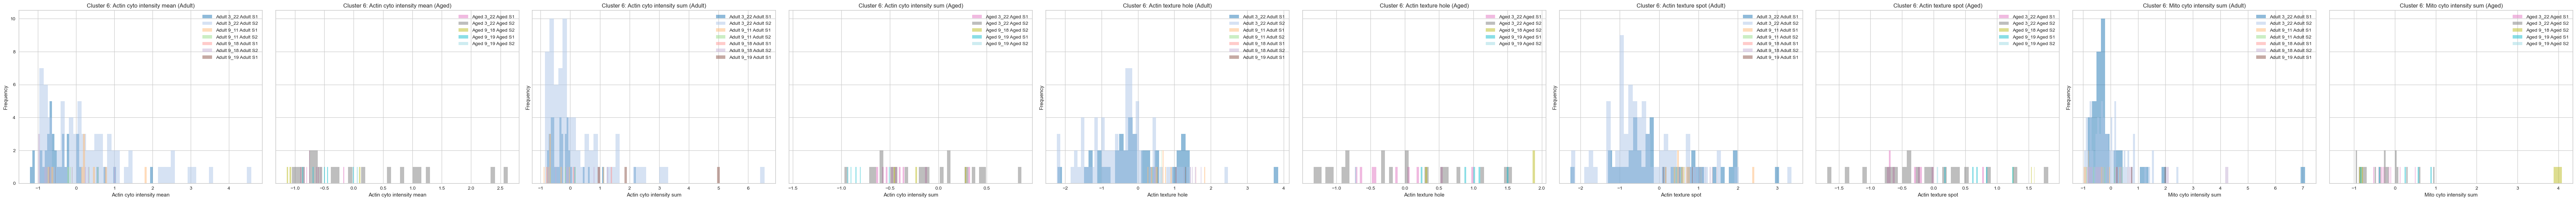

In [103]:
hist_plot([clust1_data, clust2_data, clust3_data,
           clust4_data, clust5_data, clust6_data])


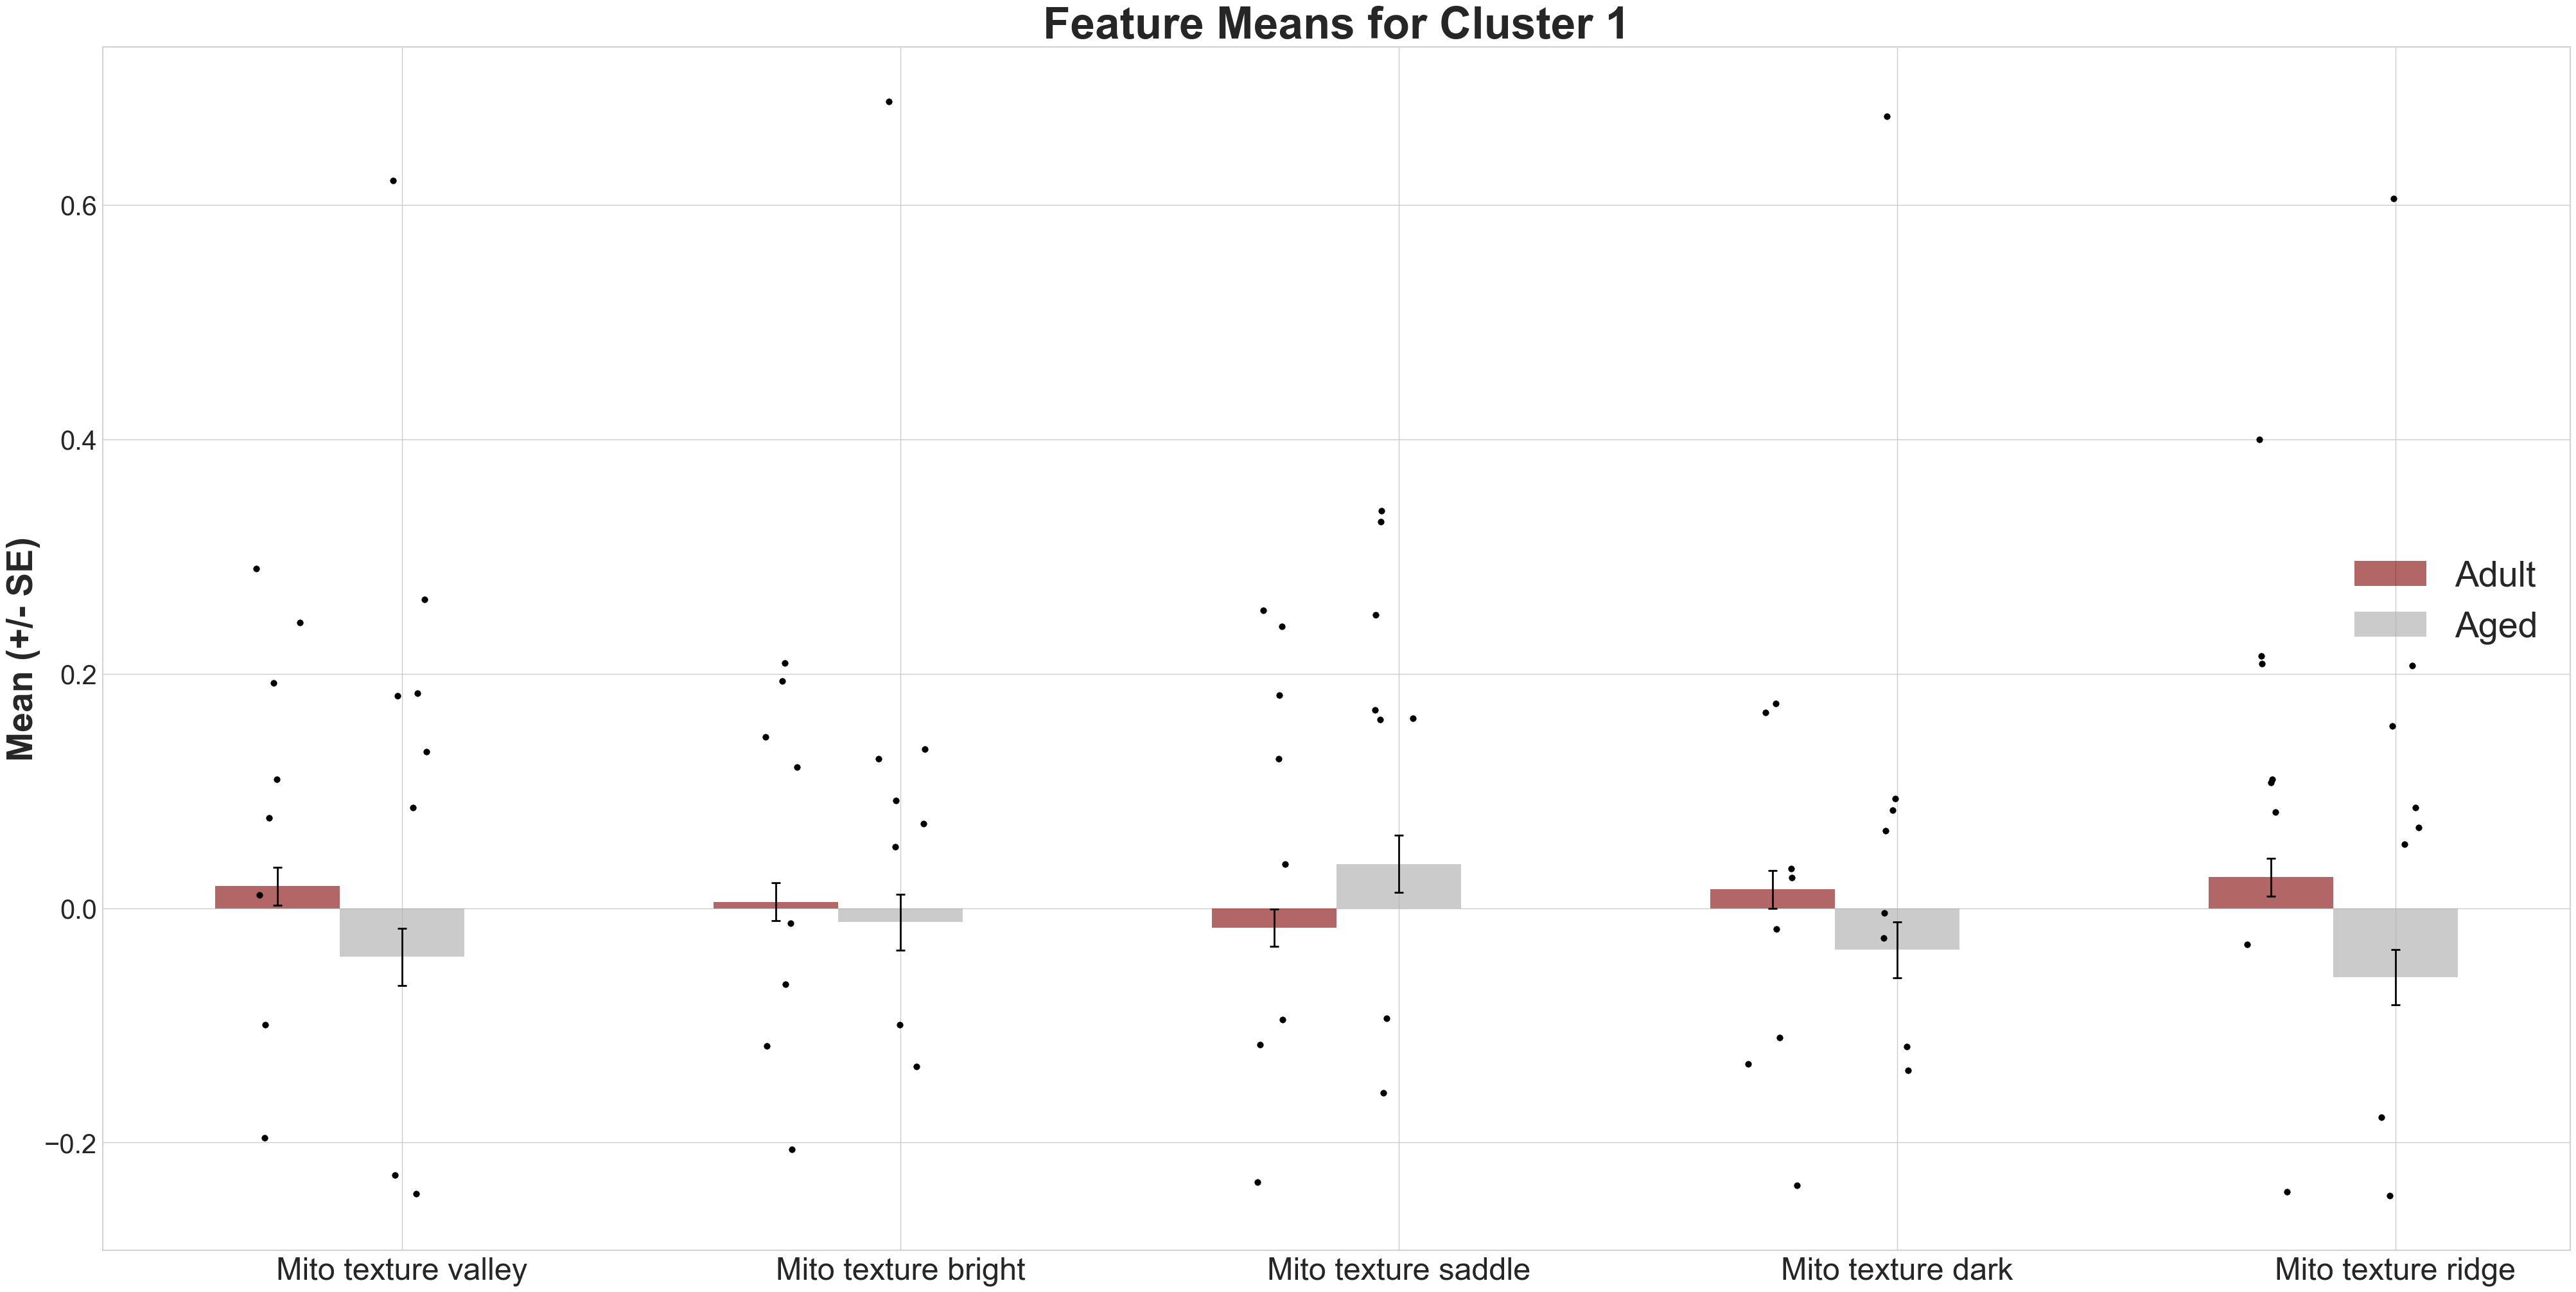

In [63]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

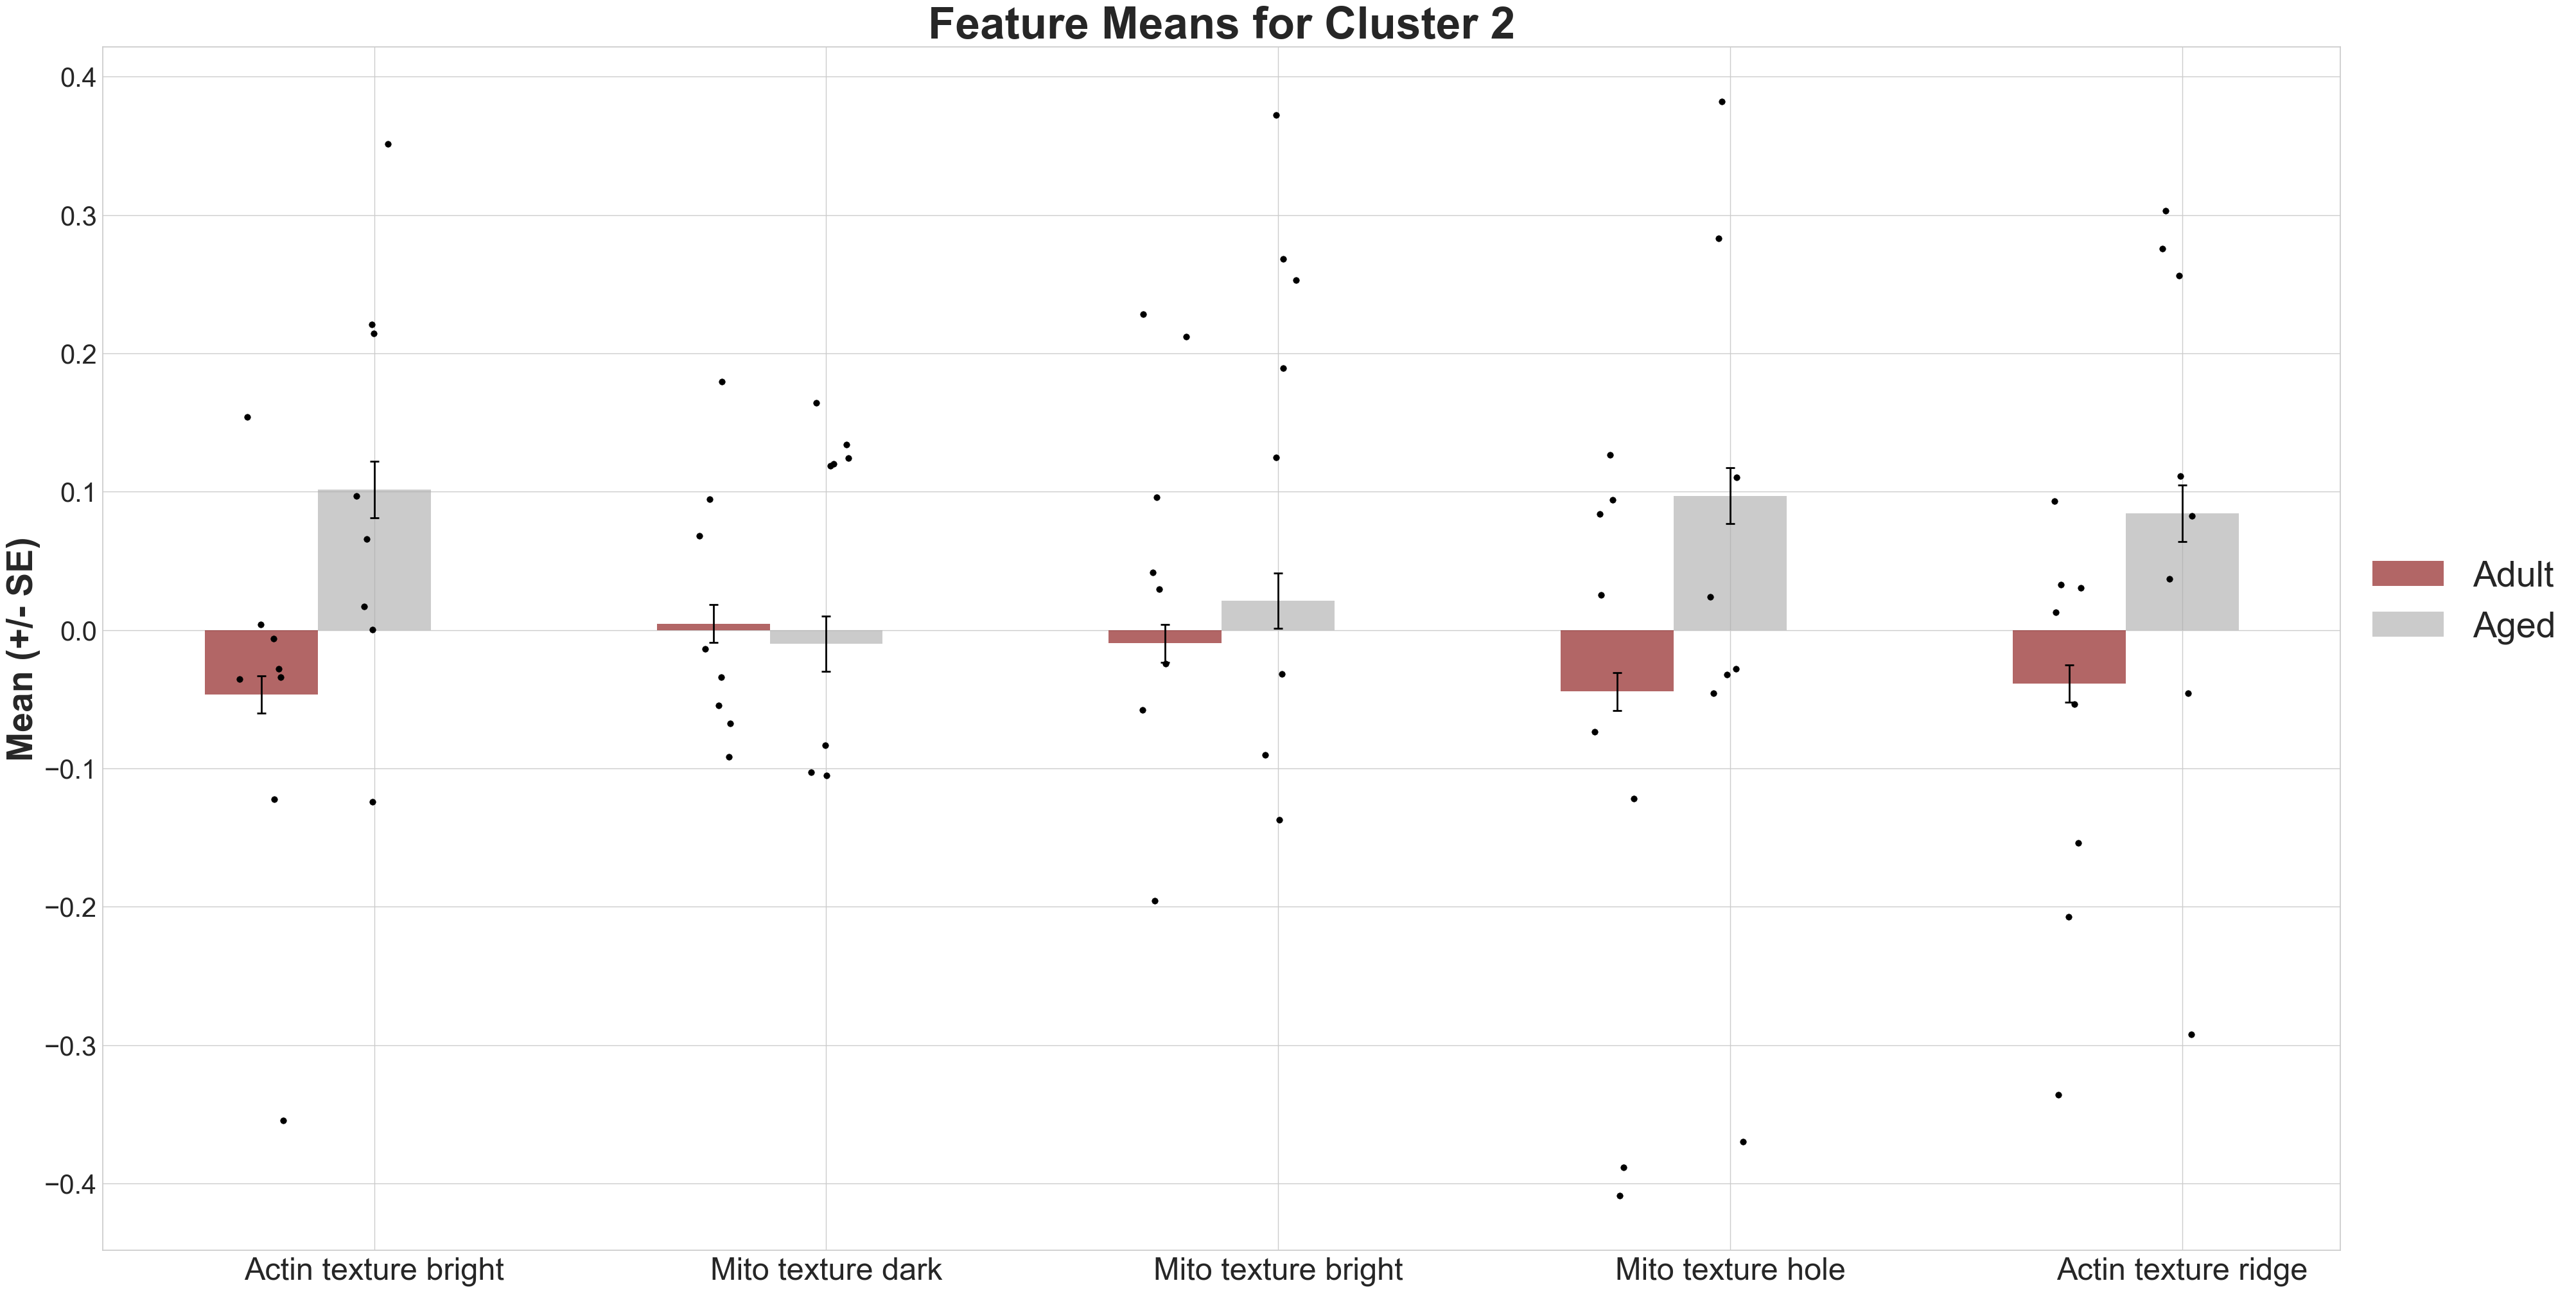

In [35]:
viz_cluster_feat(clust2_data,"Feature Means for Cluster 2","clust2.png")

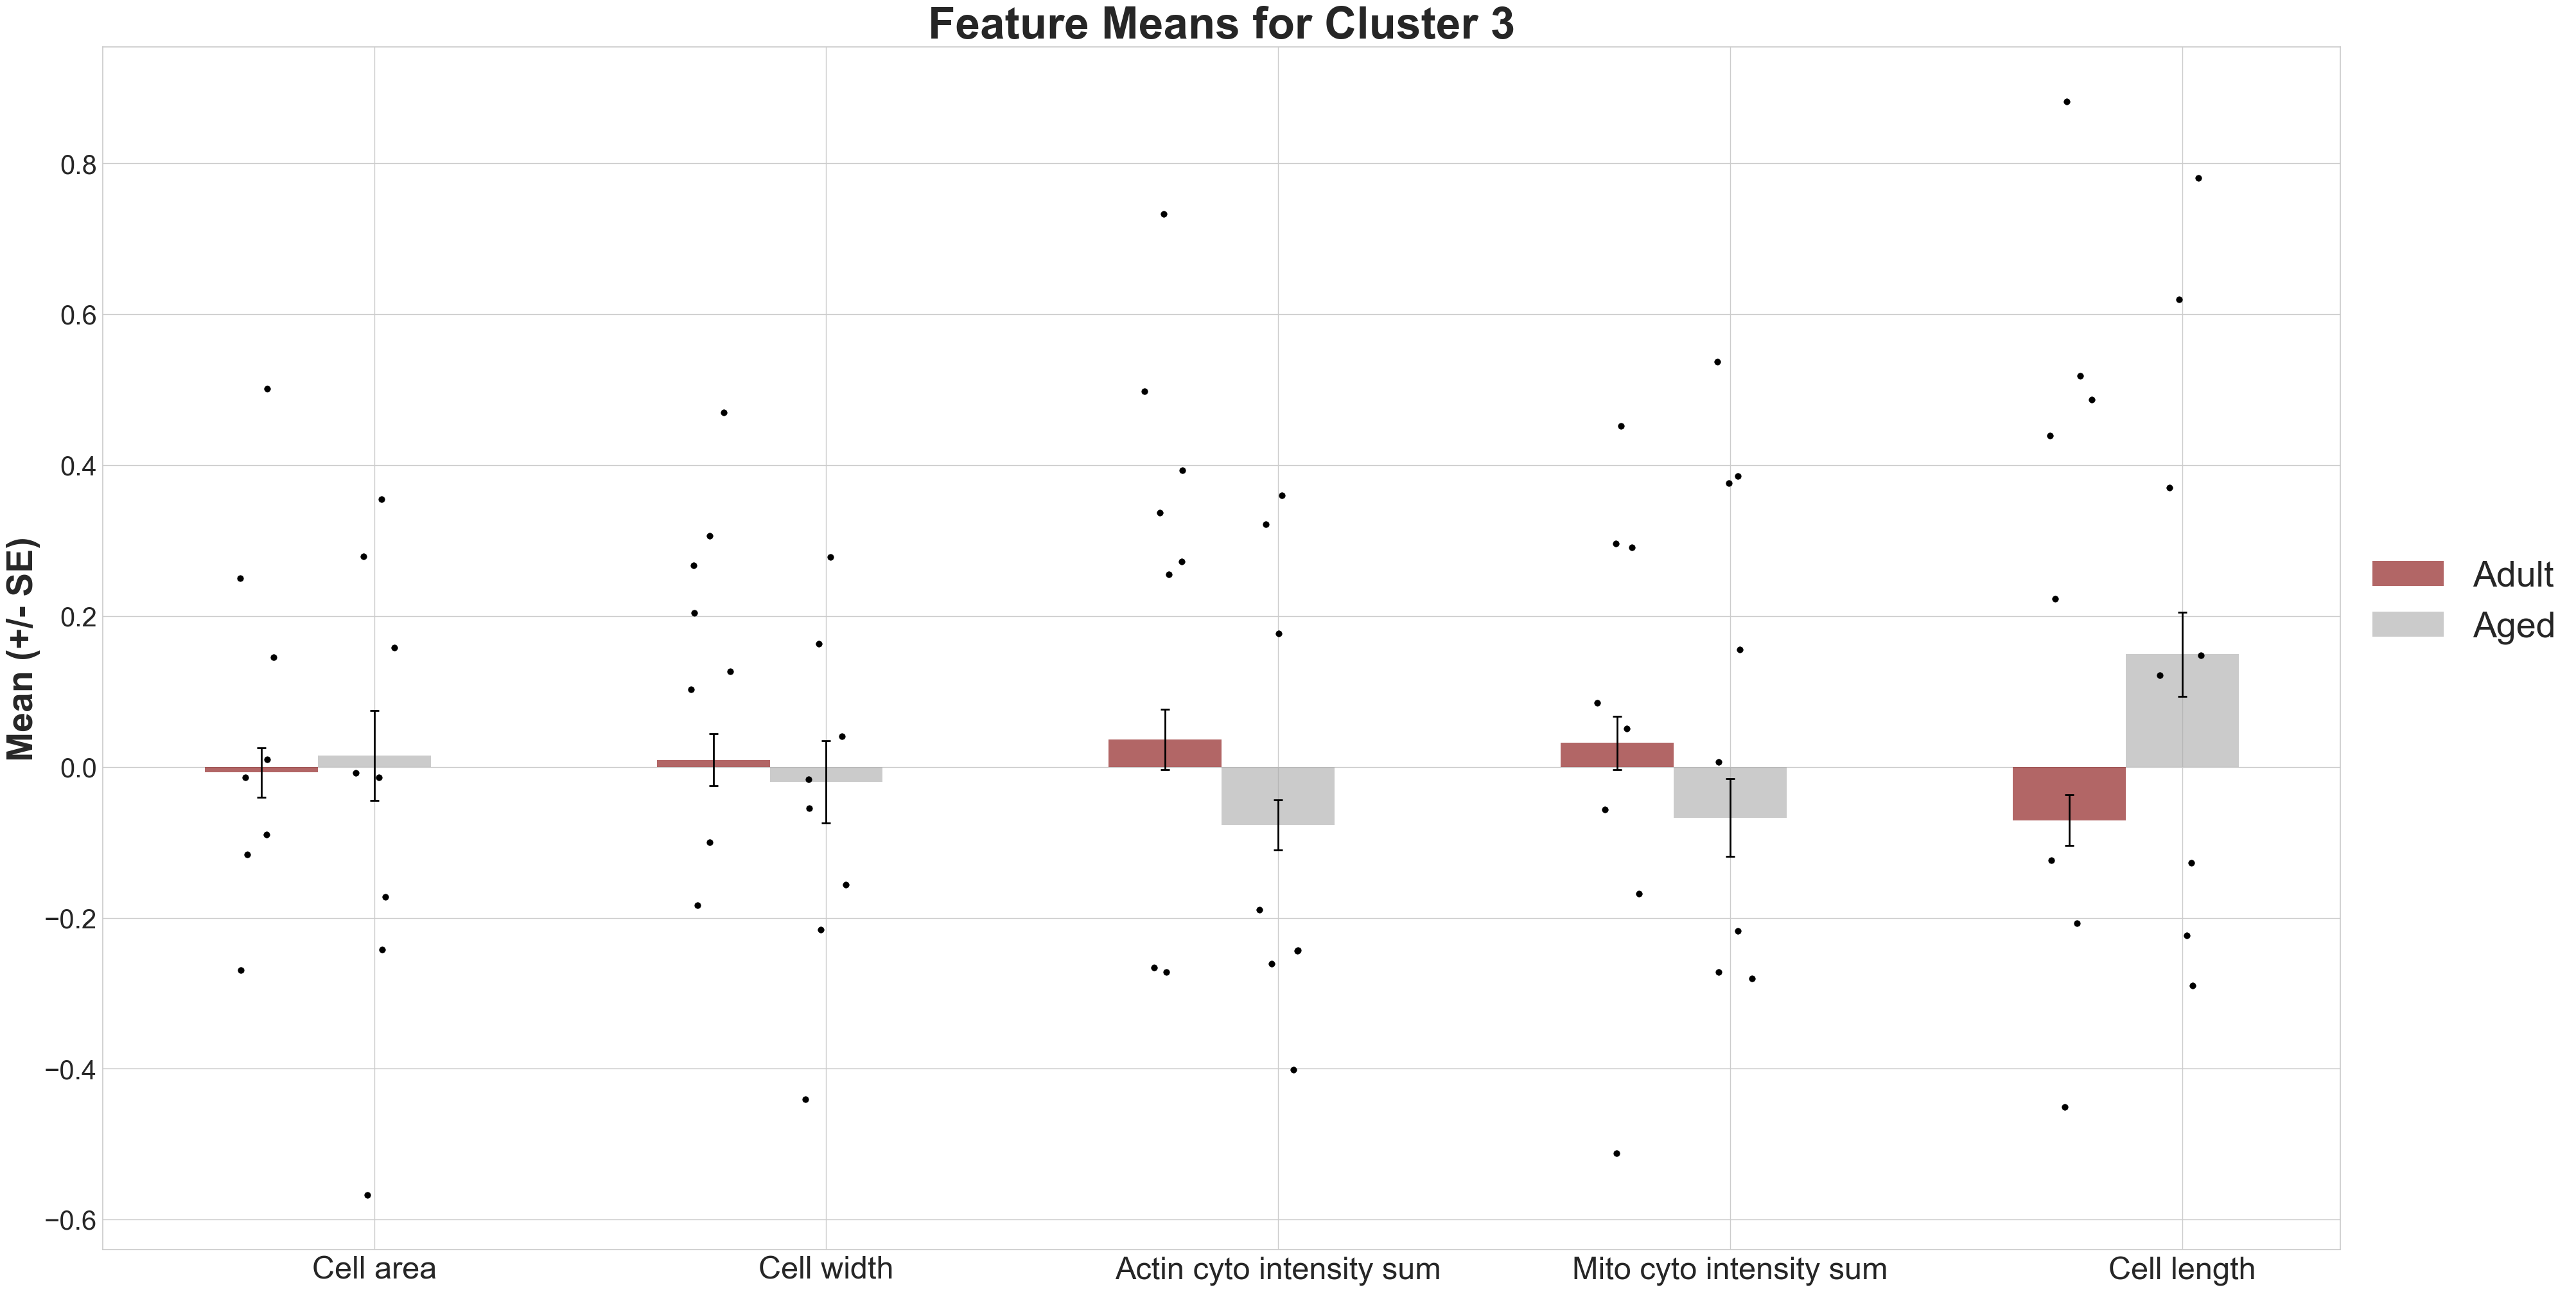

In [36]:
viz_cluster_feat(clust3_data,"Feature Means for Cluster 3","clust3.png")

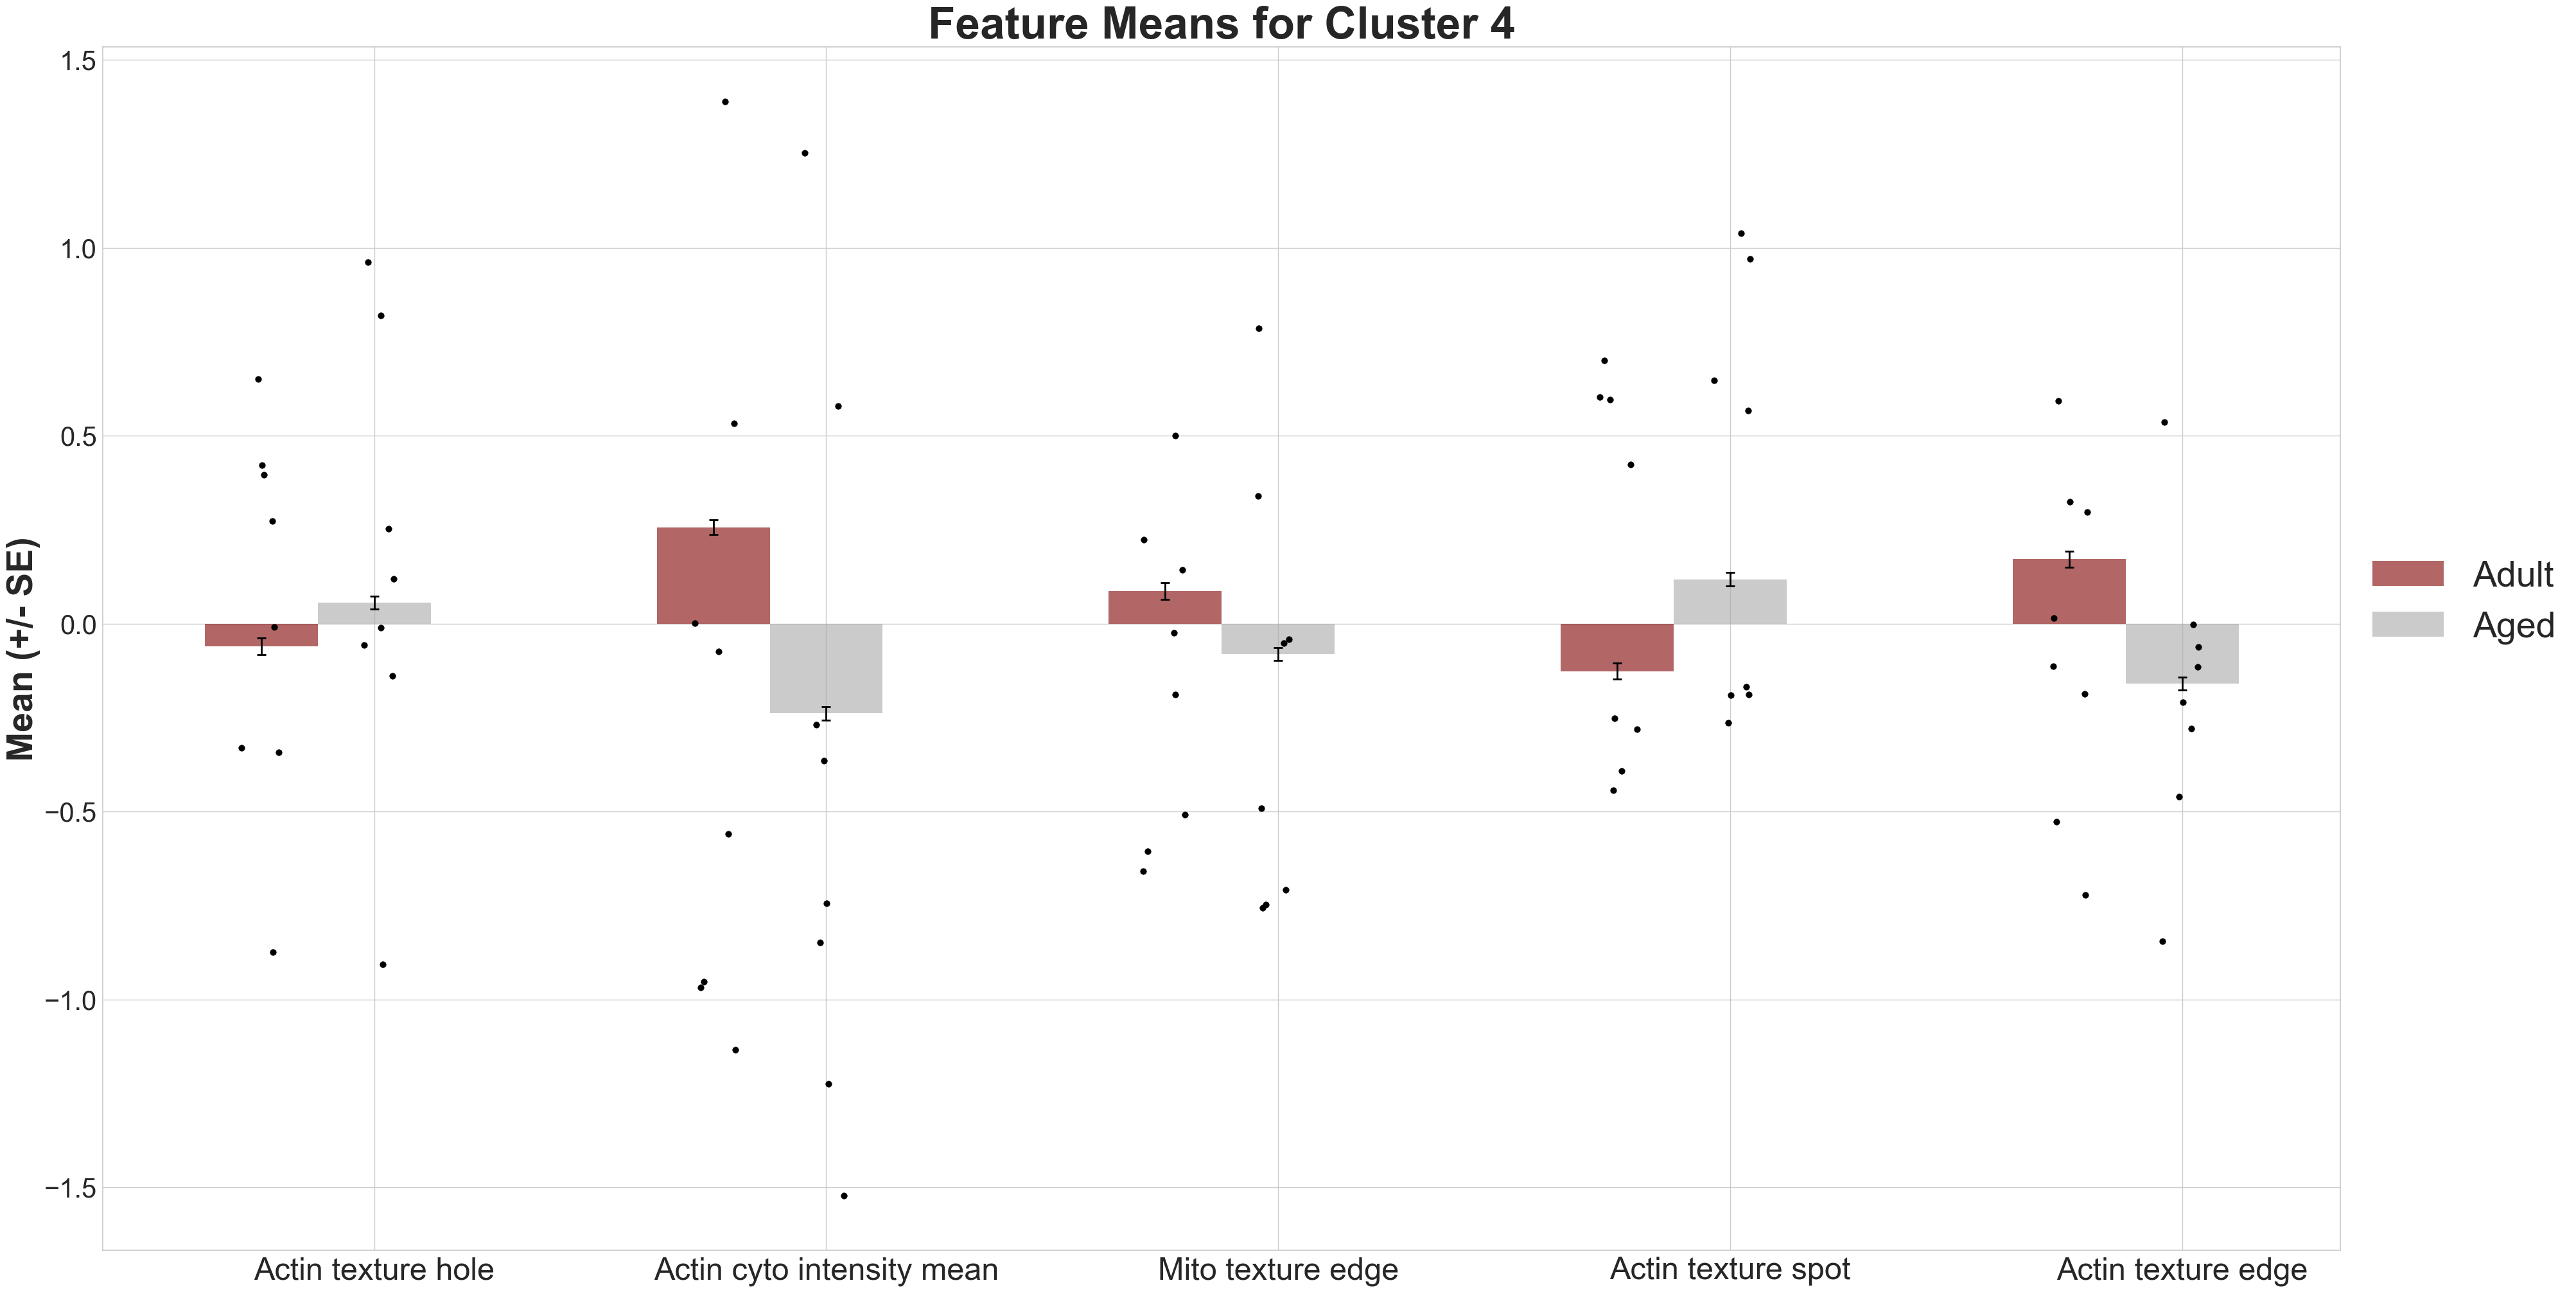

In [37]:
viz_cluster_feat(clust4_data,"Feature Means for Cluster 4","clust4.png")

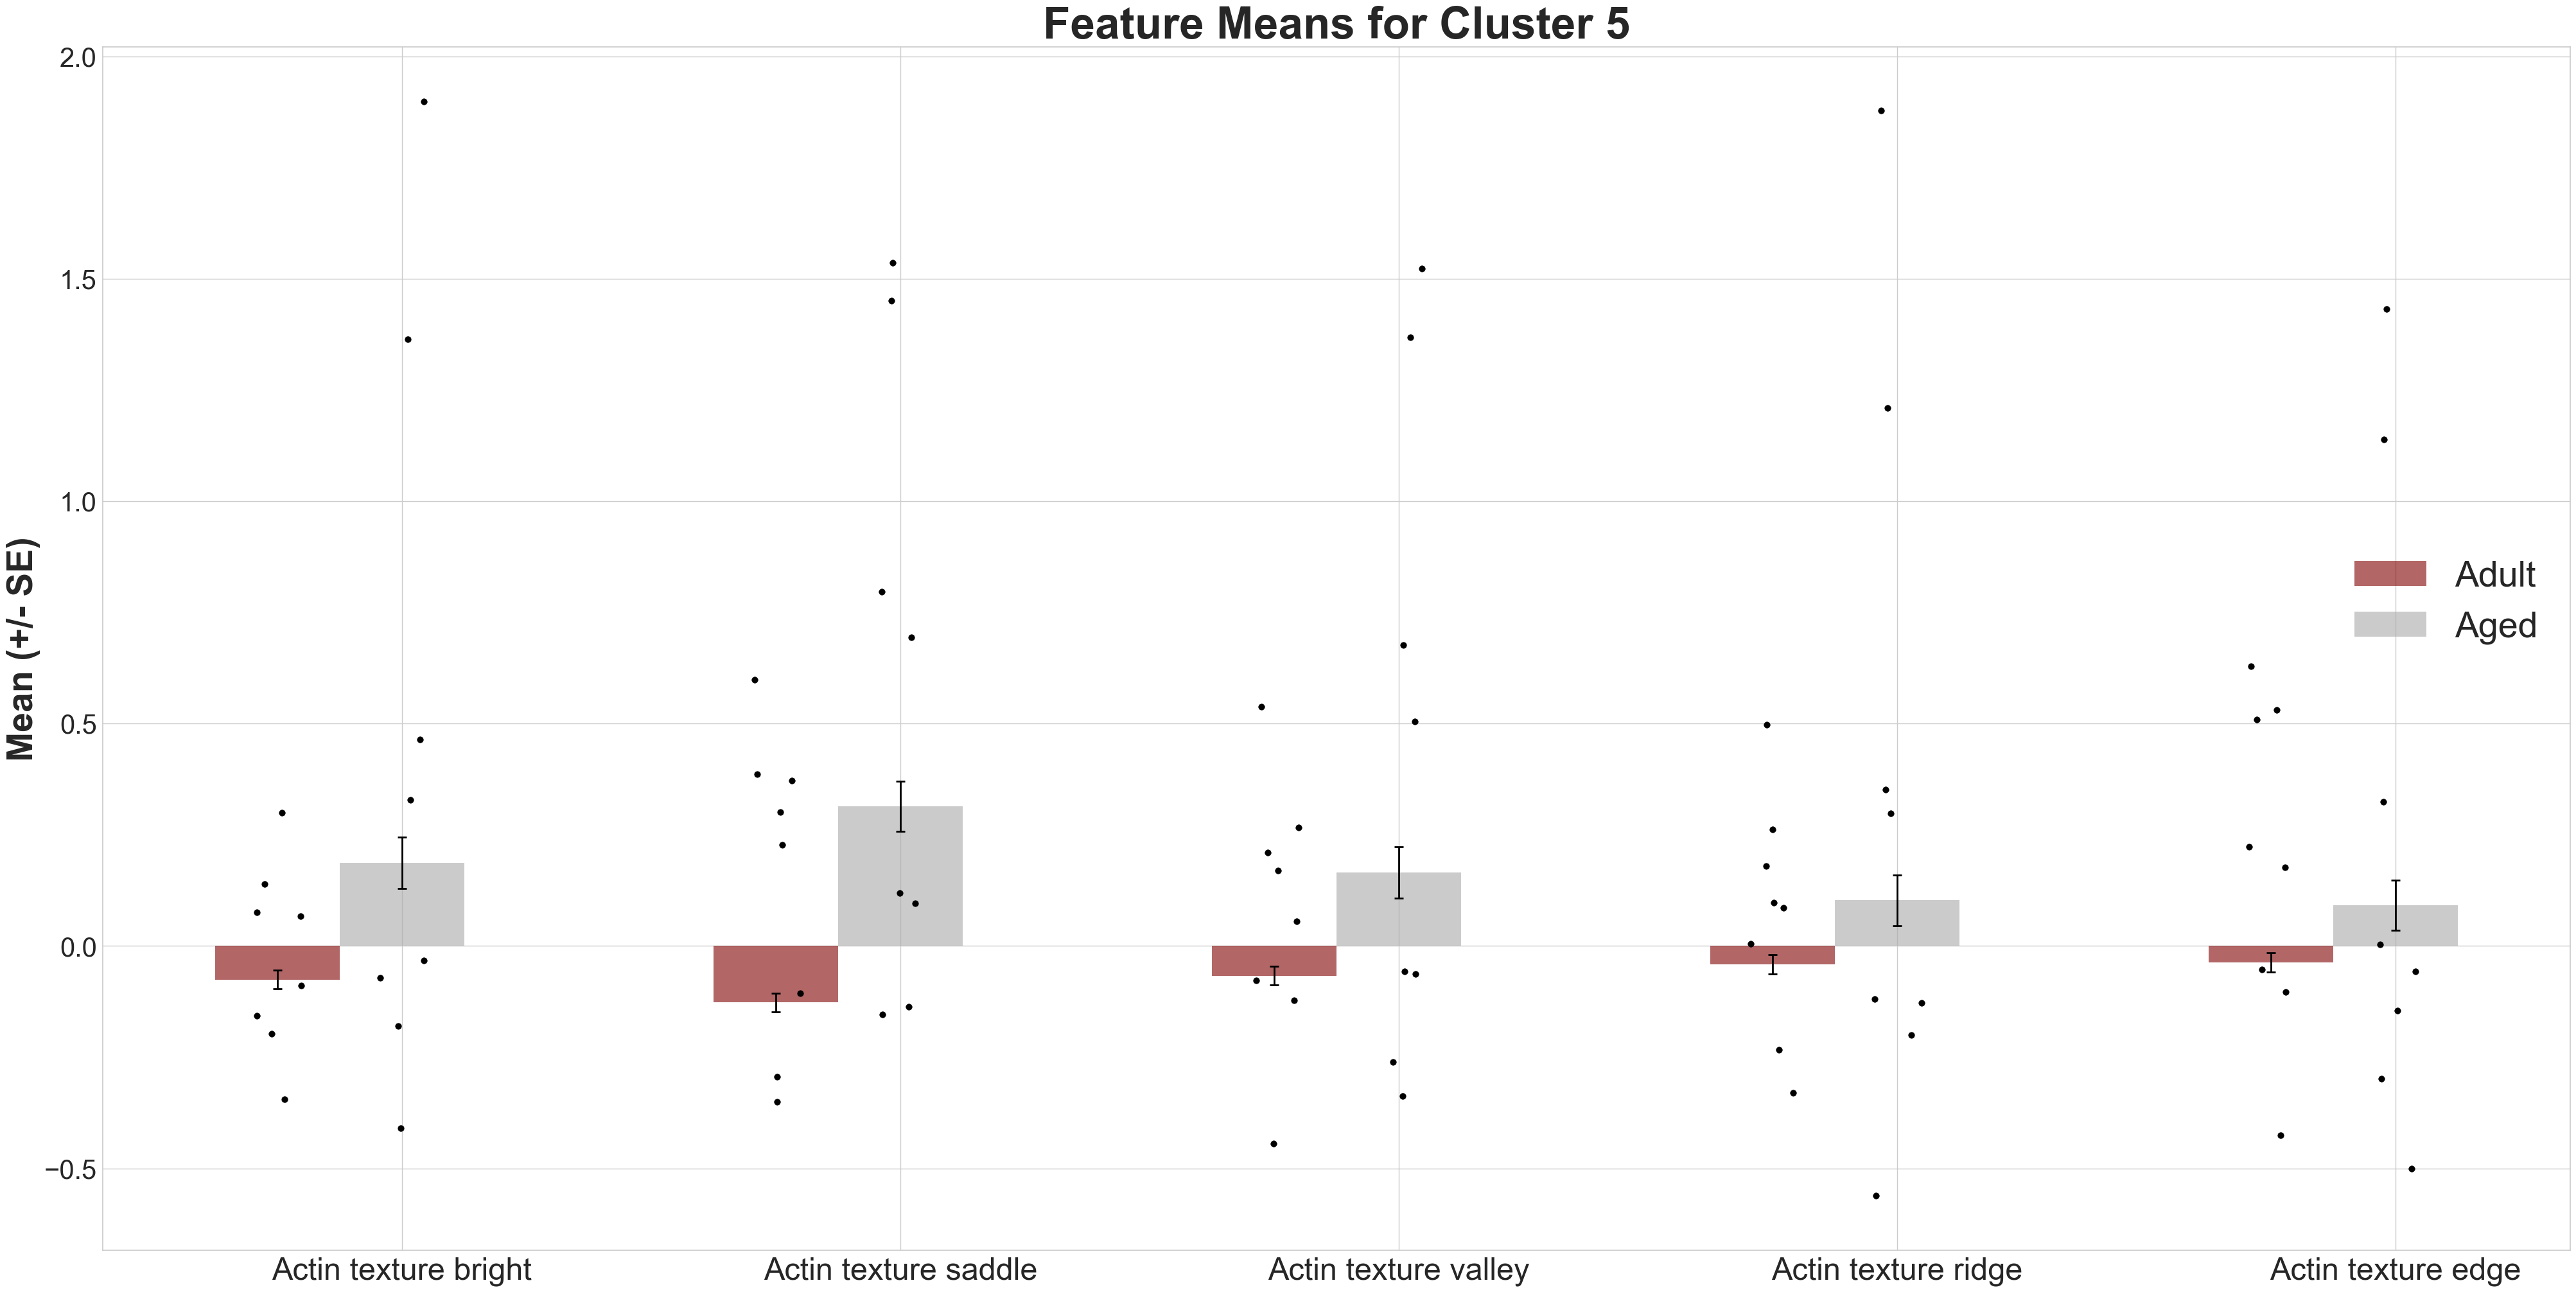

In [38]:
viz_cluster_feat(clust5_data,"Feature Means for Cluster 5","clust5.png")

**TO DO**

1. do feature select
2. do batch correction with combat for cell painting to standardize differences between plates 
3. add labels next to dots for analysis on cluster groups to see if the experiments align across plates
4. start working on cell profiler 

# IGNORE

In [39]:
# """
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px': 'Nucleoli texture spot',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px': 'Nucleoli texture hole',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px': 'Nucleoli texture edge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px': 'Nucleoli texture ridge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px': 'Nucleoli texture valley',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px': 'Nucleoli texture saddle',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px': 'Nucleoli texture bright',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px': 'Nucleoli texture dark',
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean': ,
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px': 'Actin texture dark',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'ER texture spot',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'ER texture hole',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'ER texture edge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'ER texture ridge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'ER texture valley',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'ER texture saddle',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'ER texture bright',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'ER texture dark'
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'RNA texture spot',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'RNA texture hole',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'RNA texture edge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'RNA texture ridge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'RNA texture valley',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'RNA texture saddle',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'RNA texture bright',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'RNA texture dark',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean': 'ER intensity sum',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum': 'ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA+ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA+ER intensity sum',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA intensity mean',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA intensity sum',
# """